In [1]:
import numpy as np
import glob
from scipy.optimize import curve_fit
import h5py
import ipywidgets
from natsort import natsorted
from scipy.signal import find_peaks, find_peaks_cwt
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import OrderedDict
from datetime import datetime

import latex
#mpl.rcParams.update(mpl.rcParamsDefault)
print(sys.path)

['/Users/tizi/Documents/YALE_WL.nosync/purity-monitor/Jupyter/Log', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python310.zip', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/lib-dynload', '', '/Users/tizi/Library/Python/3.10/lib/python/site-packages', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages']


In [2]:
!pwd

/Users/tizi/Documents/YALE_WL.nosync/purity-monitor/Jupyter/Log


In [3]:
import sys
sys.path.insert(0,'../../')
sys.path.insert(0,'/Library/TeX/texbin/')
sys.path.insert(0,'../../WaveformAnalysis')

In [4]:
plt.style.use('../../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [5]:
import Dataset as Dataset
import Waveform as Waveform
import SiPM as SiPM

In [6]:
import importlib
importlib.reload(Dataset)
importlib.reload(SiPM)
importlib.reload(Waveform)

<module 'Waveform' from '/Users/tizi/Documents/YALE_WL.nosync/purity-monitor/Jupyter/Log/../../WaveformAnalysis/Waveform.py'>

In [7]:
Path = r'/Users/tizi/Documents/YALE_WL.nosync/data/202206[0-1]*/'
#Path = r'/Users/tizi/Documents/YALE_WL.nosync/data/20220630/LXe_Full_20min_-109C_setpoint/'

Let's get the voltage steps from the filenames

In [8]:
voltages = glob.glob(Path+'wave*')
print(len(voltages))
voltages = [x.split('_')[-2] for x in voltages]
voltages = np.array(sorted([x.split('OV')[0] for x in voltages]))
voltages = np.unique(voltages)
print(len(voltages))

2576
11


Now we can loop over all files for the various voltages, save the data and run a simple analysis including baseline subtraction and maximum finding

In [9]:
print(sys.path)
def line_gain(x,m,c):
    return (m*x)+c

def gauss(x,a,mu,sigma):
    return (a*np.exp(-0.5*((x-mu)/sigma)**2))

['../../WaveformAnalysis', '/Library/TeX/texbin/', '../../', '/Users/tizi/Documents/YALE_WL.nosync/purity-monitor/Jupyter/Log', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python310.zip', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/lib-dynload', '', '/Users/tizi/Library/Python/3.10/lib/python/site-packages', '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages']


In [10]:
def rebin(hx,h,bins):
    h_rebin=[]
    for i in range(int(len(h)/bins)):
        start_idx=i*bins
        end_idx=(i+1)*bins
        h_rebin.append(np.sum(h[start_idx:end_idx]))
    hx_rebin=range(len(h_rebin))
    return np.array(hx_rebin), np.array(h_rebin)

def rebin_2(hx,h,start, stop, step):
    rebinned = {}
    bins = np.arange(start,stop+step, step)
    for i, interval in enumerate(bins[:-1]):
        if not f'{bins[i]}-{bins[i+1]}' in rebinned.keys(): rebinned[f'{bins[i]}-{bins[i+1]}'] = 0
    print(rebinned)
    for val in hx:
        index = int(val/step)
        rebinned[rebinned.keys()]
    return
    h_rebin=[]
    for i in range(int(len(h)/bins)):
        start_idx=i*bins
        end_idx=(i+1)*bins
        h_rebin.append(np.sum(h[start_idx:end_idx]))
    hx_rebin=range(len(h_rebin))
    return np.array(hx_rebin), np.array(h_rebin)
#rebin_2(0,0,0,100,10)
plt.figure()
plt.show()

<Figure size 432x288 with 0 Axes>

In [11]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

Ds = {}
N_peaks= 4
v_data = {}
print(voltages)
for volt in voltages[3:]: 
    Ds[volt] = SiPM.SiPM(Path=Path, Selection='wavefms_keith_{}OV*.h5'.format(volt))
    #Ds[volt] = SiPM.SiPM(Path=Path, Selection='OV*.h5'.format(volt))
    Ds[volt].Ch = [Waveform.Waveform(ID=x, Pol=1) for x in range(1,3)]
    
    peak_amps = {} #dict of shaping time as key and peak values for waveforms filtered with that shaping time
    peak_occs = {} #same thing but counting the occurrences so it will be a dict of dicts for each shaping time and peak
    all_v = []

    total = 0
    files = 0


    #The code below just loads the data from the files into the SiPM instance Ds[volt]
    for File in natsorted(Ds[volt].Files):
        # print(f'{total} waveforms in total (unfiltered) from {files} files')
        max_amp_all_st=[]
        files += 1
        Ds[volt].ImportDataFromHDF5(File, Ds[volt].Ch, var=[])
        Ds[volt].get_sampling()
        Ds[volt].shaping_time=[2e-6,5e-6,10e-6] #List of shaping times to shape the signal with
        # Ds[volt].shaping_time=[2e-6] #List of shaping times to shape the signal with
        Ds[volt].setup_butter_filter() # calculate the butterworth filter coefficients

    for waveform in Ds[volt].Ch[0].Amp: #loop over the waveforms inside the file
    # print(waveform)
        total += 1

        y = Ds[volt].get_filtered_waveform(waveform) # return the filtered waveform
        # y = [waveform]
        # plt.plot(Ds[volt].Ch[0].Time,waveform,color='k',label='data')


        # max_amp,max_T=Ds[volt].Ch[0].GetAllMaxima(y)
        # max_amp_all_st.append(max_amp)
        # plt.plot(max_T,max_amp,'r*')  
        
        for i,y1 in enumerate(y): #Iterates each wave filtered with a different shaping time
            p_ind = np.argmax(y1) #Finds the index for max value in the waveform amplitude array
            p_val = y1[p_ind] #Gets the max value from the array of amps
     

            if not Ds[volt].shaping_time[i] in peak_amps.keys(): peak_amps[Ds[volt].shaping_time[i]] = [] #
            if not Ds[volt].shaping_time[i] in peak_occs.keys(): peak_occs[Ds[volt].shaping_time[i]] = {}

            peak_amps[Ds[volt].shaping_time[i]].append(p_val)

            if not p_val in peak_occs[Ds[volt].shaping_time[i]].keys(): peak_occs[Ds[volt].shaping_time[i]][p_val] = 1
            else: peak_occs[Ds[volt].shaping_time[i]][p_val] += 1
            all_v.append(p_val)

            # plt.plot(Ds[volt].Ch[0].Time[np.argmax(y1)],y1[np.argmax(y1)],marker='+',color=colors[i])
            # plt.plot(Ds[volt].Ch[0].Time,y1,color=colors[i])
            # plt.xlim(180,300)
            # plt.xlabel('Time')
            # plt.ylabel('Amplitude')
        #plt.show()
        # plt.xlim(180,225)

    # pp.pprint(peak_amps)

    v_data[volt] = peak_amps

['2.00' '2.50' '3.00' '3.50' '4.00' '4.50' '5.00' '5.50' '6.00' '6.50'
 '7.00']


In [12]:

peaks = {}
import itertools
mpl.rcParams['figure.dpi']= 200

ANSI_RESET = '\u001b[0m'
ANSI_GREEN = '\u001b[32m'
ANSI_CYAN = '\u001b[36m'
ANSI_RED = '\u001b[31m'
ANSI_YELLOW = '\u001b[33m'

def gain(spikes,sh_time,plot=True,prominence=16,distance=12,bin_w=2,lim=10,skip=False):
 
    BIN_W = bin_w
    SUBS = False
    if not plot: SUBS = False
    PROMINENCE = prominence
    DISTANCE = distance
    MIN = 5
    
    # plt.title(f"Shaping time: {sh_time} | OV: {volt}V")
    # plt.hist(peak_amps[sh_time],bins=np.arange(0,1000,BIN_W+1),histtype='step', color='royalblue')
    # plt.hist(peak_amps[sh_time],bins=np.arange(0,1000,BIN_W+2),histtype='step', color='firebrick')
    # plt.hist(peak_amps[sh_time],bins=np.arange(0,1000,BIN_W+3),histtype='step', color='deepskyblue')
    x, y = np.histogram(spikes,bins=np.arange(0,1000,BIN_W))
    # plt.ylim(0,12)
    # plt.xlim(0,800)
    #print(len(x))
    #print(len(y))

    p_indexes = find_peaks(x, prominence=PROMINENCE,distance=DISTANCE)[0]

    limiter = lim
    
    """ while (len(p_indexes) < MIN) and (BIN_W<limiter):
        BIN_W=BIN_W+1
        x, y = np.histogram(spikes,bins=np.arange(0,1000,BIN_W))
        p_indexes = find_peaks(x, prominence=PROMINENCE,distance=DISTANCE)[0] """


    if SUBS: plt.figure(figsize=(12,80)).suptitle(f"Shaping time: {sh_time} | OV: {volt}V | B: {BIN_W} | D: {distance} | P: {prominence}", fontsize=16)
    elif plot: plt.figure(figsize=(12,5)).suptitle(f"Shaping time: {sh_time} | OV: {volt}V | B: {BIN_W} | D: {distance} | P: {prominence}", fontsize=16)
    #plt.subplot(1,2,1)
    if SUBS: plt.subplot(15,1,1)
    elif plot and not skip: plt.subplot(1,2,1)
    if plot: plt.hist(spikes,bins=np.arange(0,1000,BIN_W),histtype='step', color='black')

    x = np.asarray(x).reshape(-1)
    y = np.asarray(y).reshape(-1)
    y = y[:-1]

    if len(p_indexes) < MIN:
        if plot: plt.close()
        if plot: plt.figure(figsize=(6,8)).suptitle(f"NOT SEL. - Shaping time: {sh_time} | OV: {volt}V | B: {BIN_W} | D: {distance} | P: {prominence}", fontsize=16)
        if plot: plt.hist(spikes,bins=np.arange(0,1000,BIN_W),histtype='step', color='black')
        if plot: plt.show()
        return {'pks': None, 'err': None, 'gain': None}

    TEST_PEAK = 0
    first_pe_max=y[p_indexes[TEST_PEAK]] # The x-value of the 2nd peak.Index=1 means the second peak will be used for getting fit parameters
    #print(f'{ANSI_CYAN}[{volt}V|{sh_time}]:{ANSI_RESET} First-pe-max: {first_pe_max}')
    max_value=x[p_indexes[TEST_PEAK]] # The height of the 2nd peak
    #print(f'{ANSI_CYAN}[{volt}V|{sh_time}]:{ANSI_RESET} max: {max_value}')
    x_idx_array=(x<0.5*max_value) & (y>first_pe_max)# returns a boolean array where both conditions are true
    #print(f'{ANSI_CYAN}[{volt}V|{sh_time}]:{ANSI_RESET} x-idx: {x_idx_array}')
    right_side_x= y[np.where(x_idx_array)[0][0]] #finding the first time where x_idx_array is True
    #print(f'{ANSI_CYAN}[{volt}V|{sh_time}]:{ANSI_RESET} right: {right_side_x}')
    sigma_guess=np.abs(first_pe_max-right_side_x) #We need this to fit the width of the Gaussian peaks
    #print(f'{ANSI_CYAN}[{volt}V|{sh_time}]:{ANSI_RESET} sigma guess: {sigma_guess}')

    cut= (y < first_pe_max+sigma_guess) & (y > first_pe_max-sigma_guess) # This cut helps to fix the width of the peak-fit
    popt, pcov = None,None
    try: popt,pcov=curve_fit(gauss,y[cut],x[cut],p0=[max_value,first_pe_max,sigma_guess])
    except:
        #print(f'{ANSI_CYAN}[{volt}V|{sh_time}]:{ANSI_RED} Gaussian fit FAILED for test peak with values:\n    X: {first_pe_max}\n    Y: {max_value}\n    right side X: {right_side_x}\n    Sigma guess: {sigma_guess}{ANSI_RESET}')
        if plot: plt.title(f'V - 1st fit FAILED - V')
        if plot: plt.vlines(first_pe_max,0,max_value, linestyles='dotted', color='lime',alpha=0.5)
    else:
        if plot: plt.plot(y[cut],gauss(y[cut],*popt),color='red',label='Fit',lw=2,alpha=0.5)
    #plt.xlim(50,200)
    #plt.scatter(popt[1],popt[0],color='royalblue',marker='+')
    #print(cut)
    #print(popt)

    p_temp = []
    err_p_temp = []
    for i,peak in enumerate(p_indexes): #here we ignore the first peak because it could be the pedestal
        new_first_pe_max=y[peak] #x-value of the peak
        new_max_value=x[peak] #height of the peak
        new_x_idx_array=(x<0.5*new_max_value) & (y>new_first_pe_max) # returns a boolean array where both conditions are true
        new_right_side_x=None
        try: new_right_side_x= y[np.where(new_x_idx_array)[0][0]] #finding the first time where x_idx_array is True
        except: return {'pks': None, 'err': None, 'gain': None}
        new_sigma_guess=np.abs(new_first_pe_max-new_right_side_x) #We need this to fit the width of the Gaussian peaks


        new_cut= (y < new_first_pe_max+new_sigma_guess) & (y > new_first_pe_max-new_sigma_guess) # This cut helps to fix the width of the peak-fit
        #print(f'{ANSI_CYAN}[{volt}V|{sh_time}]:{ANSI_RESET} Peak (i={i}) at ({new_first_pe_max},{new_max_value}): right side {new_right_side_x}, sigma guess {new_sigma_guess}')
        if SUBS: plt.subplot(15,1,2+i)
        popt_new,pcov_new=None,None
        try: popt_new,pcov_new=curve_fit(gauss,y[new_cut],x[new_cut],p0=[new_max_value,new_first_pe_max,new_sigma_guess],maxfev=100000)
        except:
            #print(f'{ANSI_CYAN}[{volt}V|{sh_time}]:{ANSI_RED} Gaussian fit FAILED for peak (i={i}) values:\n    X: {new_first_pe_max}\n    Y: {new_max_value}\n    right side X: {new_right_side_x}\n    Sigma guess: {new_sigma_guess}{ANSI_RESET}')
            if SUBS: plt.title(f'V - Gaussian fit FAILED - V')
            if SUBS: plt.subplot(15,1,1)
            #if plot: plt.plot(y[new_cut],gauss(y[new_cut],*popt_new),color='purple',label='Fit',lw=2,alpha=0.5)
            #if plot: plt.scatter(popt_new[1],popt_new[0],color='lime',marker='+')
            if plot: plt.scatter(new_first_pe_max,new_max_value,color='lime',marker='+')
        else:
            if SUBS: plt.plot(y[new_cut],gauss(y[new_cut],*popt_new),color='r',label='Fit',lw=3,alpha=0.8) # Here we plot the fit on all the peaks
            p_temp.append(popt_new[1]) #Here we append the value of the peak fit mean
            if SUBS: plt.hist(spikes,bins=np.arange(0,1000,BIN_W),histtype='step', color='black')
            perr = np.sqrt(np.diag(pcov_new))
            err_p_temp.append(perr[1])
            if i == 0 and SUBS: plt.scatter(popt_new[1],popt_new[0],color='royalblue',marker='+',label=f'{i+1}st peak')
            elif i == 1 and SUBS: plt.scatter(popt_new[1],popt_new[0],color='royalblue',marker='+',label=f'{i+1}nd peak')
            elif i == 2 and SUBS: plt.scatter(popt_new[1],popt_new[0],color='royalblue',marker='+',label=f'{i+1}rd peak')
            else:
                if plot: plt.scatter(popt_new[1],popt_new[0],color='royalblue',marker='+',label=f'{i+1}th peak')
            if SUBS: plt.xlim(y[peak]-80,y[peak]+80)
            if SUBS: plt.legend(loc=1)

            if SUBS: plt.subplot(15,1,1)
            if plot:
                if not skip: plt.plot(y[new_cut],gauss(y[new_cut],*popt_new),color='r',label='Fit',lw=3,alpha=0.8)
                else: plt.plot(y[new_cut],gauss(y[new_cut],*popt_new),color='purple',label='Fit',lw=2,alpha=0.8)
            if plot: plt.scatter(popt_new[1],popt_new[0],color='royalblue',marker='+')

    # -----------------------------------------
    if skip:
        plt.show()
        return None
    if not SUBS and plot: plt.subplot(1,2,2)
    try: popt_temp,pcov_temp=curve_fit(line_gain,np.arange(0,len(p_temp)),p_temp,p0=[90,5],maxfev=10000) #Use the straight line fit here
    except: return {'pks': None, 'err': None, 'gain': None}
    if plot: plt.plot(np.arange(0,len(p_temp)),line_gain(np.arange(0,len(p_temp)),*popt_temp),color='k',label=(str(np.round(popt_temp[0],2)))+'$\pm$'+str(np.round(np.sqrt(np.diag(pcov_temp))[0],2))+' ADC/PE') # plot the straight line fit
    if plot: plt.xticks(np.arange(1,len(p_temp)+1))
    perr = np.sqrt(np.diag(pcov_temp))[0]
    if perr > 1.2:
        pass#print(f'{ANSI_CYAN}[{volt}V|{sh_time}]:{ANSI_RESET} \u001b[41;1mLine fitted on {len(p_temp)}– GAIN {popt_temp[0]} | ERR {perr}{ANSI_RESET}')
        #print()
    else:
        if plot: plt.legend(loc=2)
        #print(f'{ANSI_CYAN}[{volt}V|{sh_time}]:{ANSI_RESET} \u001b[44mLine fitted on {len(p_temp)} – GAIN {popt_temp[0]} | ERR {perr}{ANSI_RESET}')
        

        if plot:
            plt.errorbar(np.arange(0,len(p_temp)),p_temp, yerr=perr, capsize=5, color='r', marker='o', ms=5, ls='None', label='Data')
            if not sh_time in peaks.keys(): peaks[sh_time] = OrderedDict()
            peaks[sh_time][volt] = {'popt': popt_temp[0], 'perr': perr}
    if plot:
        print("Err ",perr)
        plt.show()

    return {'pks': len(p_temp), 'err': perr, 'gain': popt_temp}

Testing 1862 permutations



IntProgress(value=0, bar_style='info', description='2e-06', layout=Layout(width='100%'), max=1862)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Smallest error (0) for g [] at 223 (P: 68, D: 15, B: 9) for 0 pks


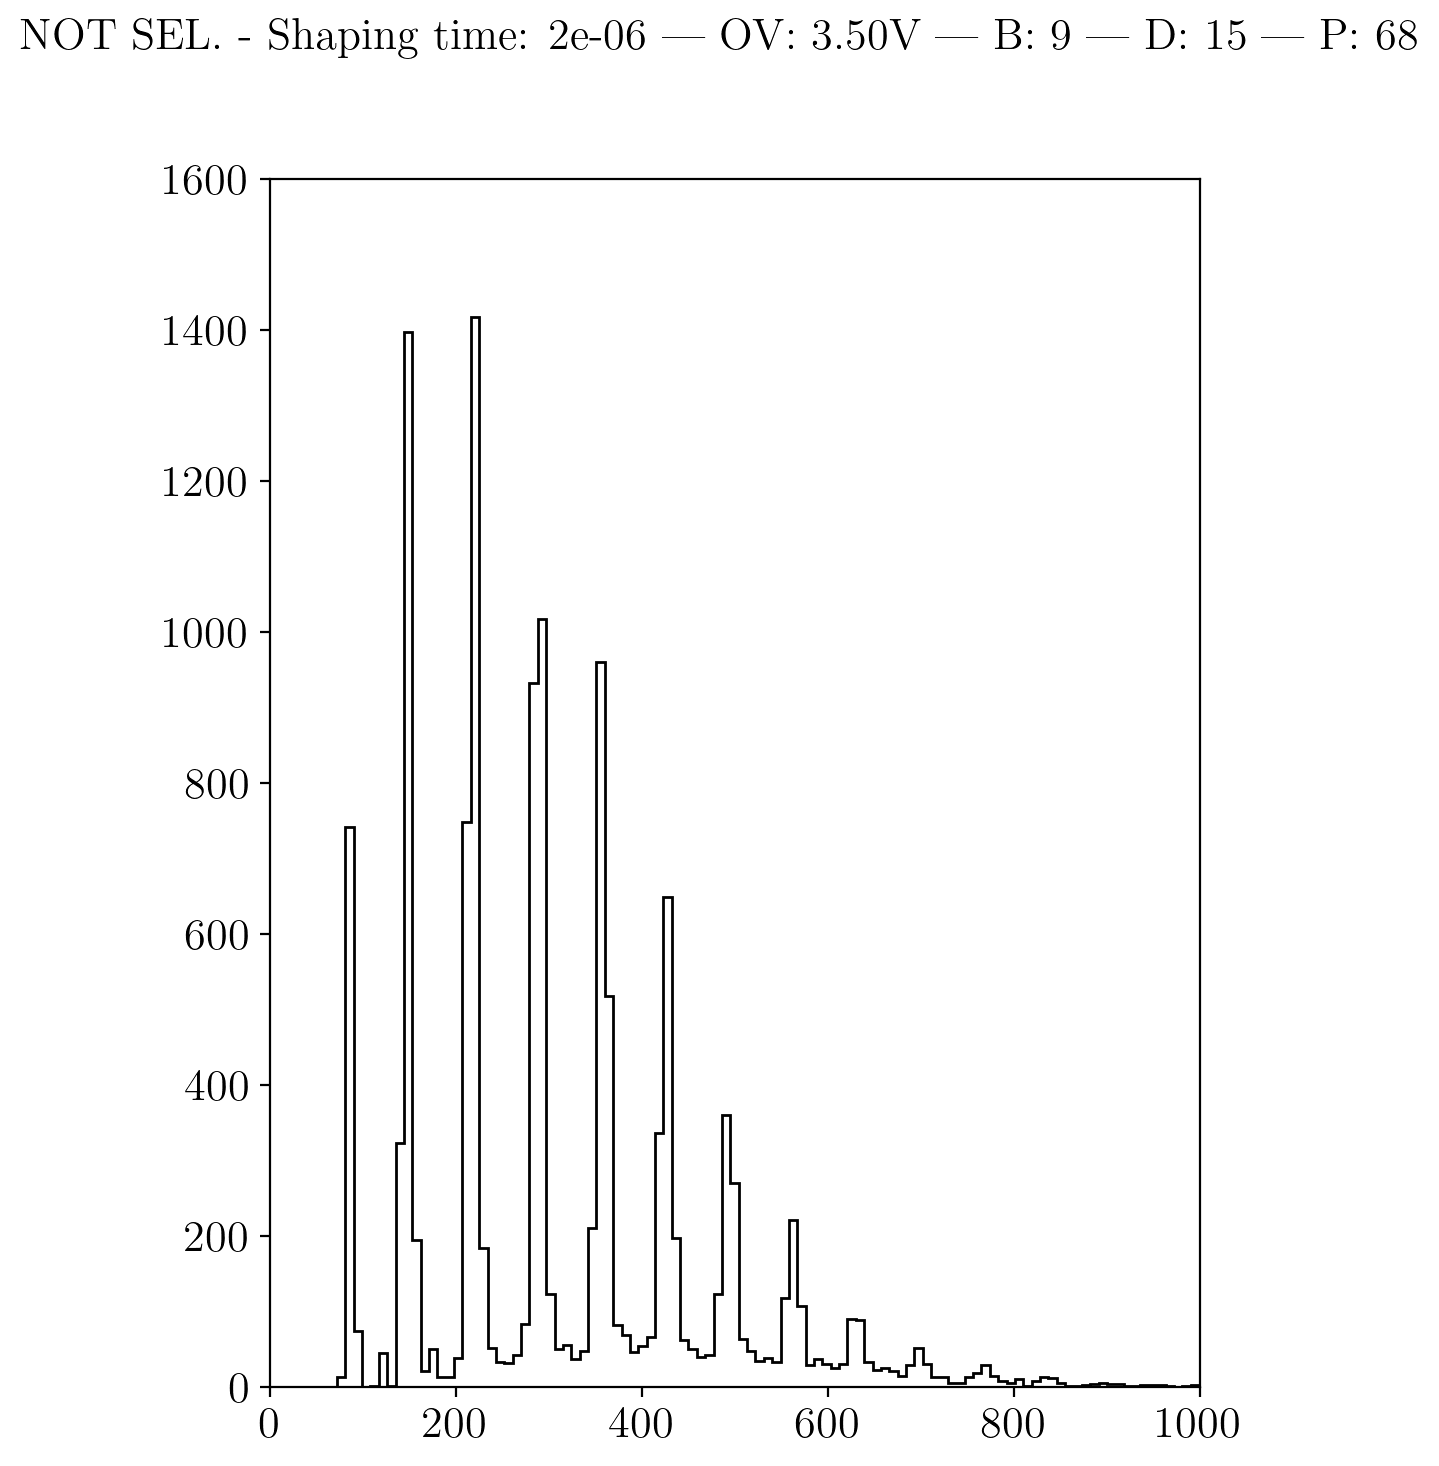

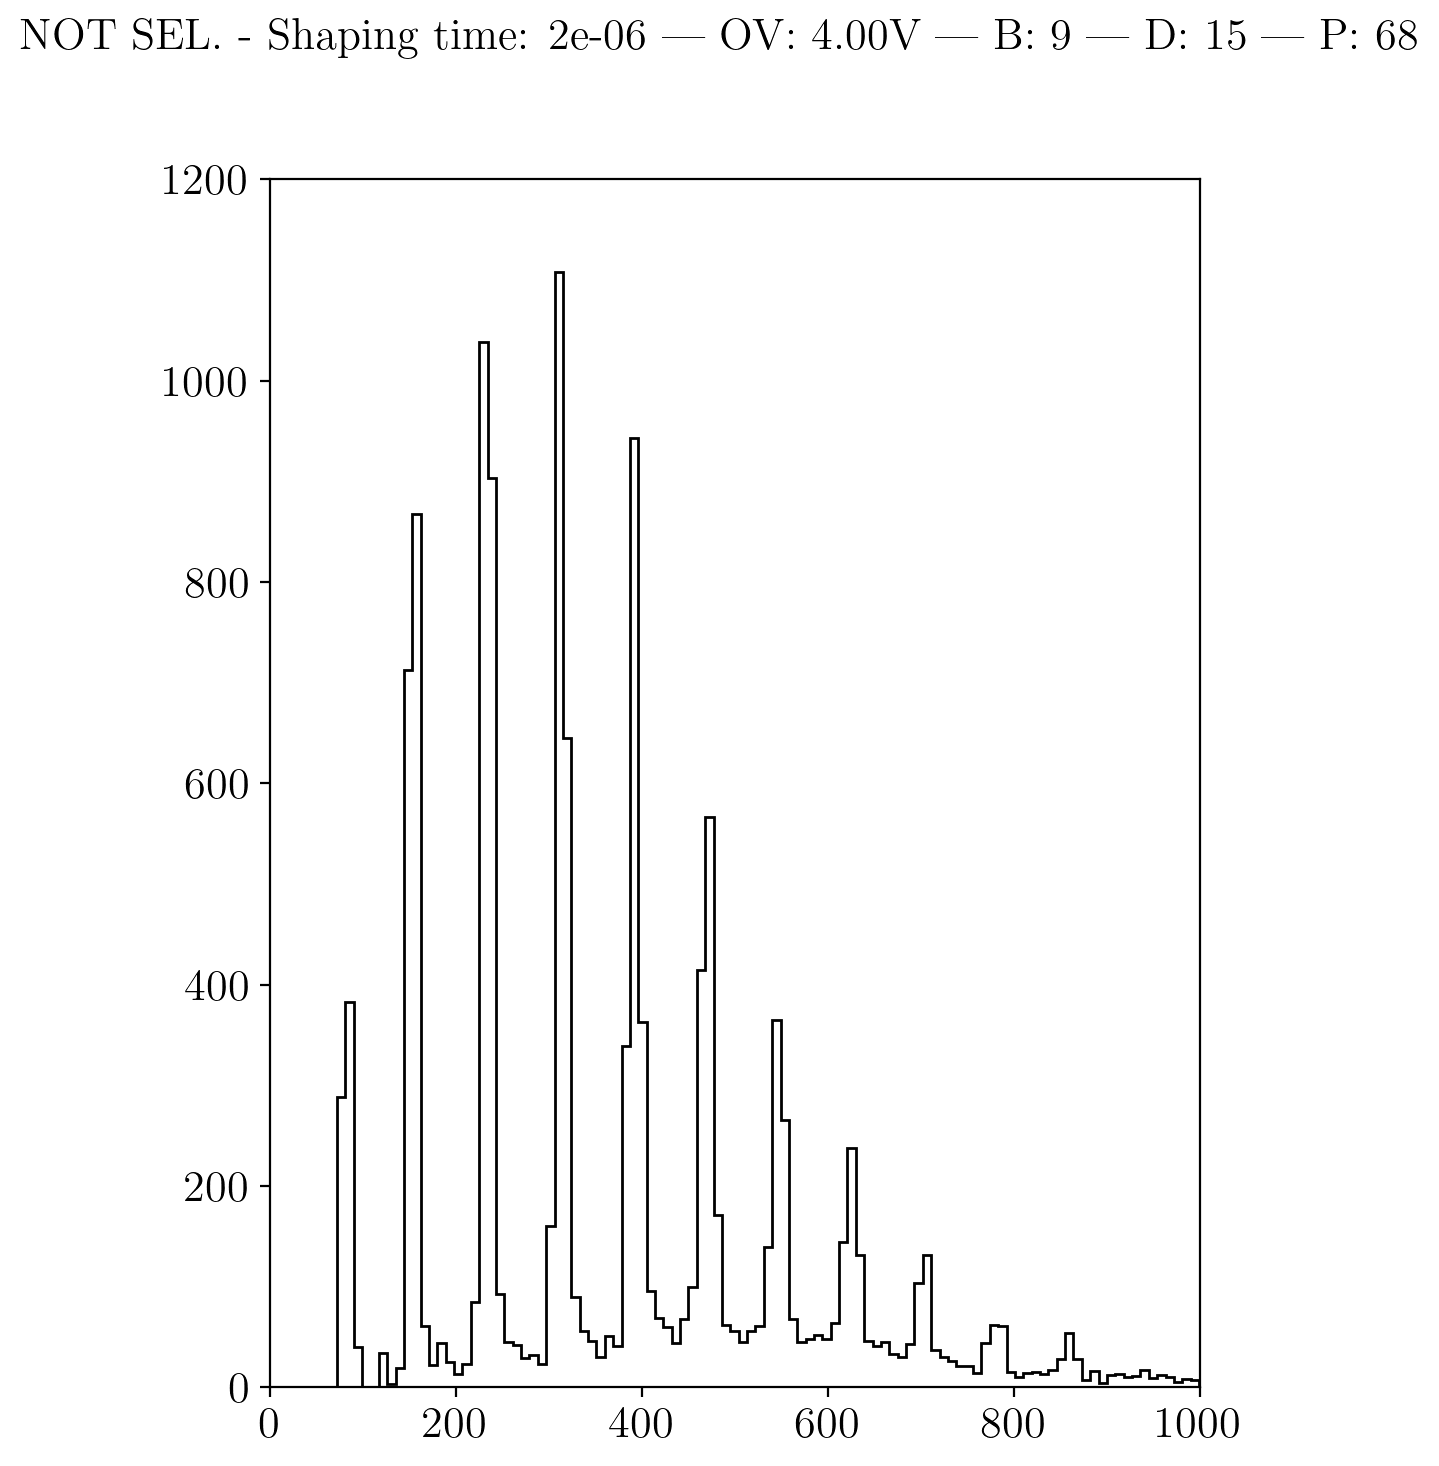

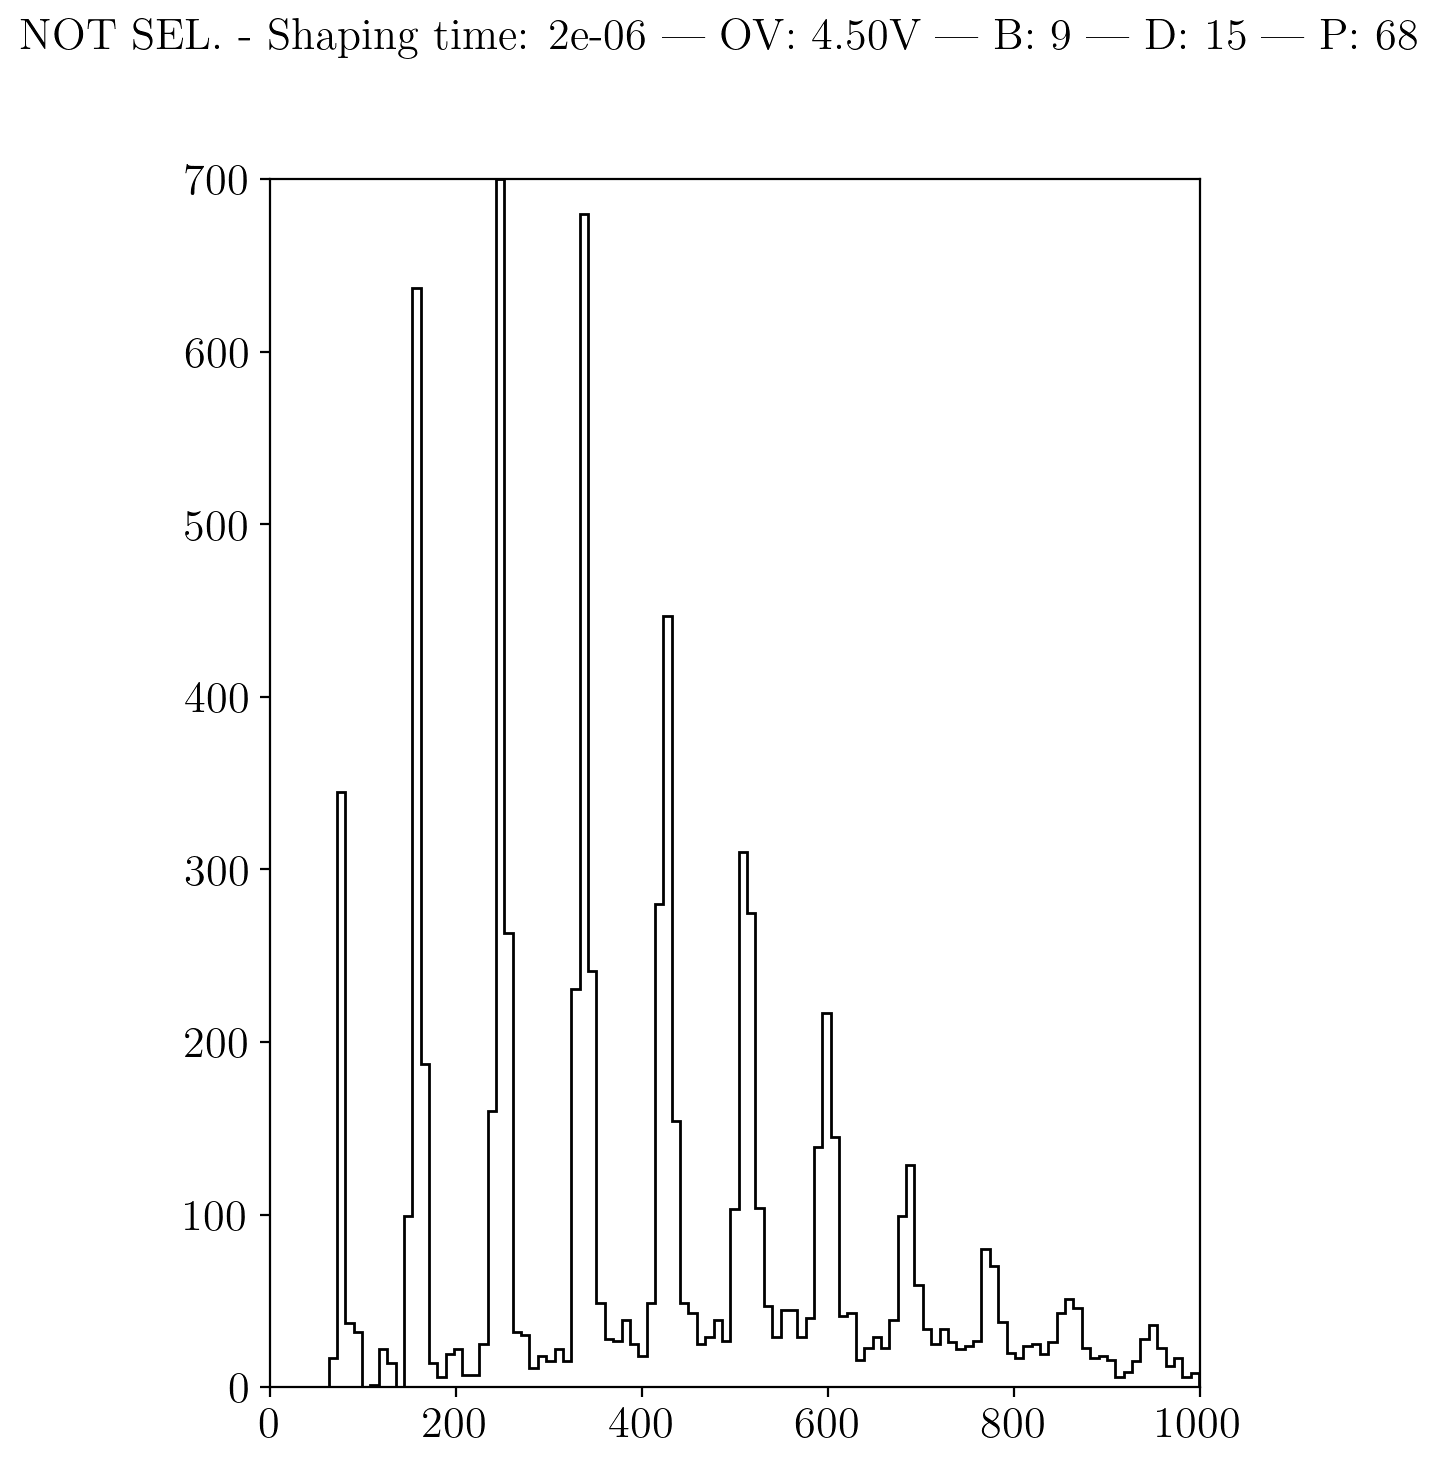

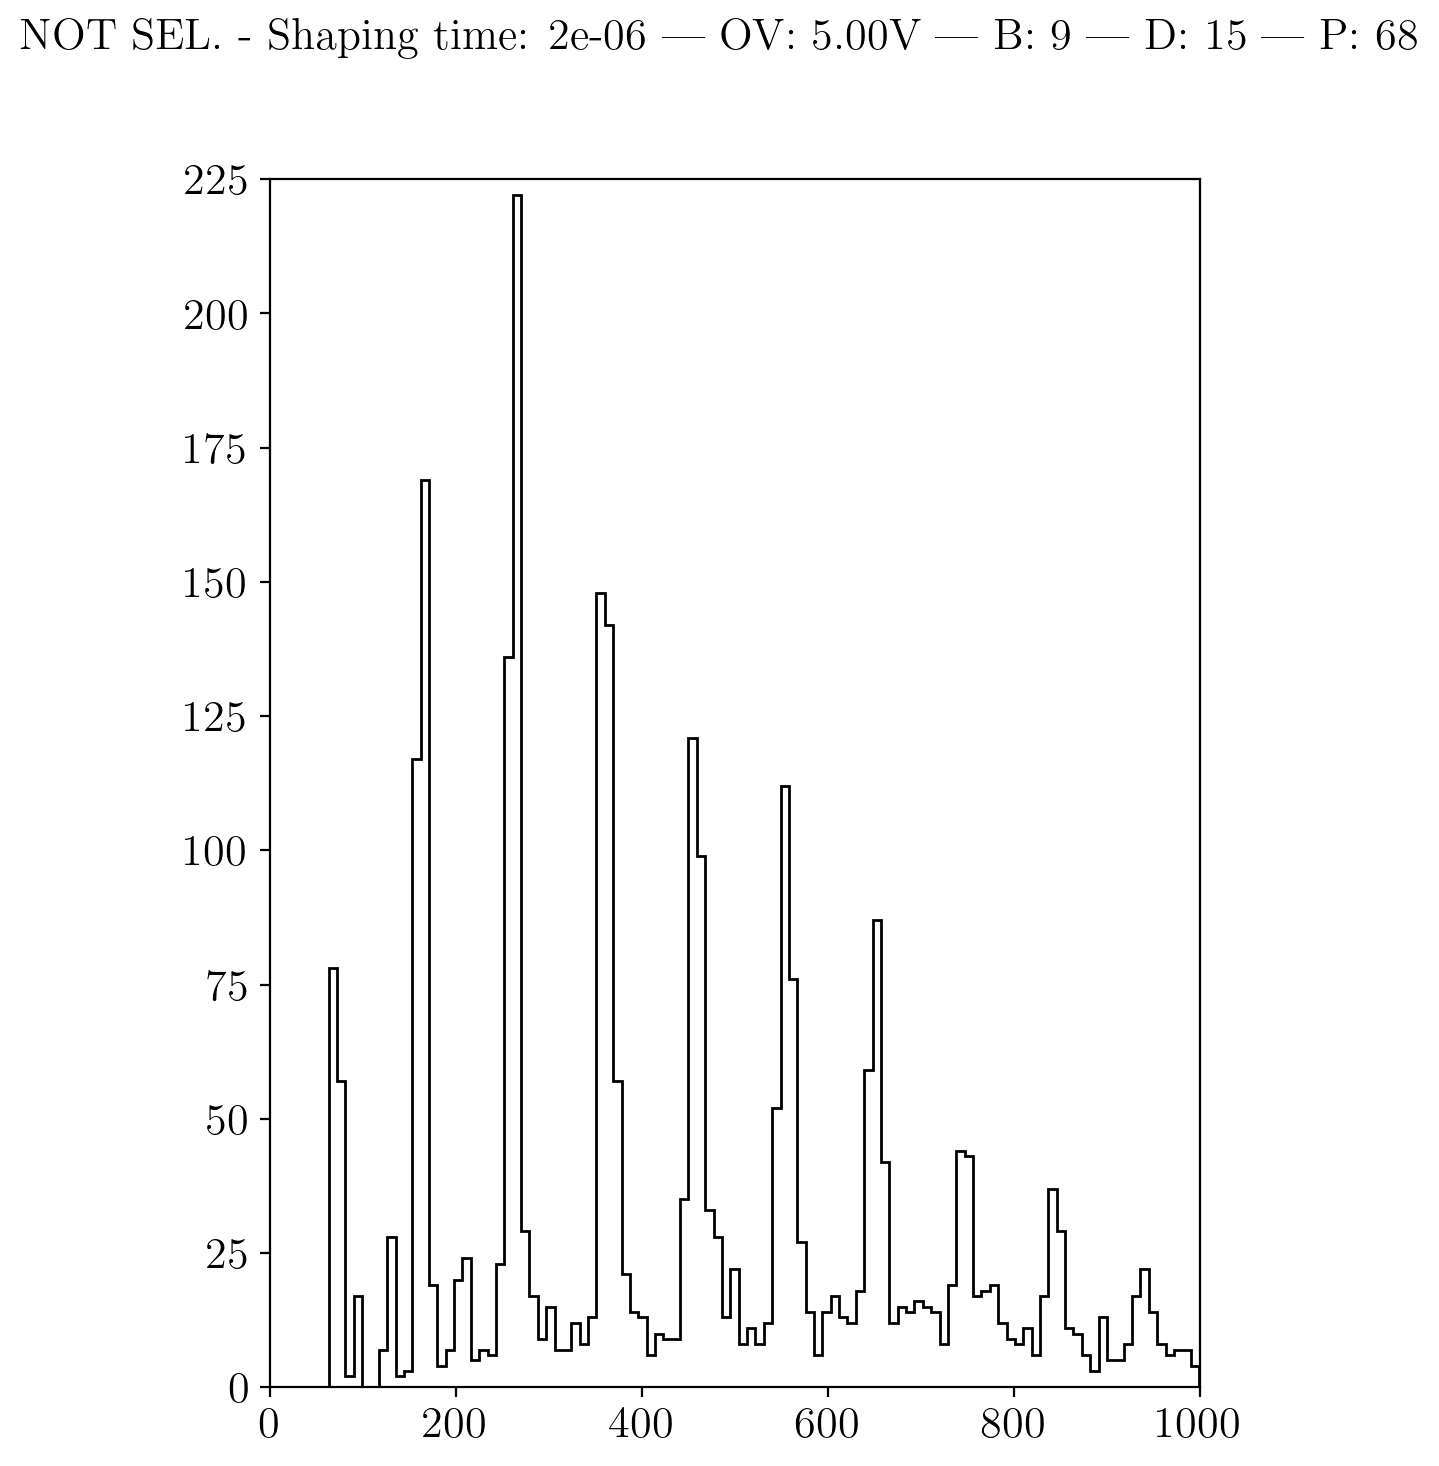

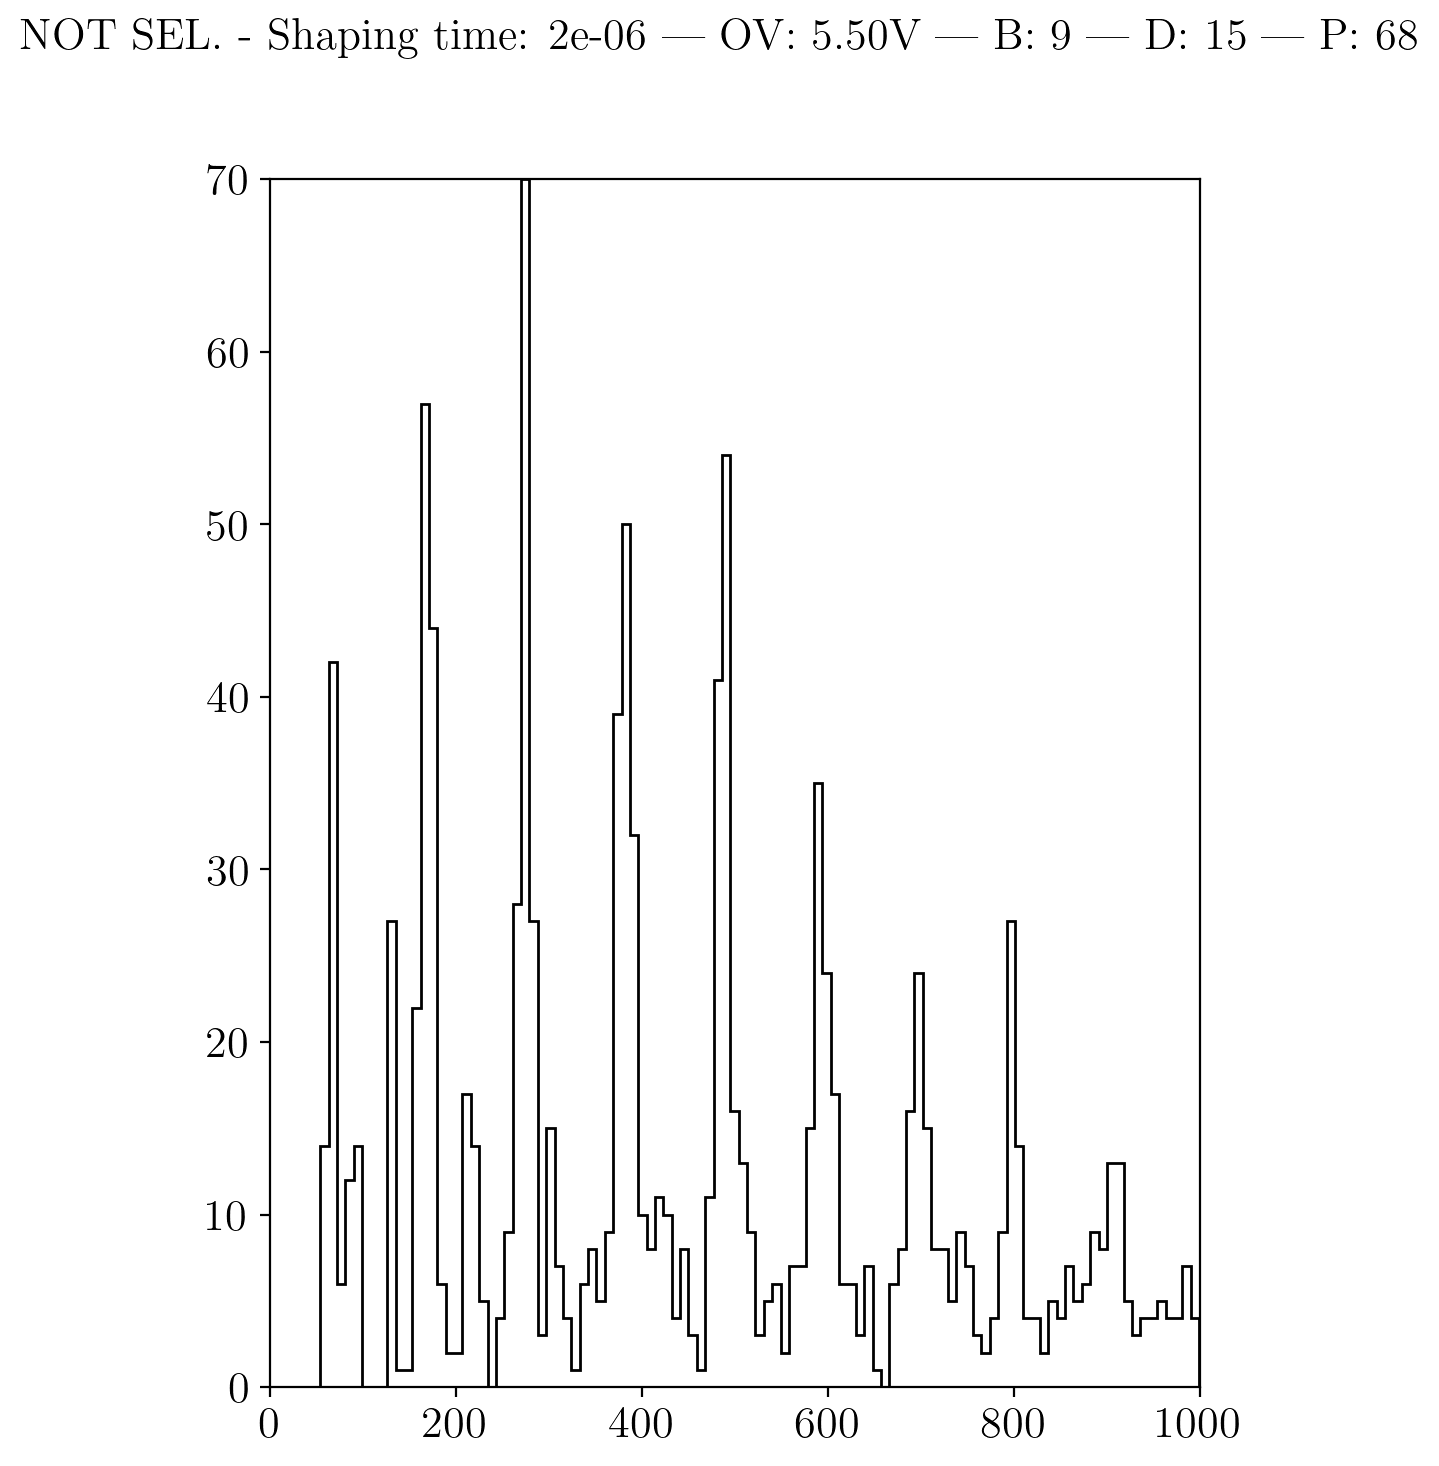

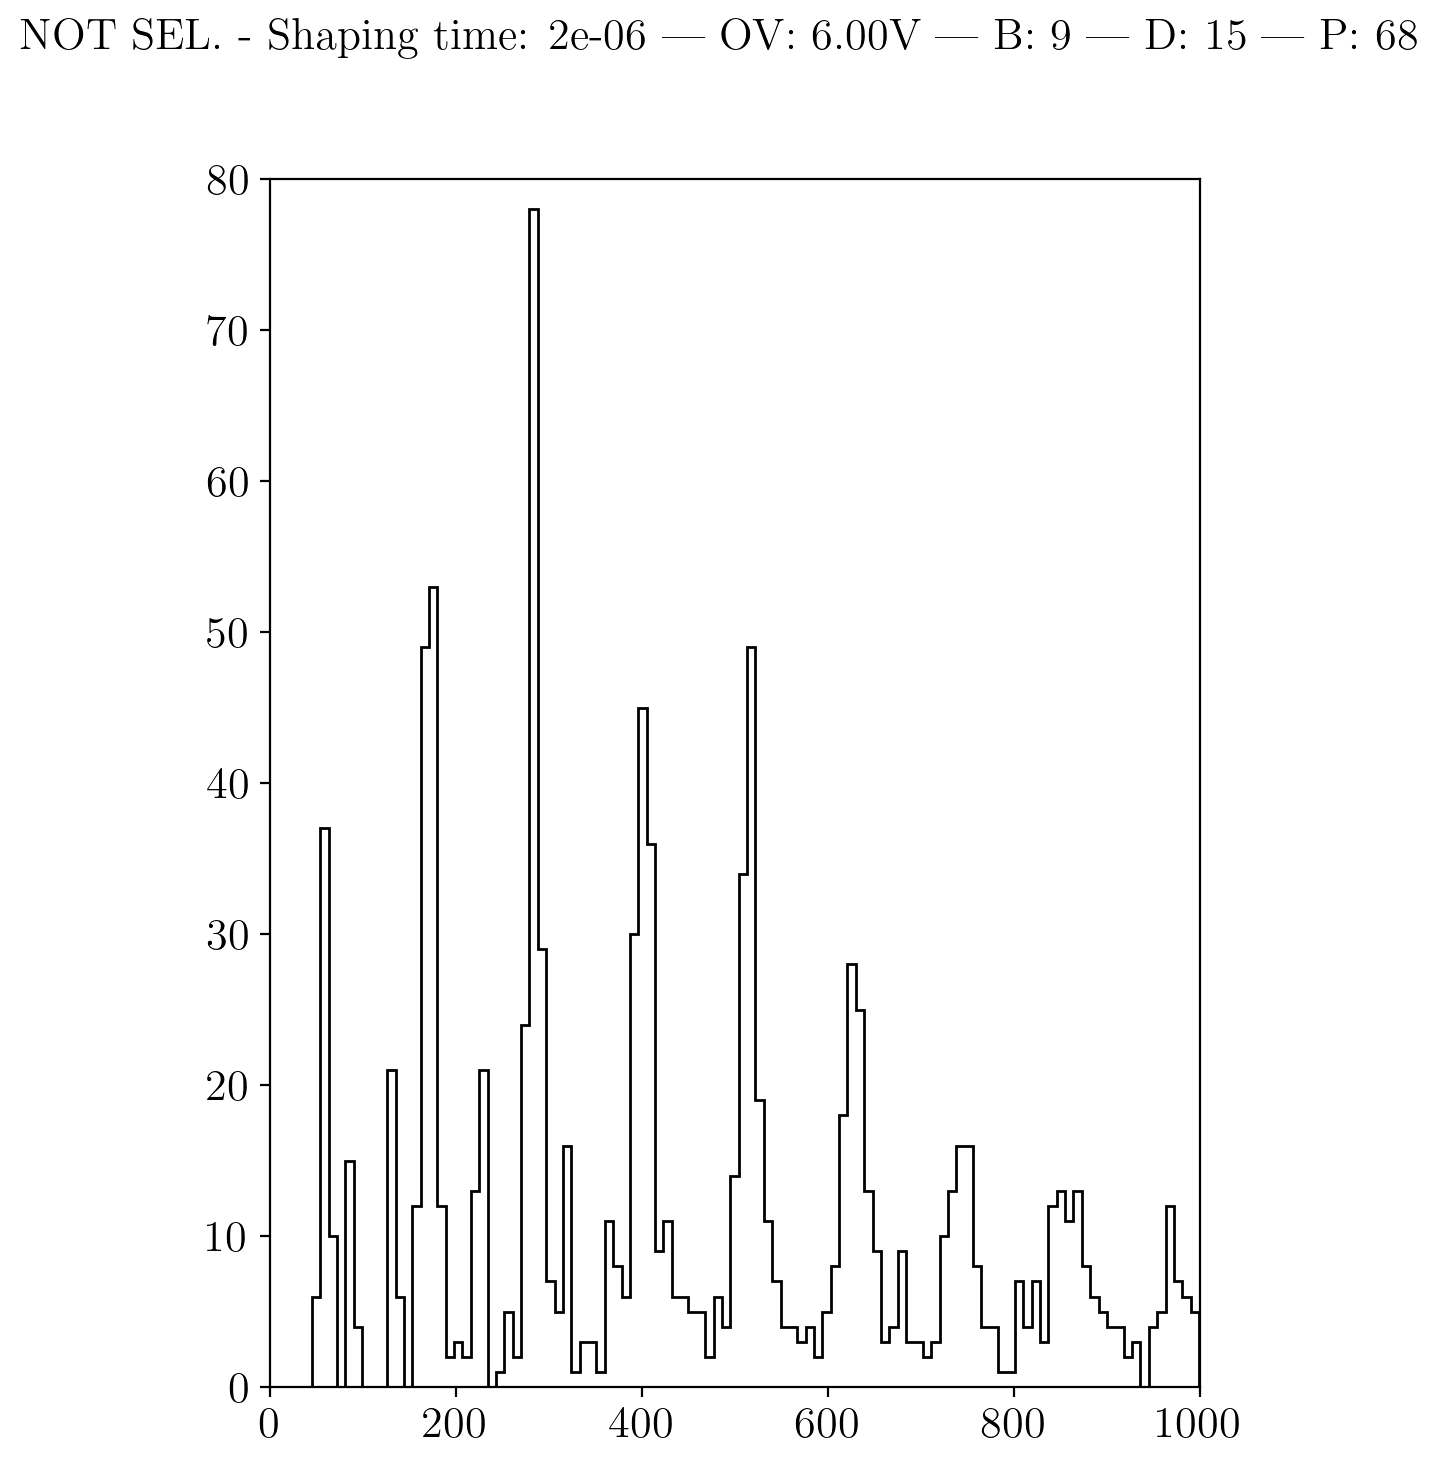

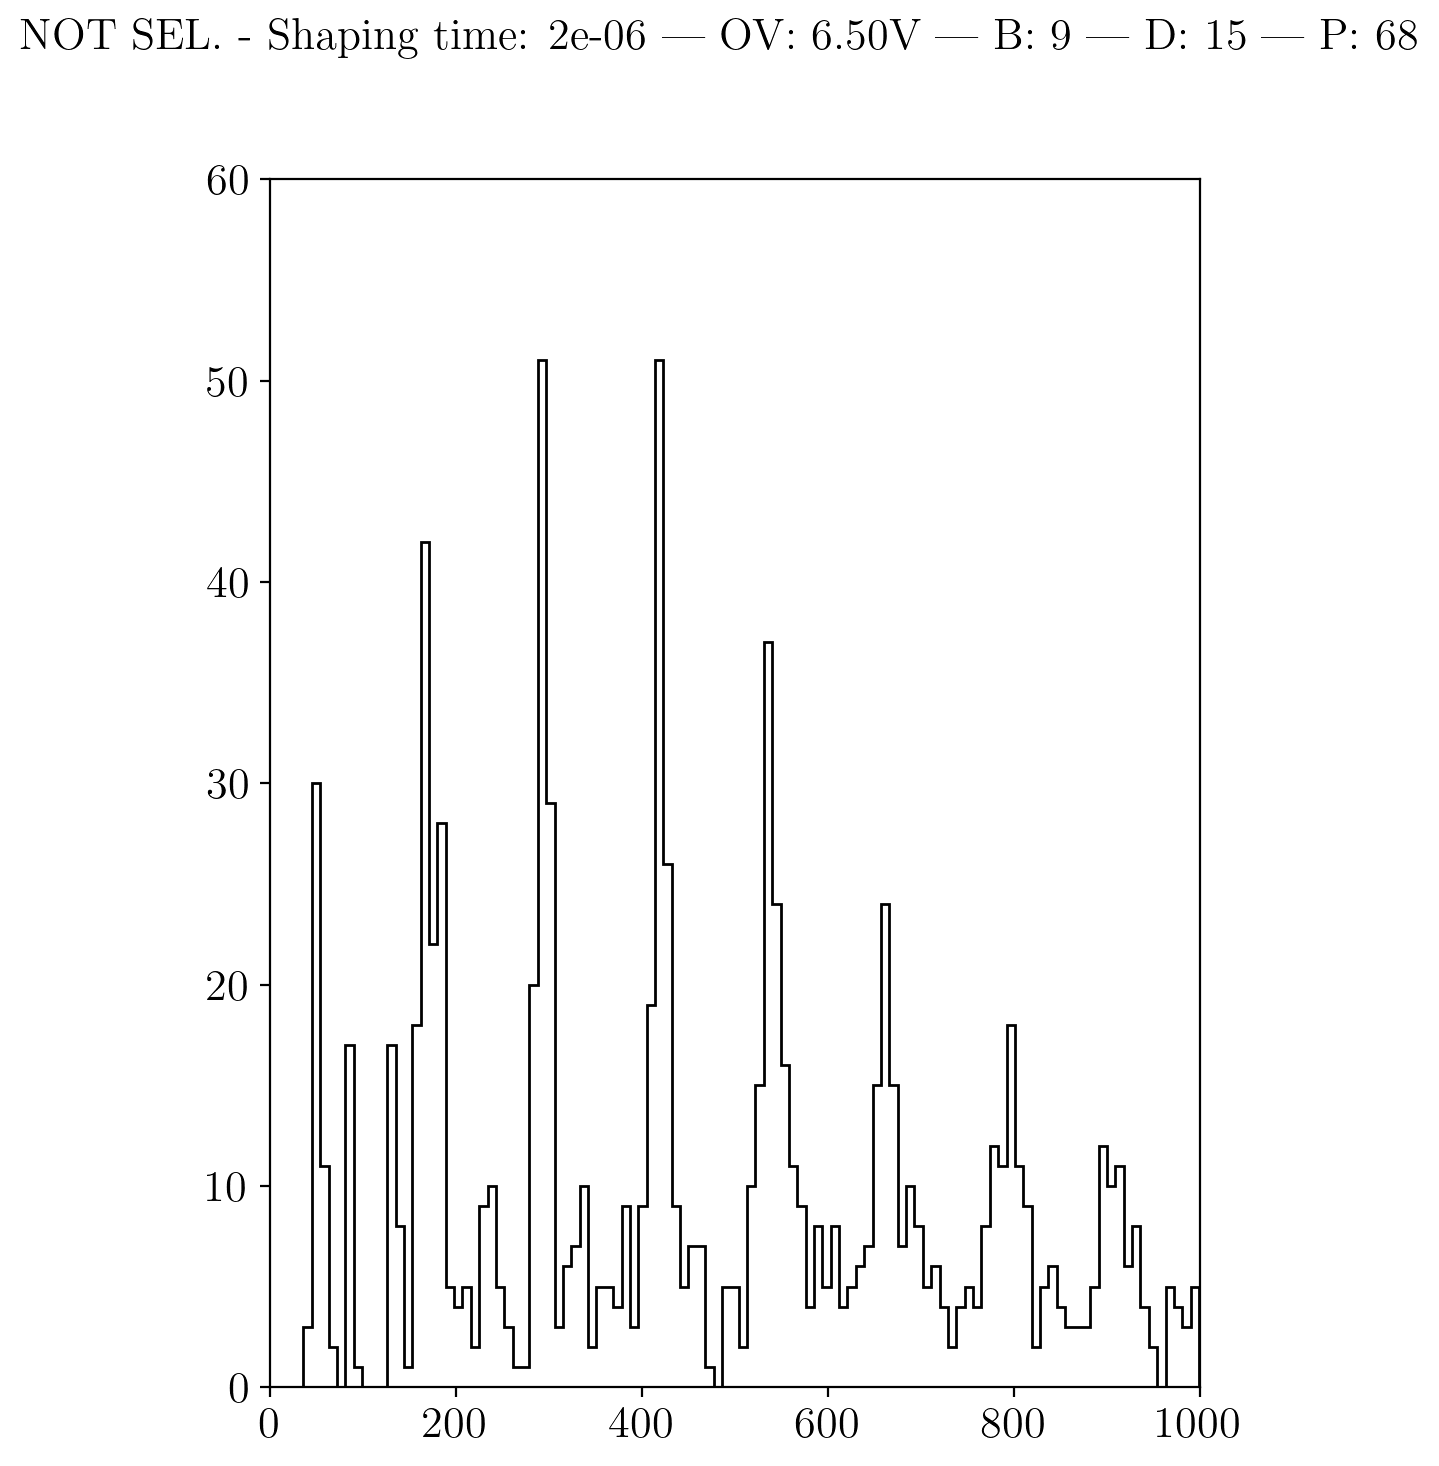

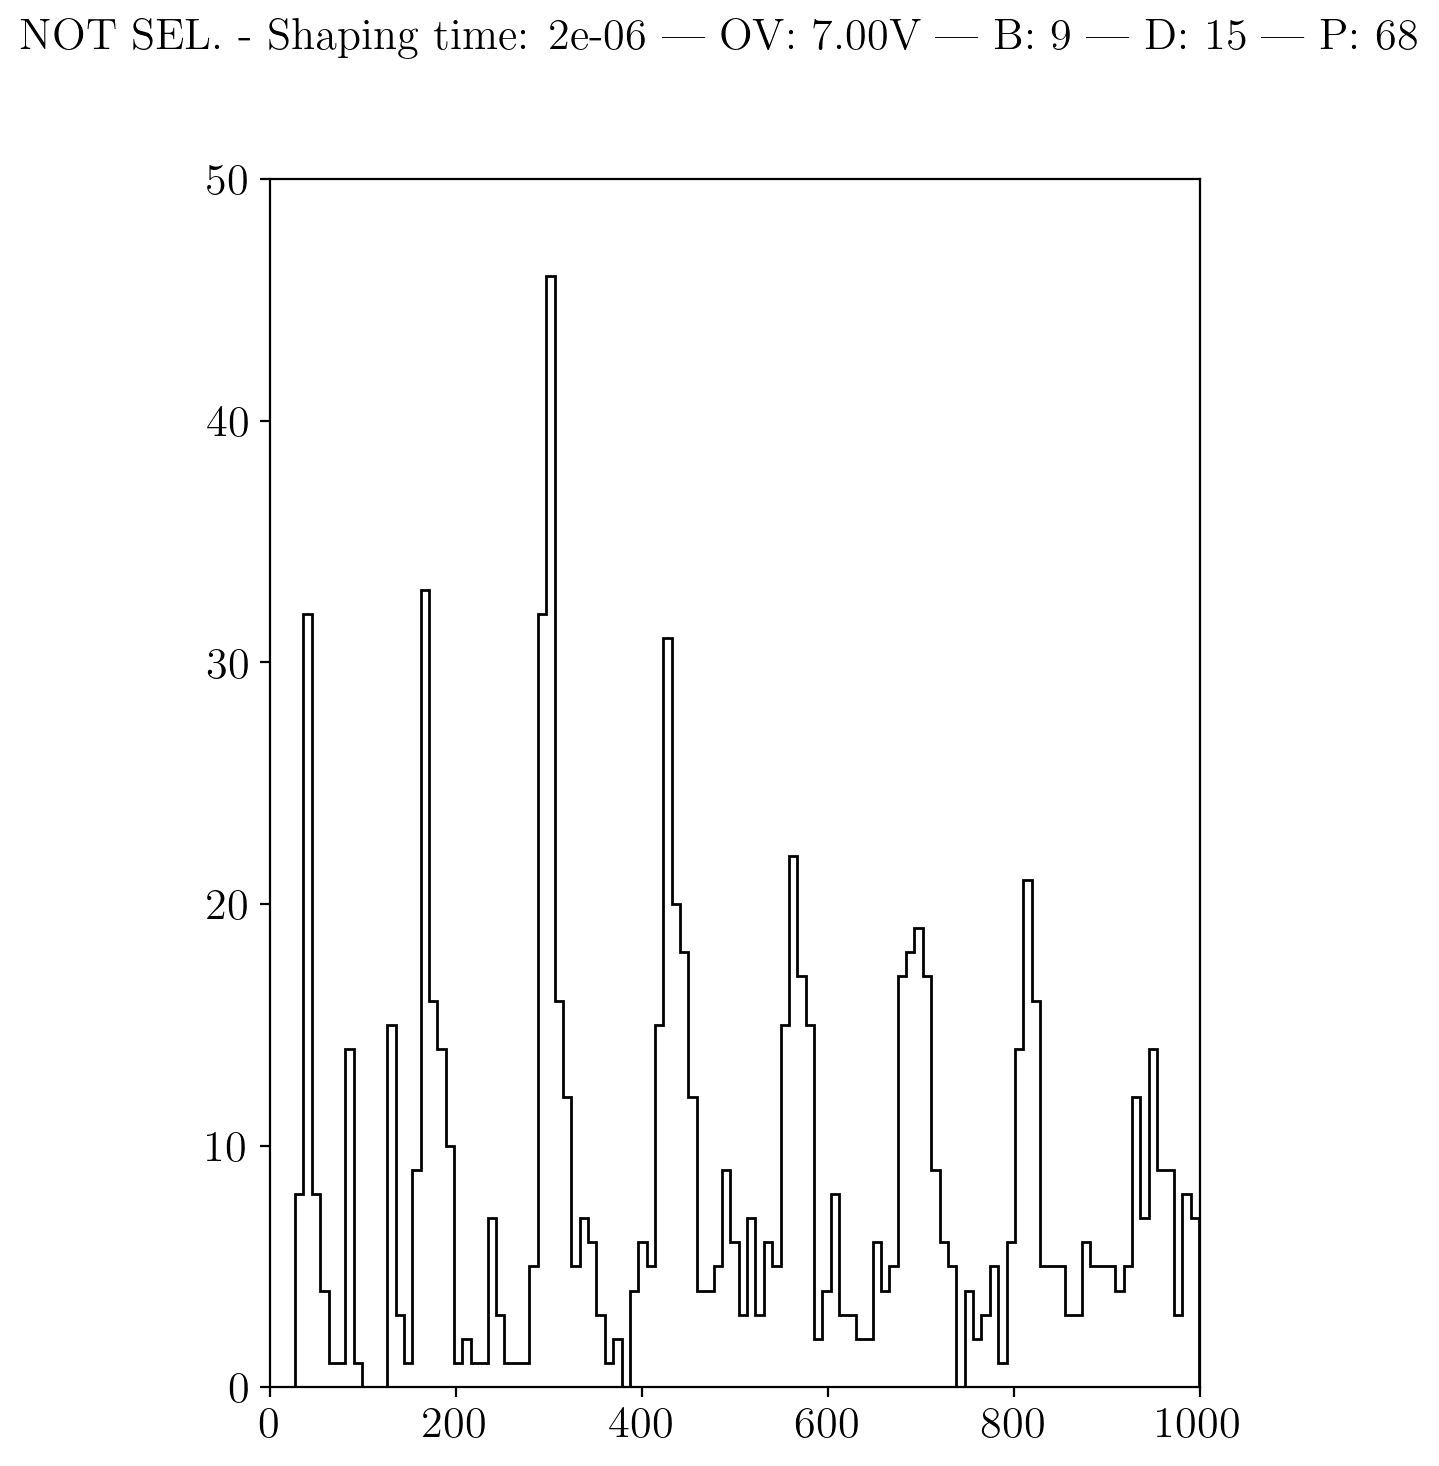

IntProgress(value=0, bar_style='info', description='5e-06', layout=Layout(width='100%'), max=1862)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Smallest error (0) for g [] at 249 (P: 88, D: 15, B: 7) for 0 pks


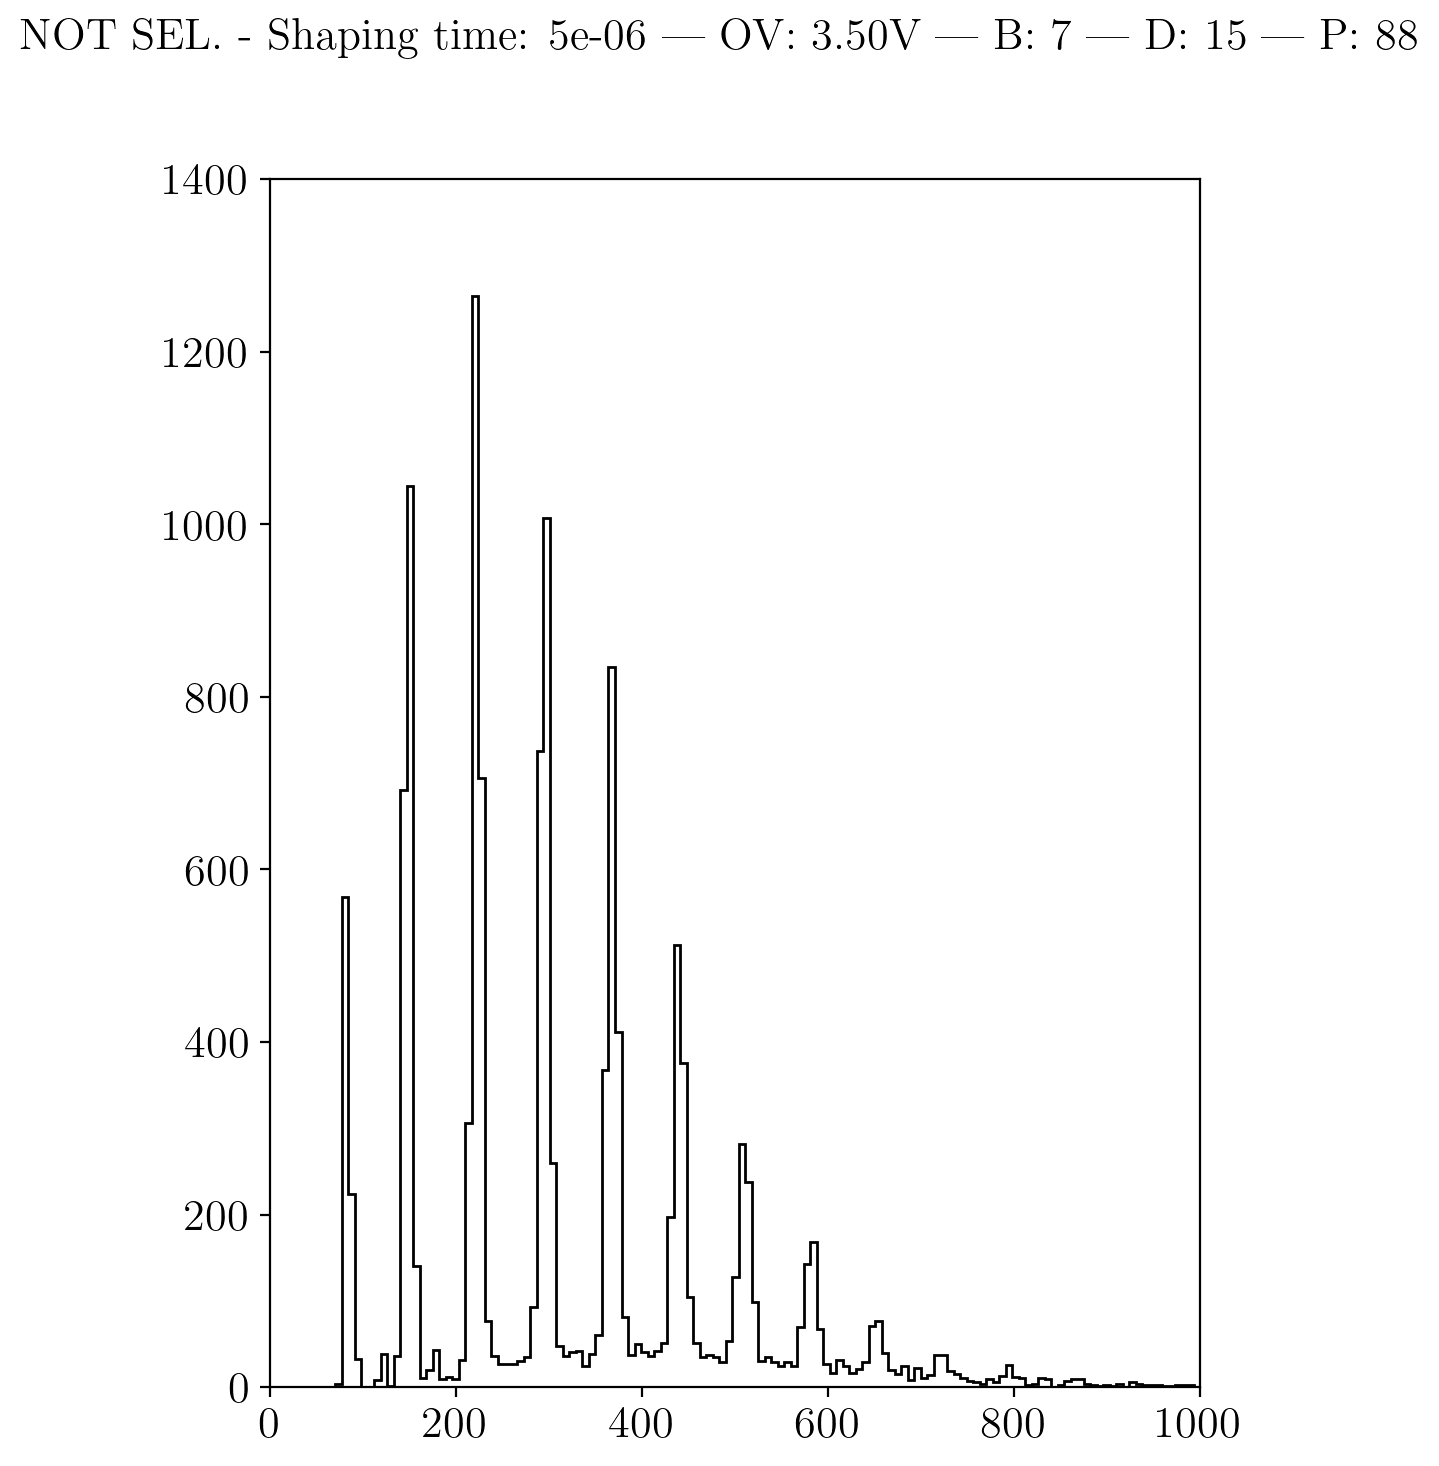

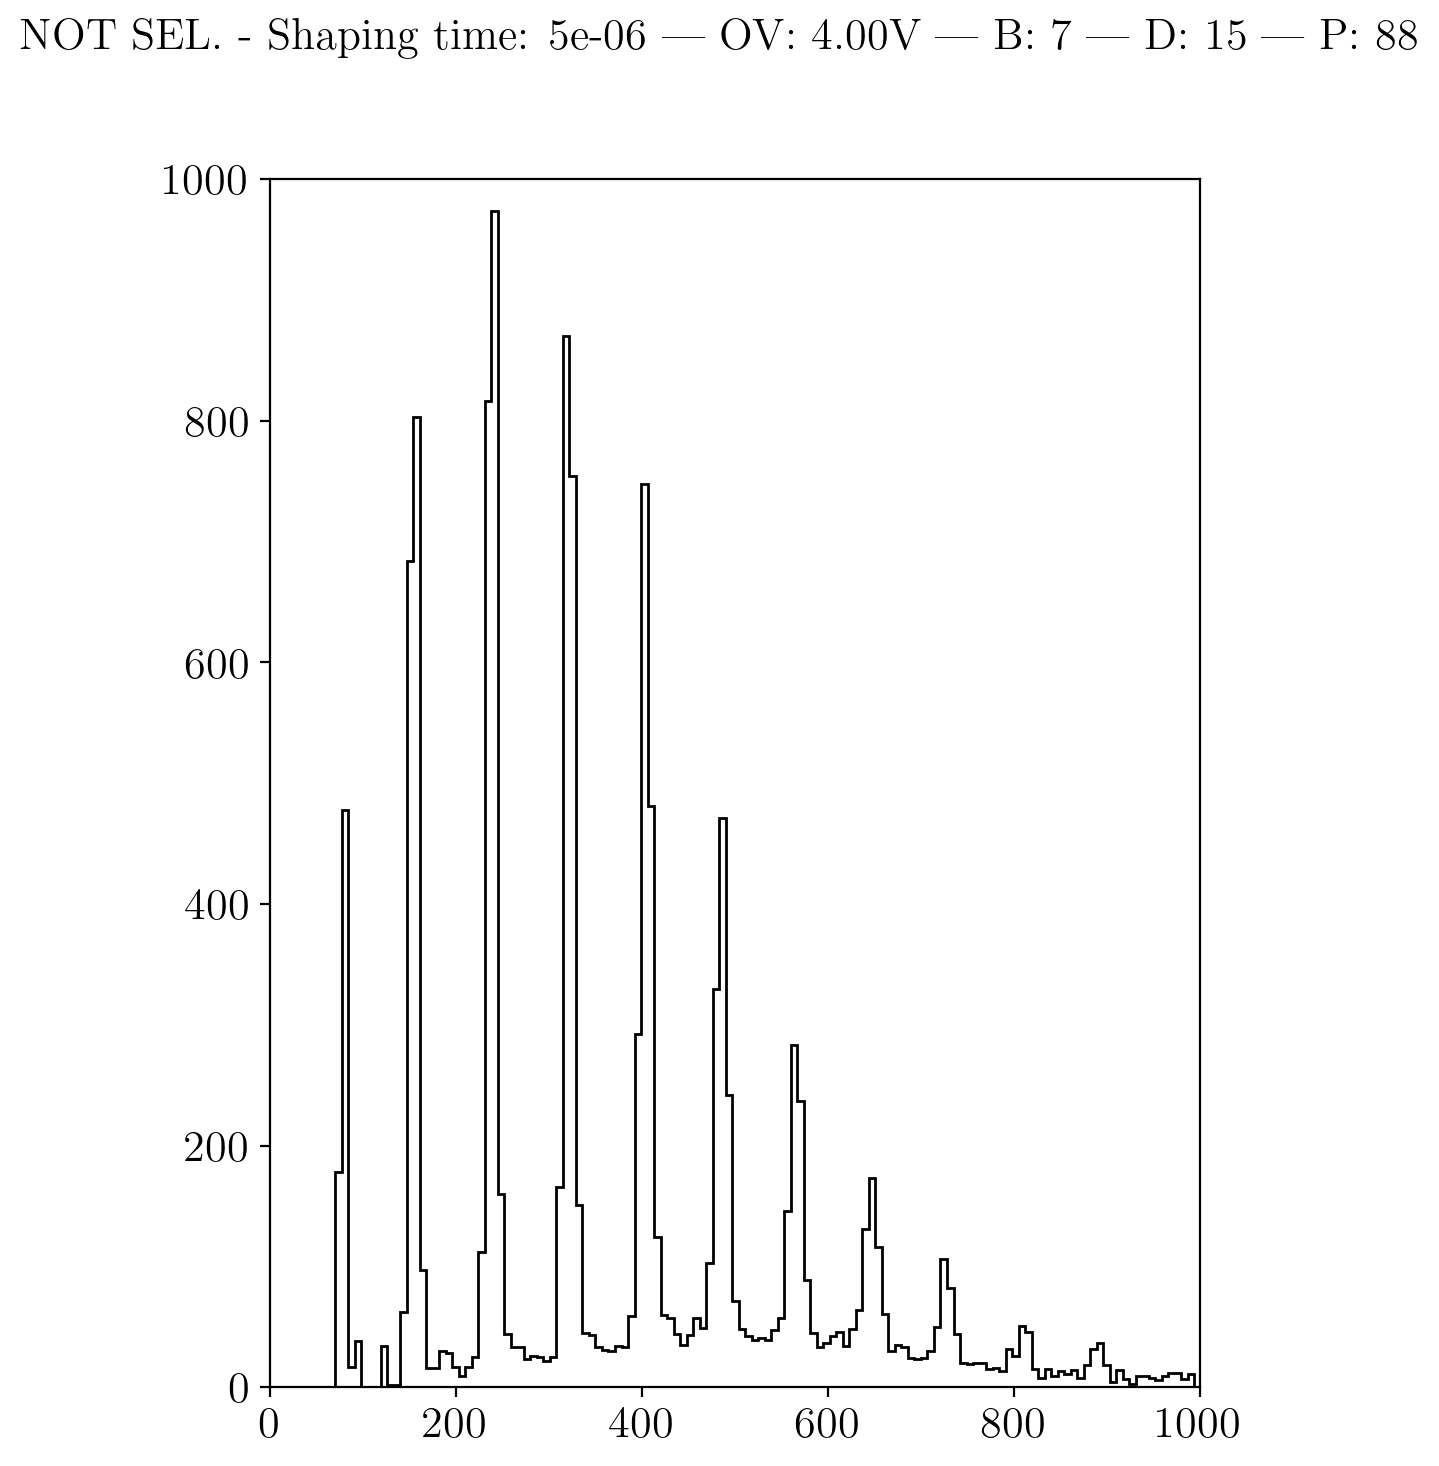

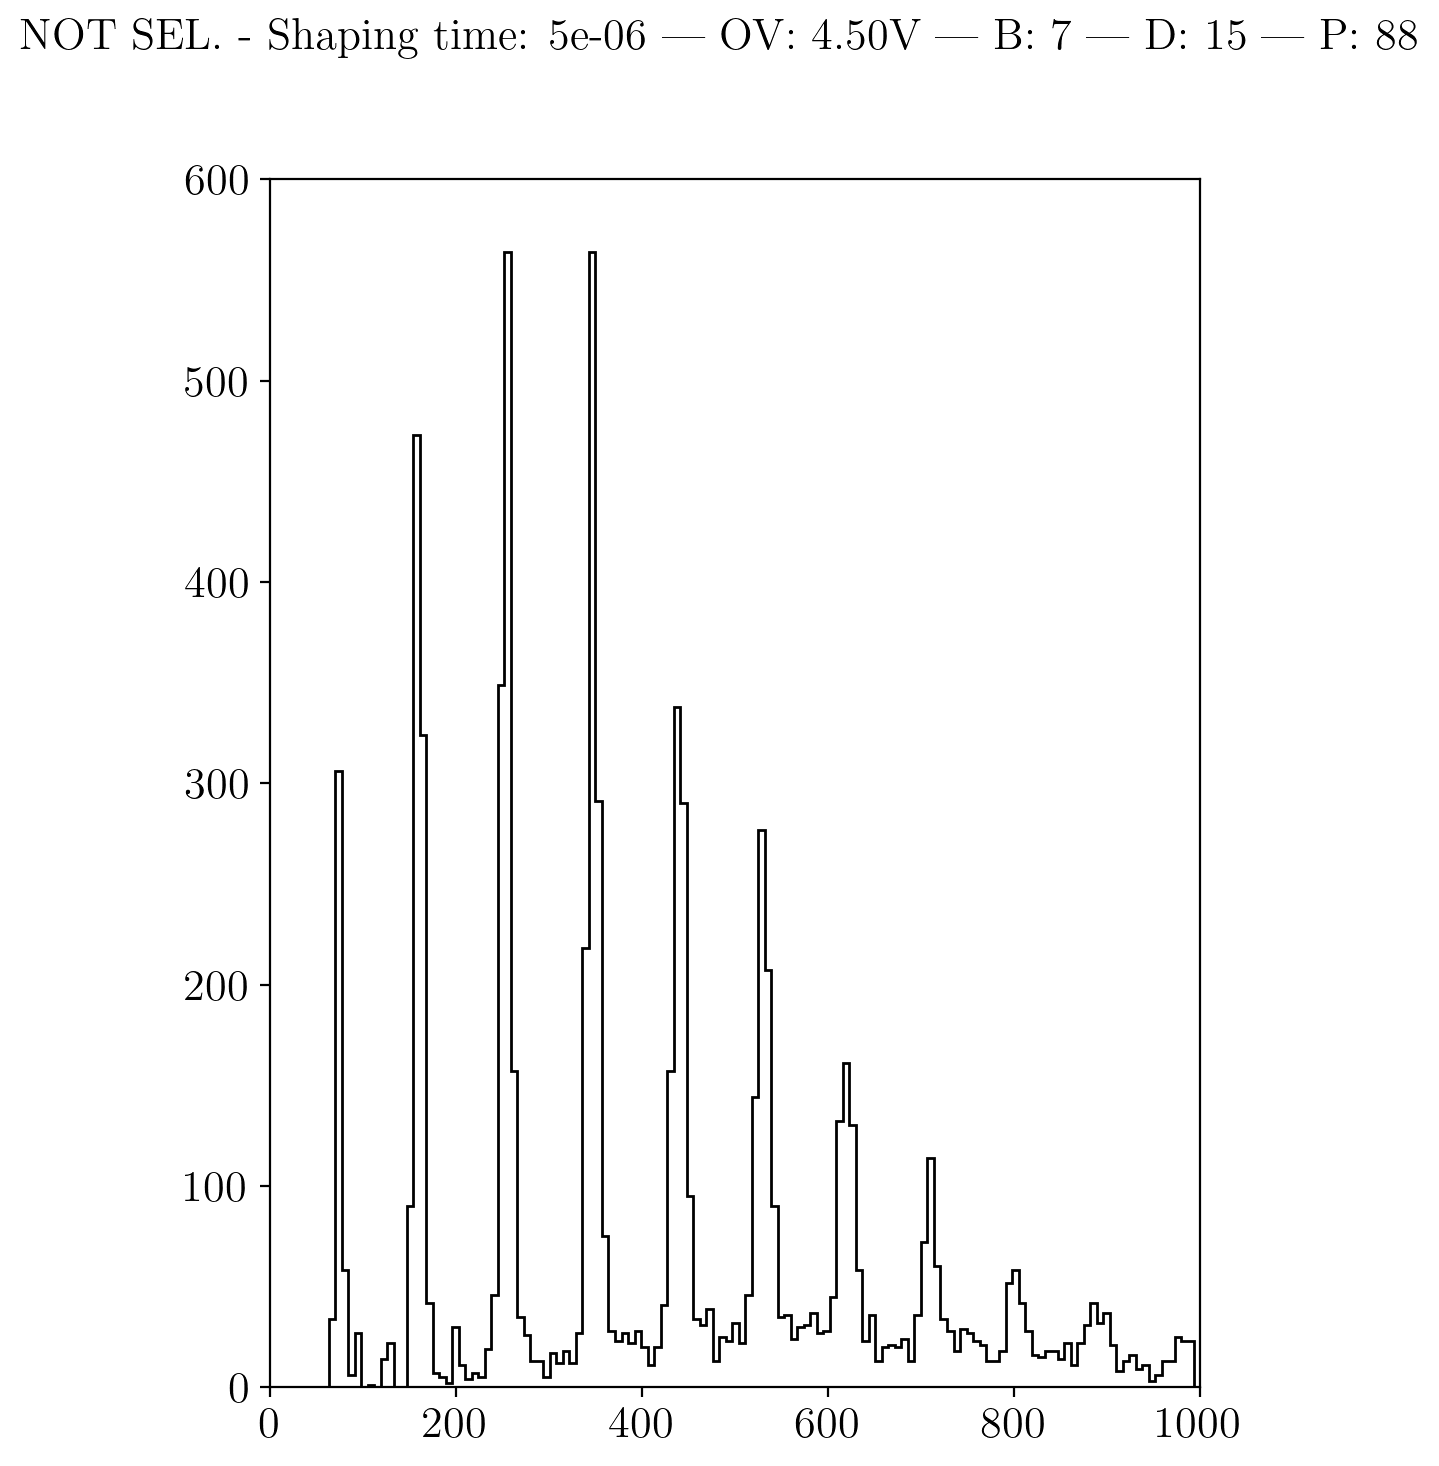

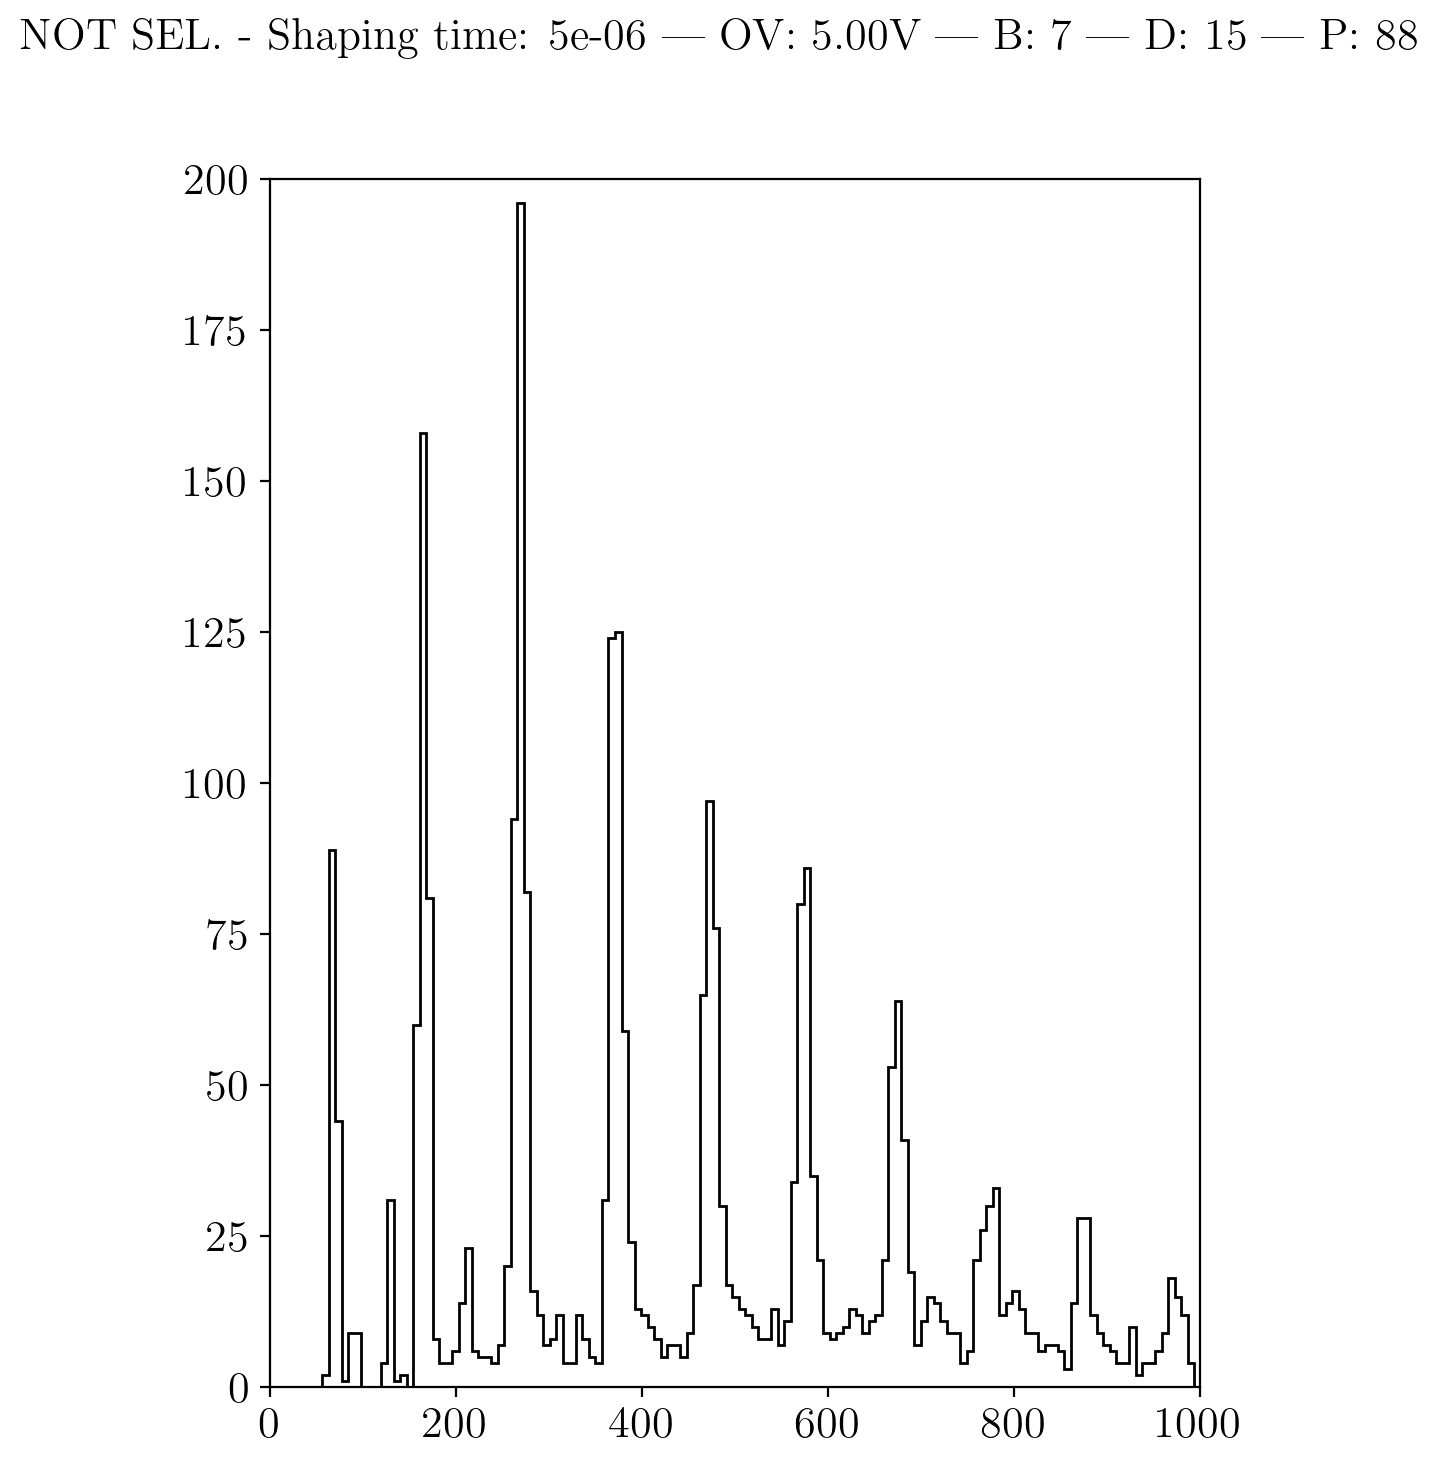

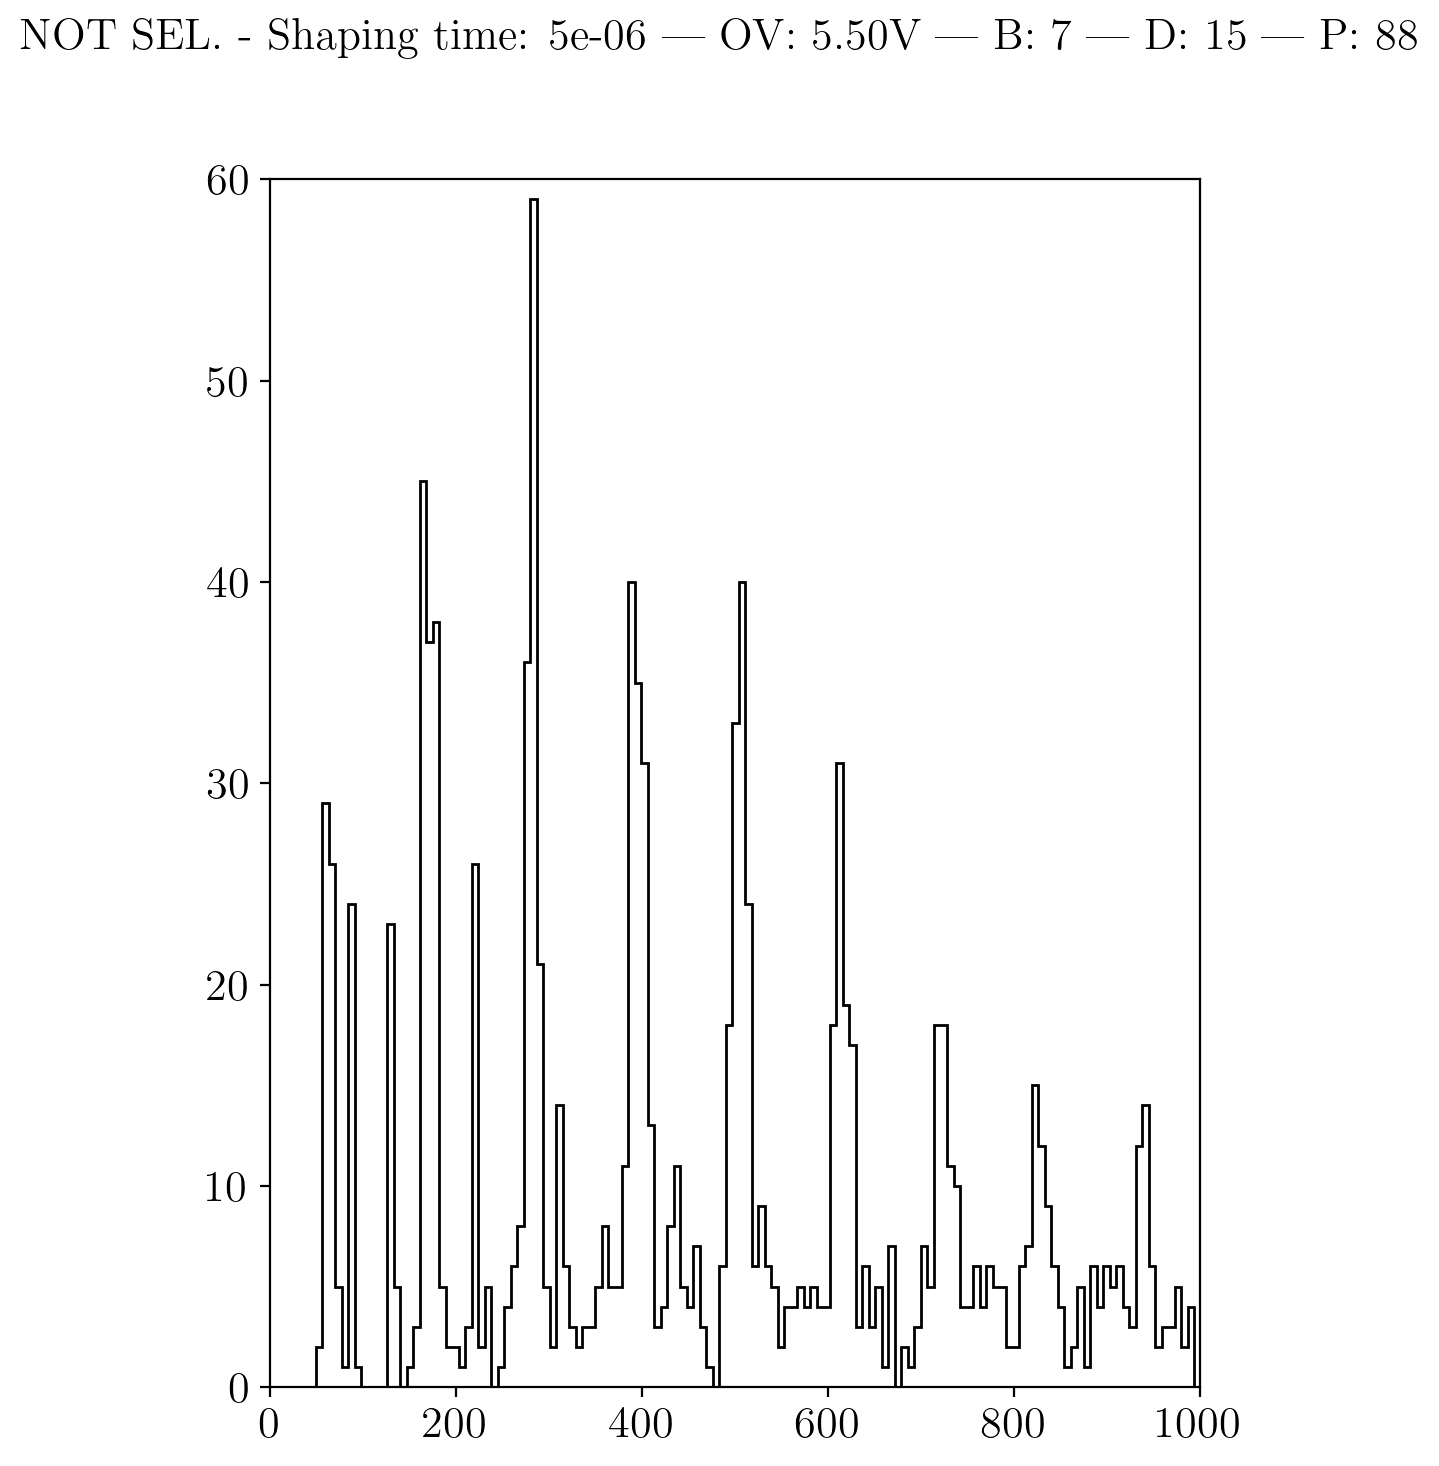

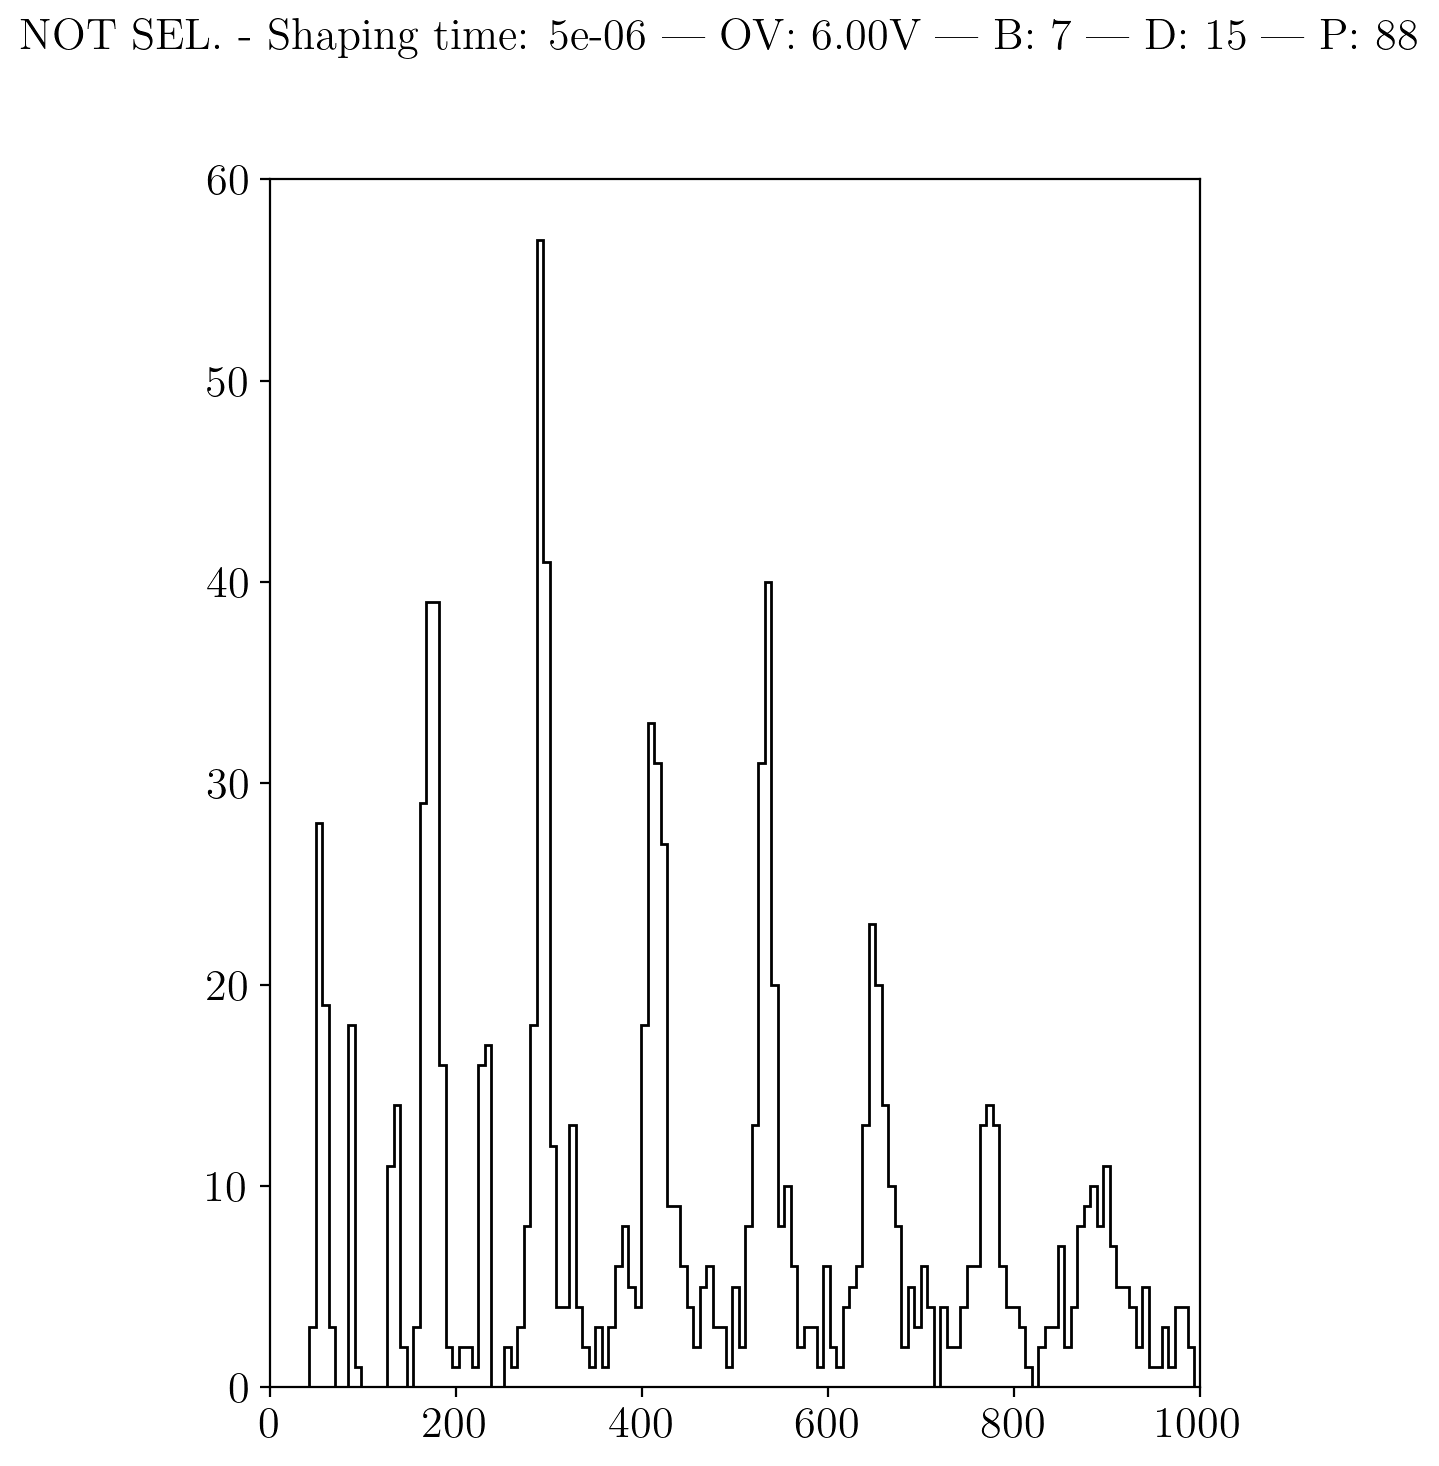

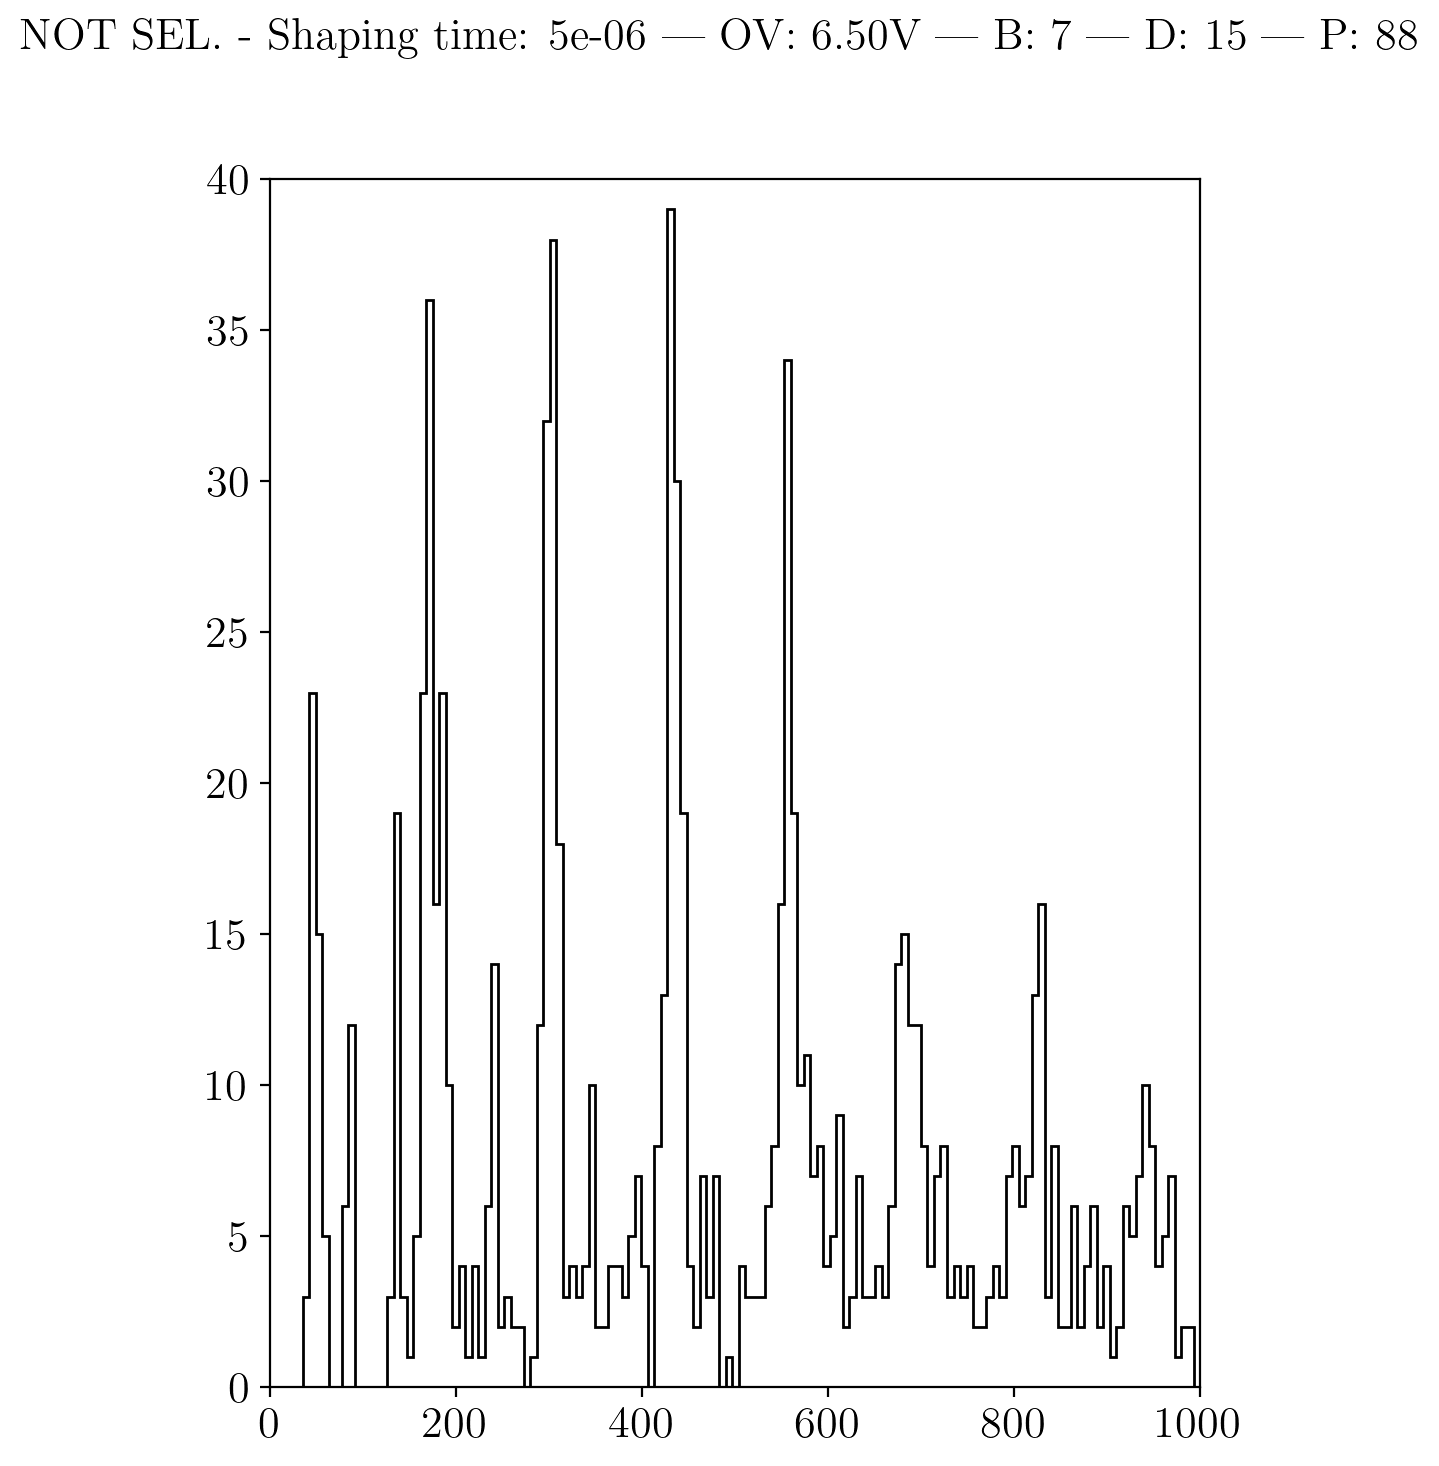

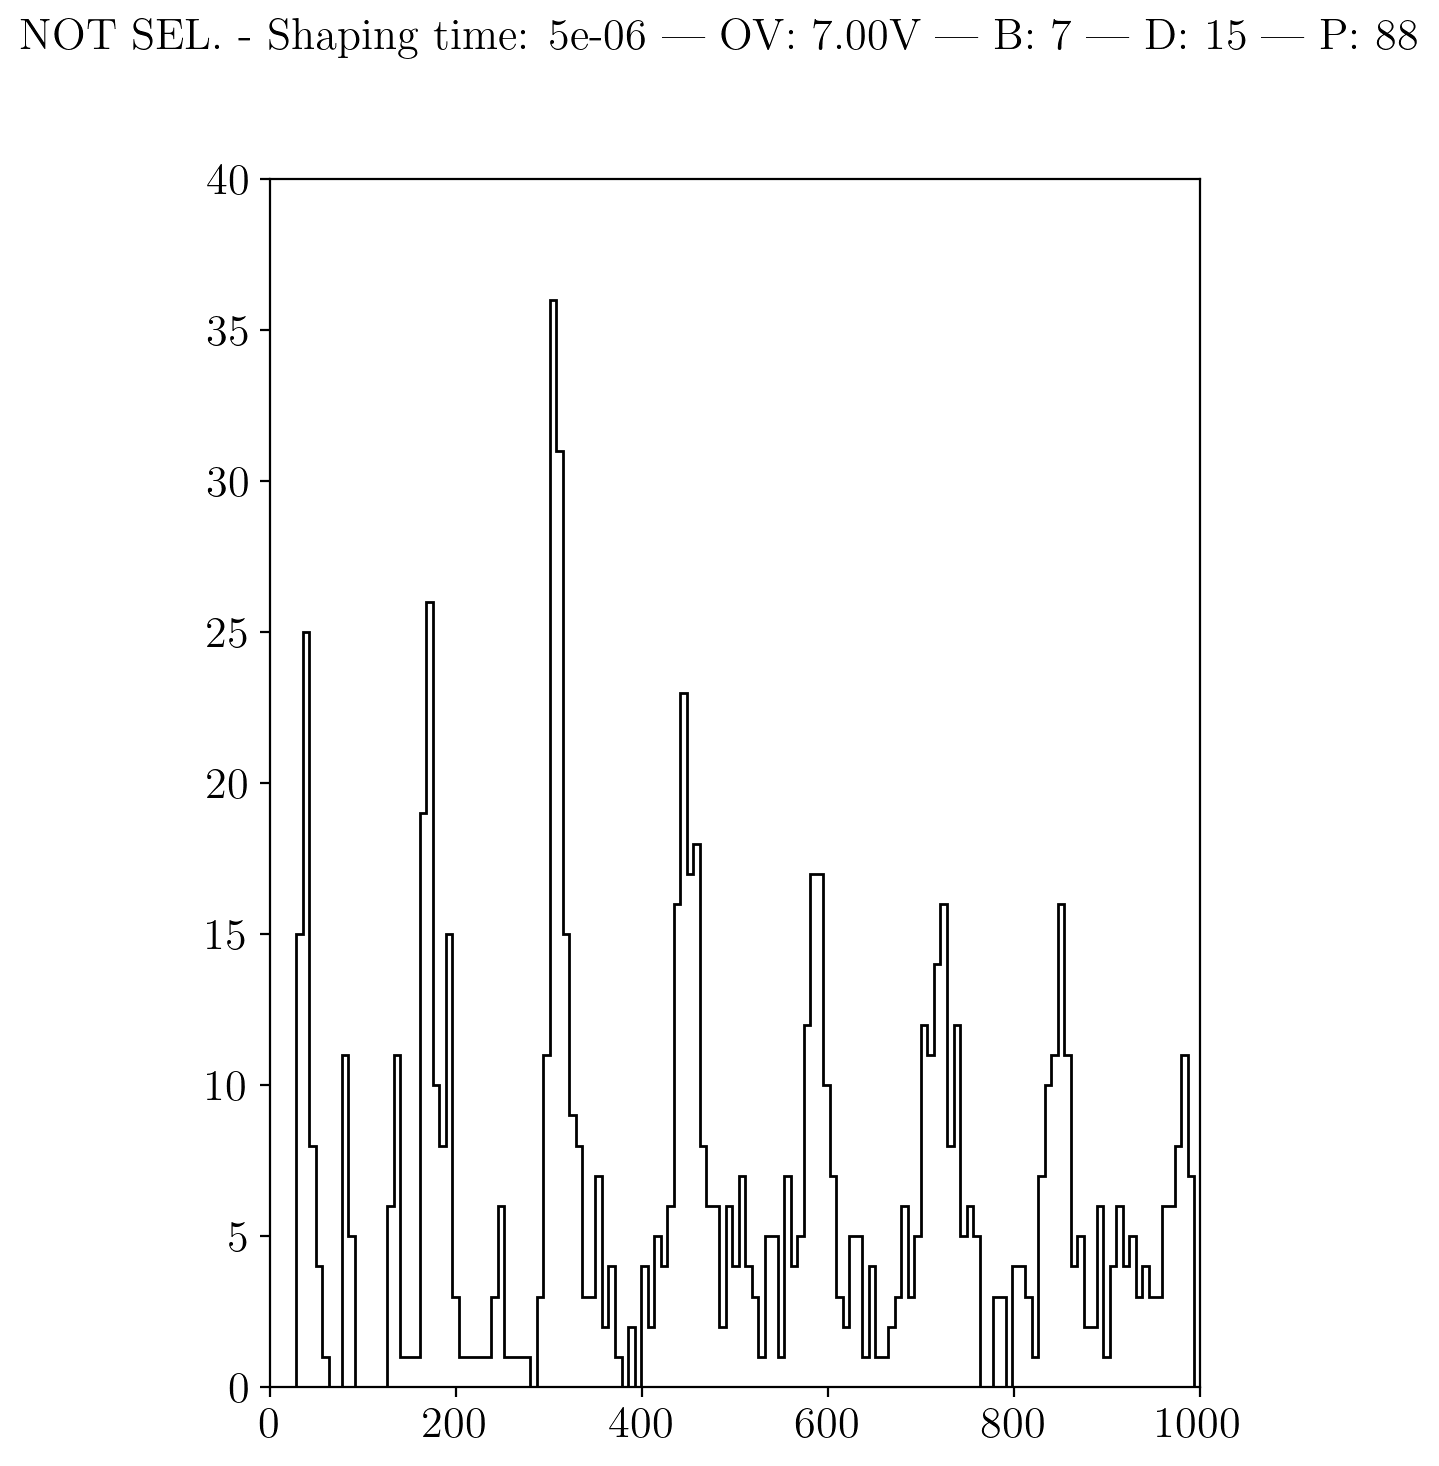

IntProgress(value=0, bar_style='info', description='1e-05', layout=Layout(width='100%'), max=1862)

Smallest error (0) for g [] at 188 (P: 43, D: 15, B: 9) for 0 pks


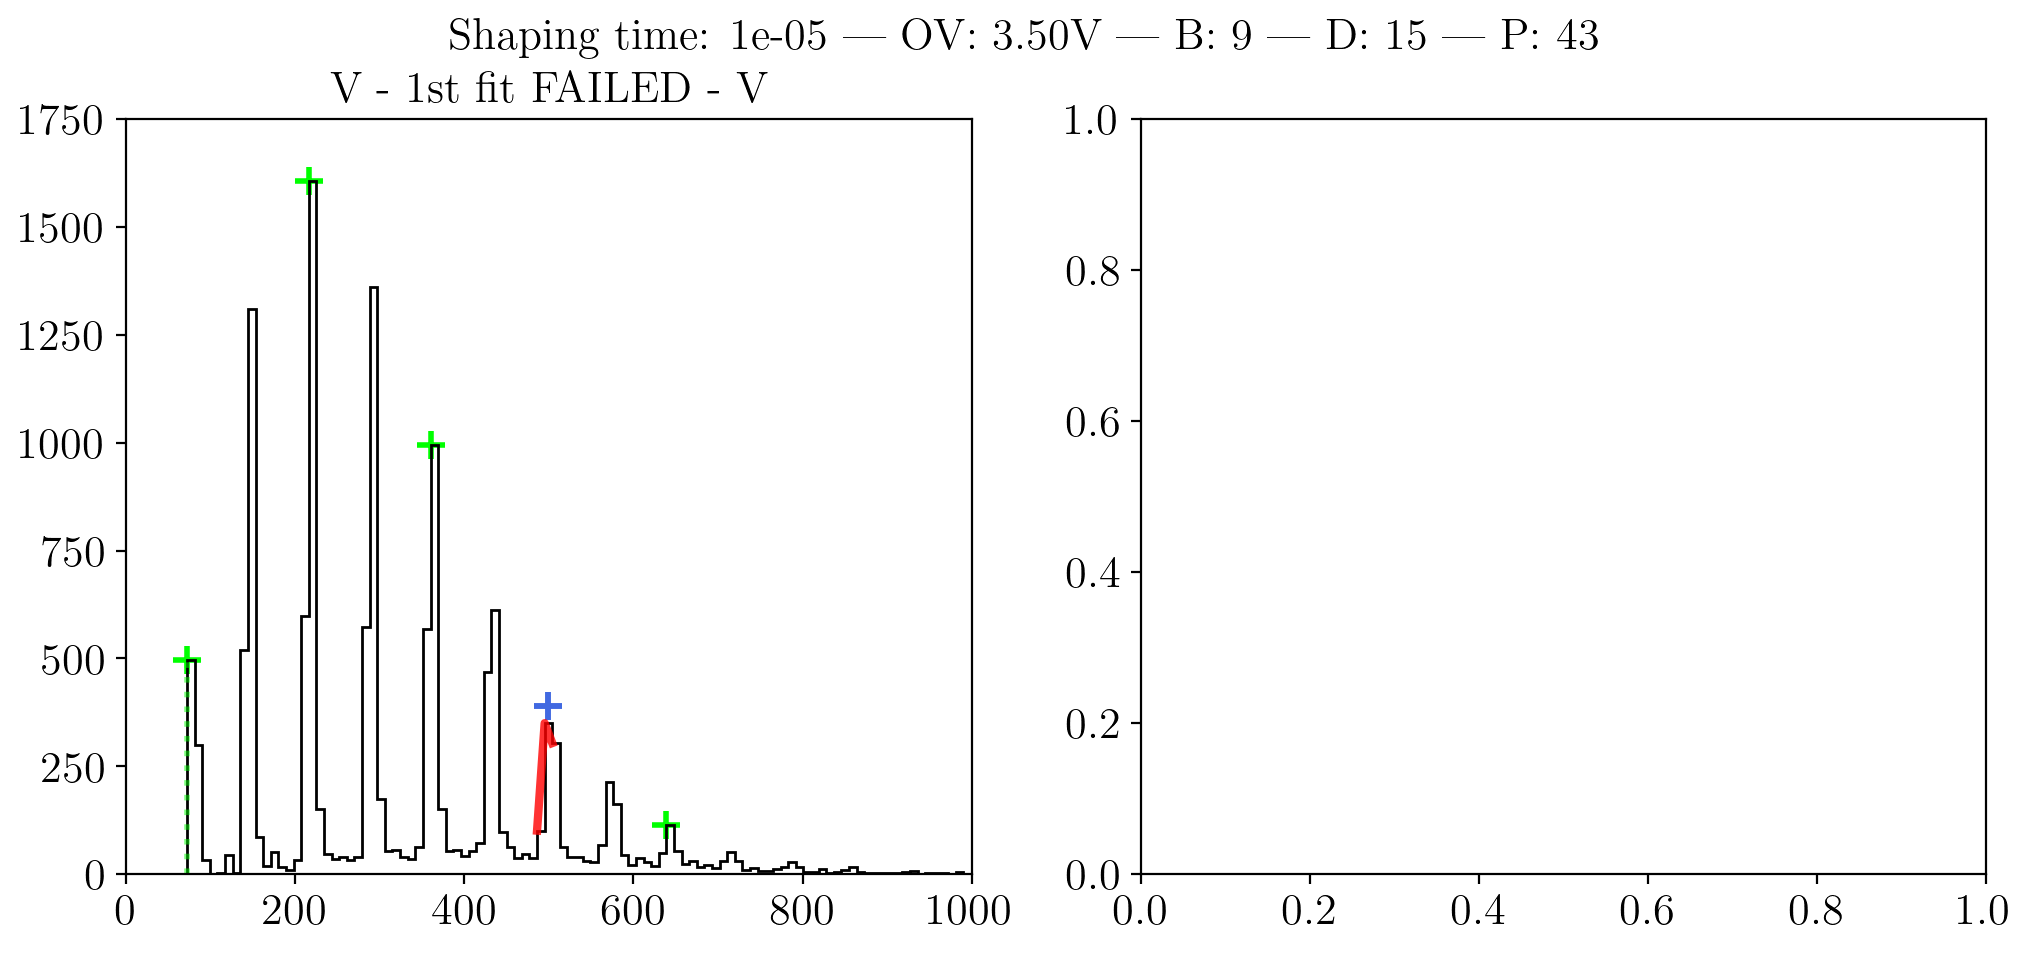

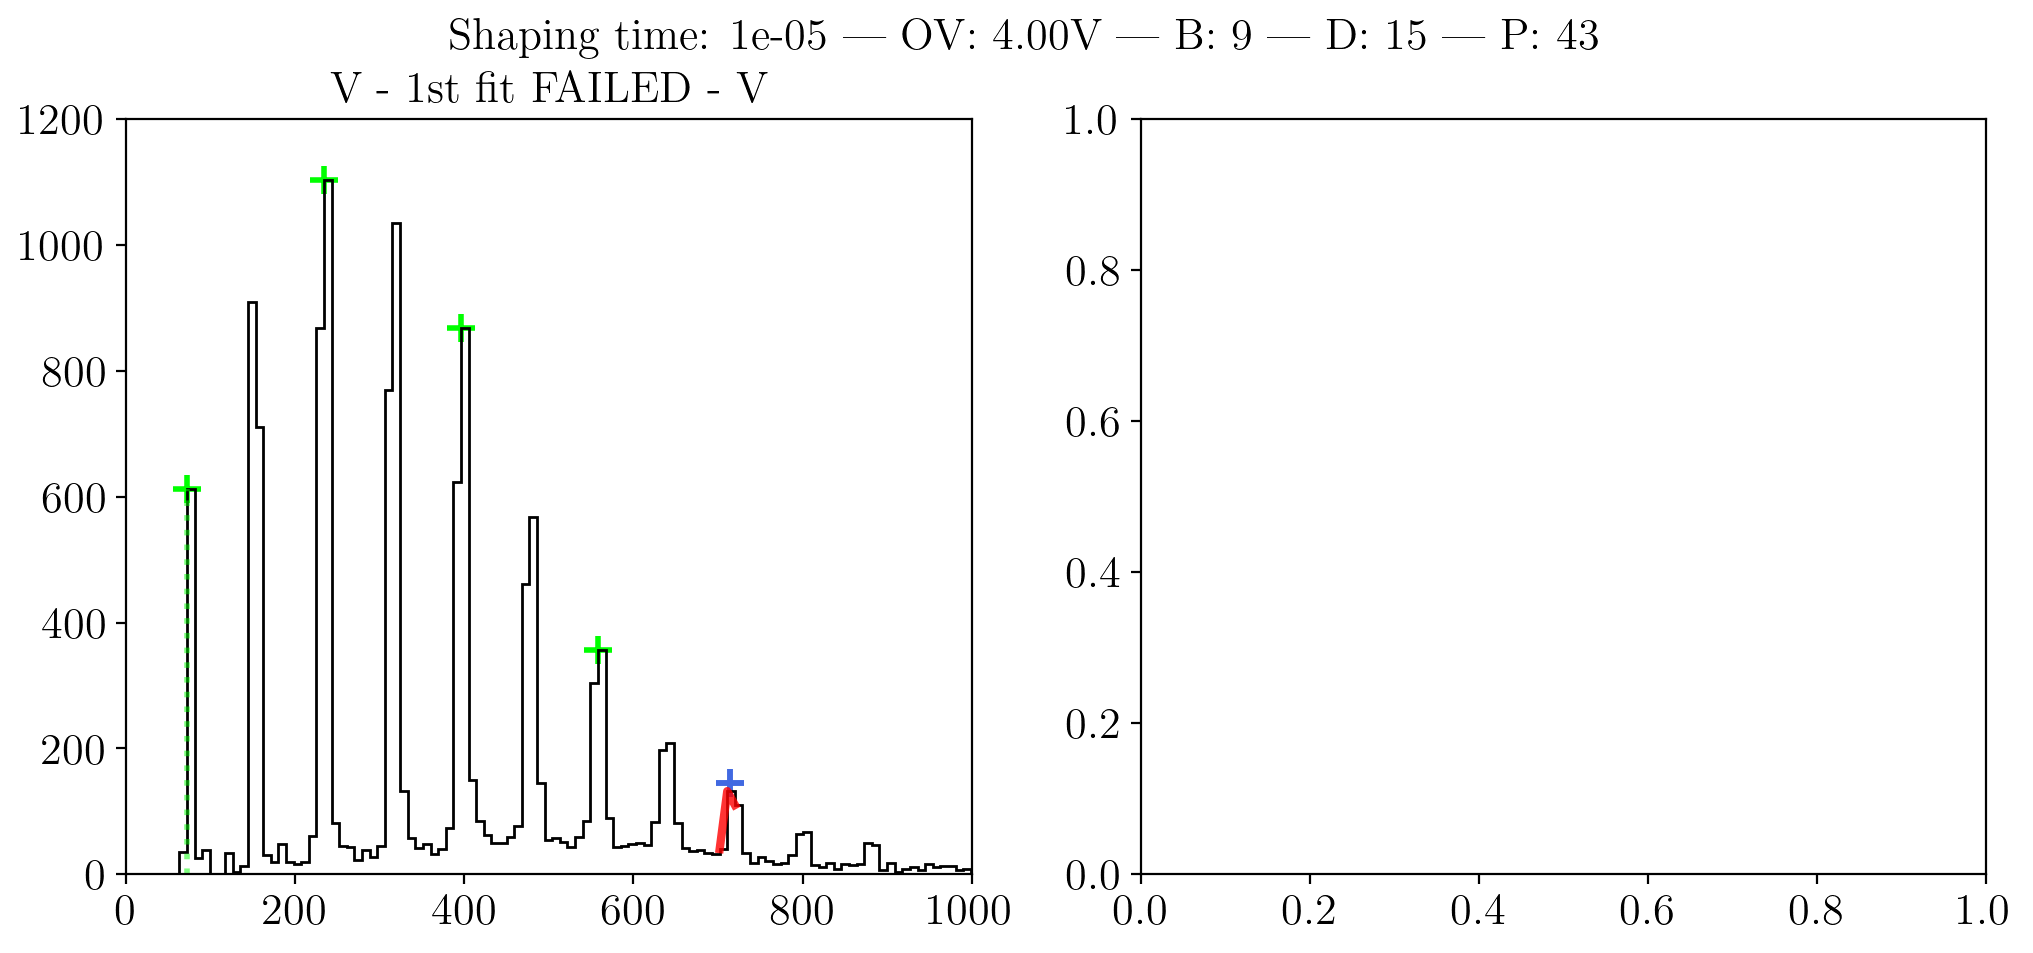

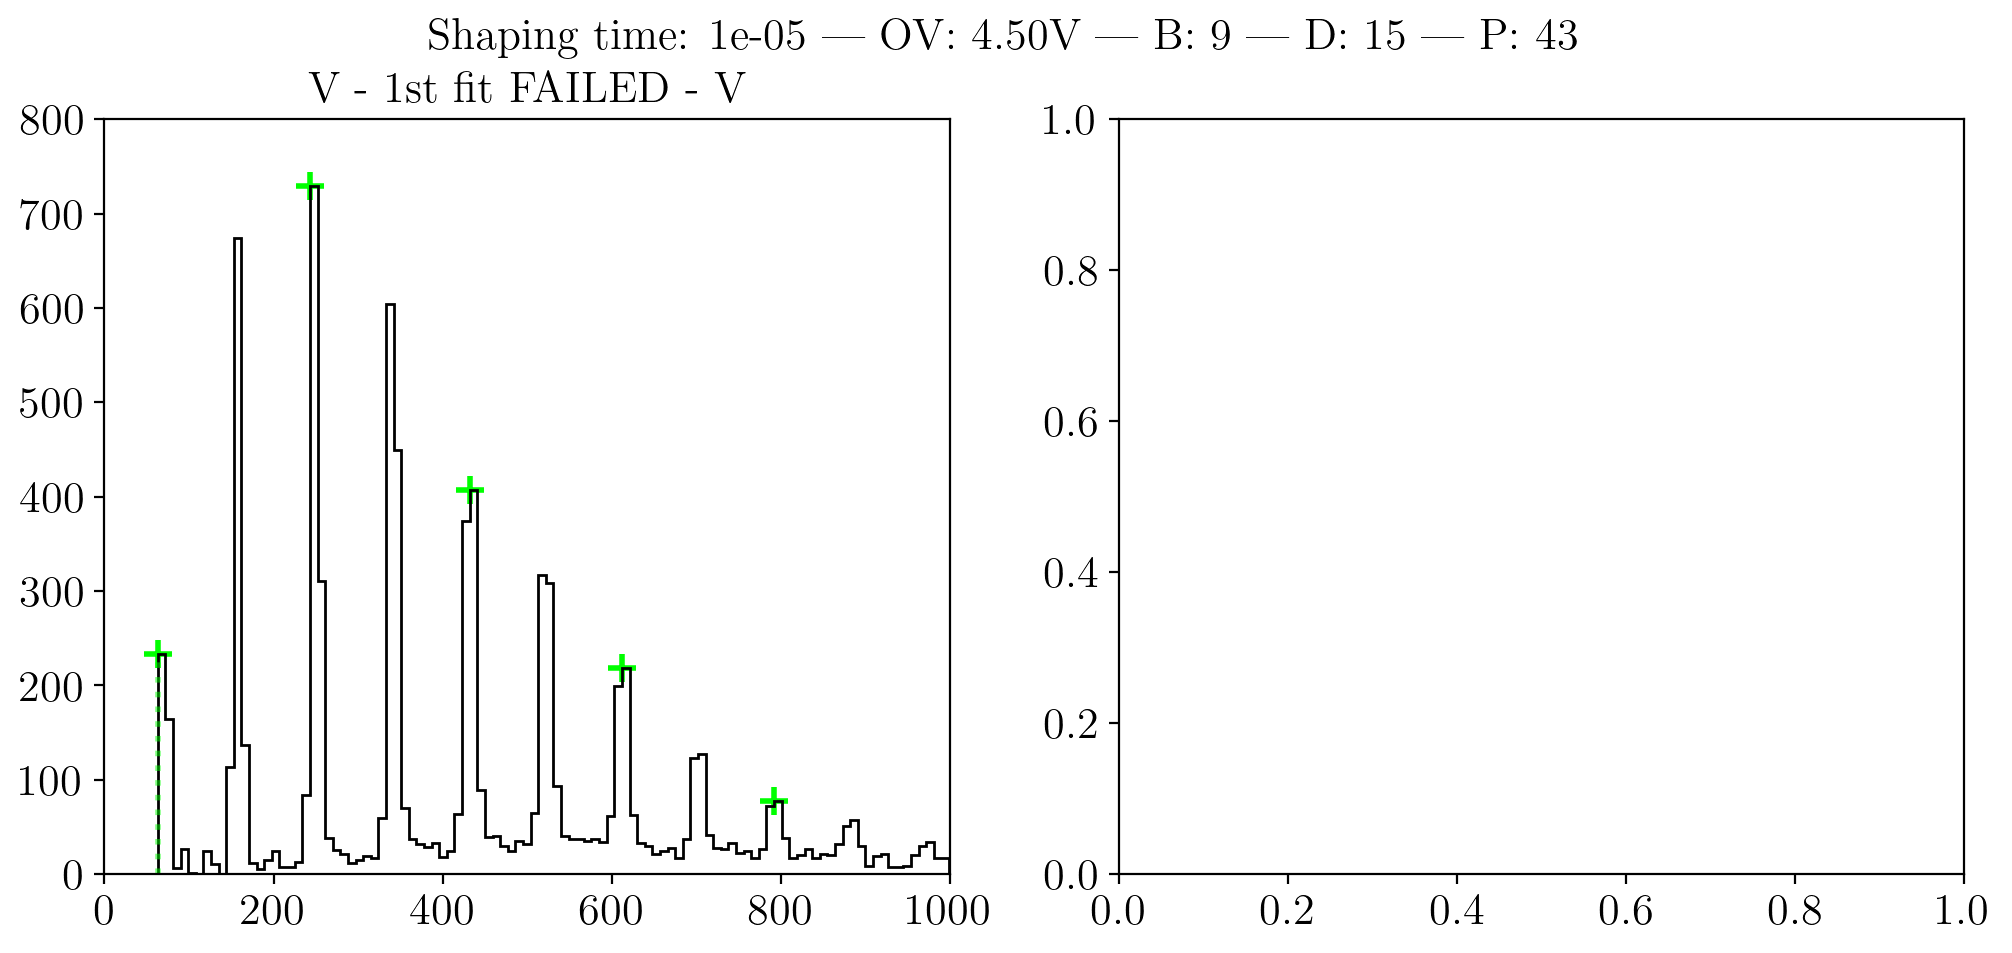

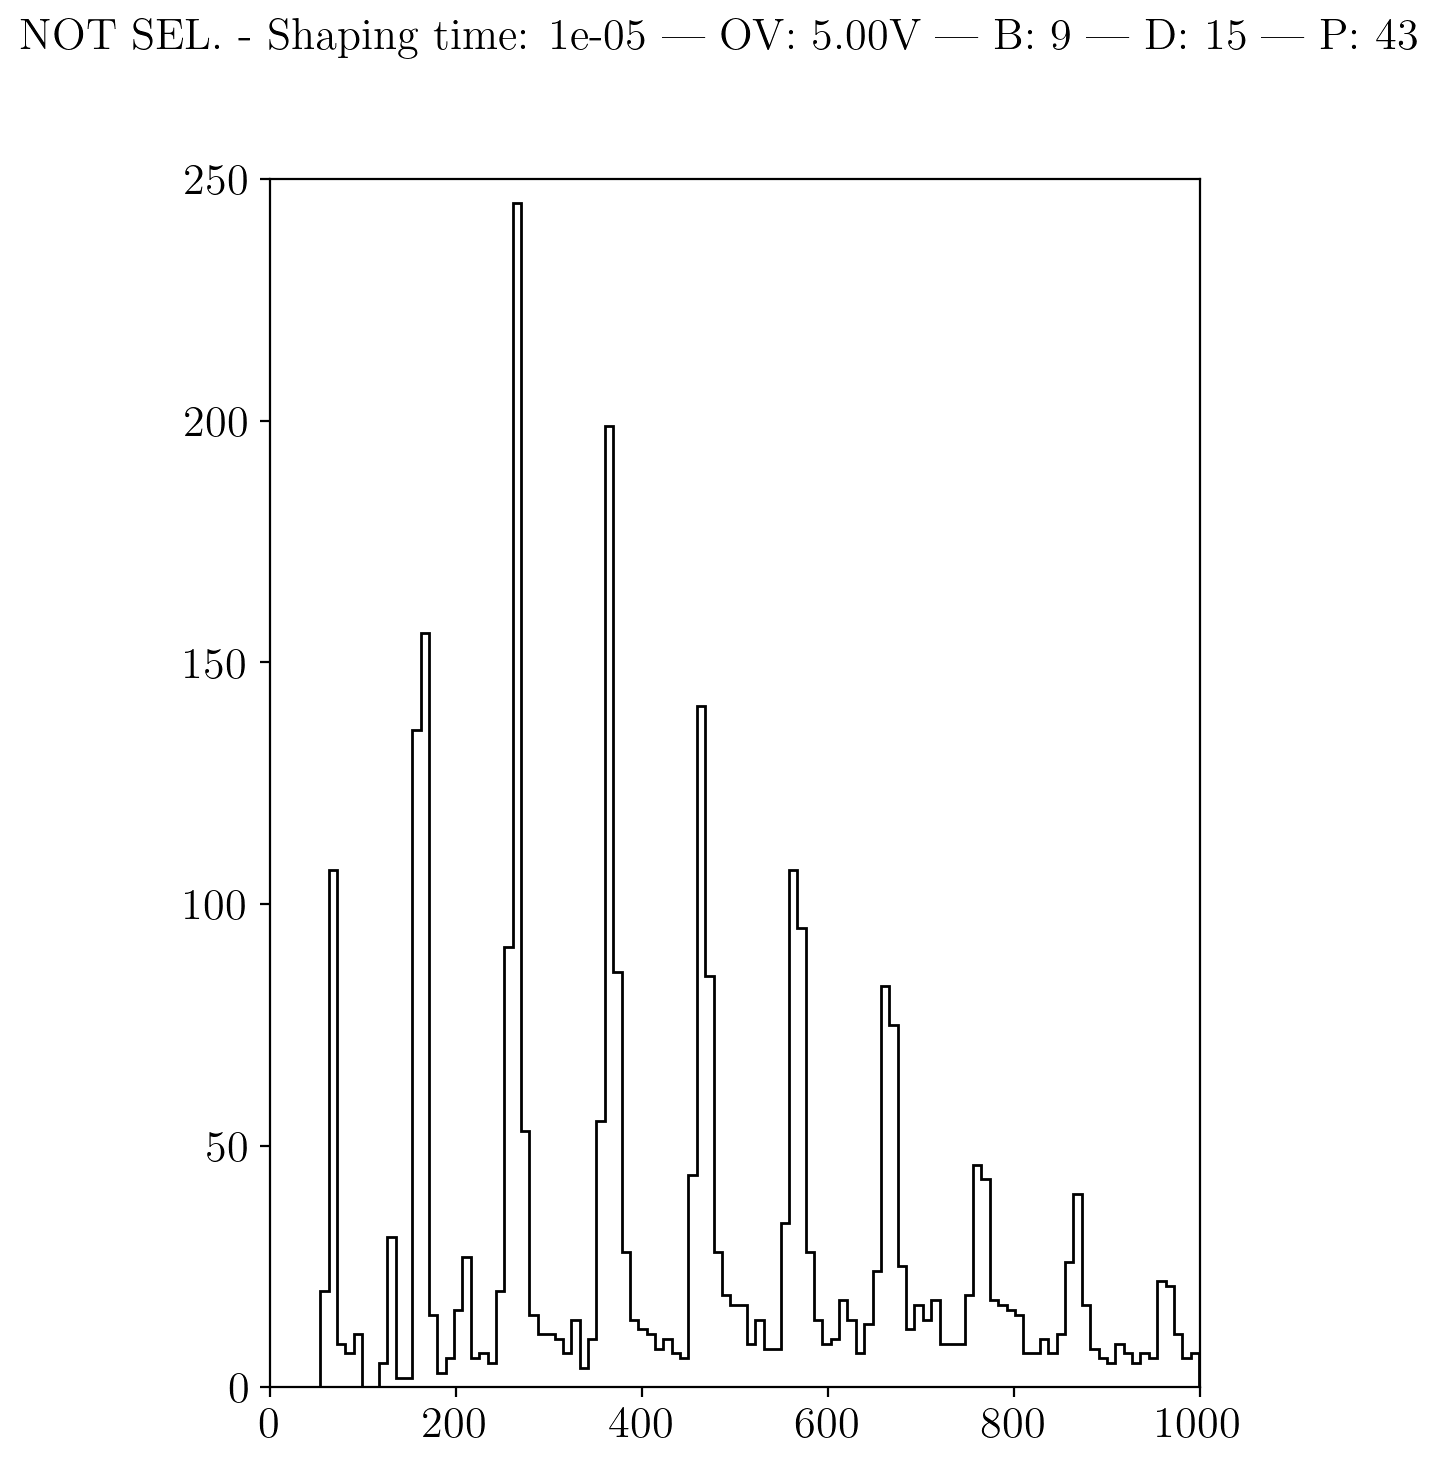

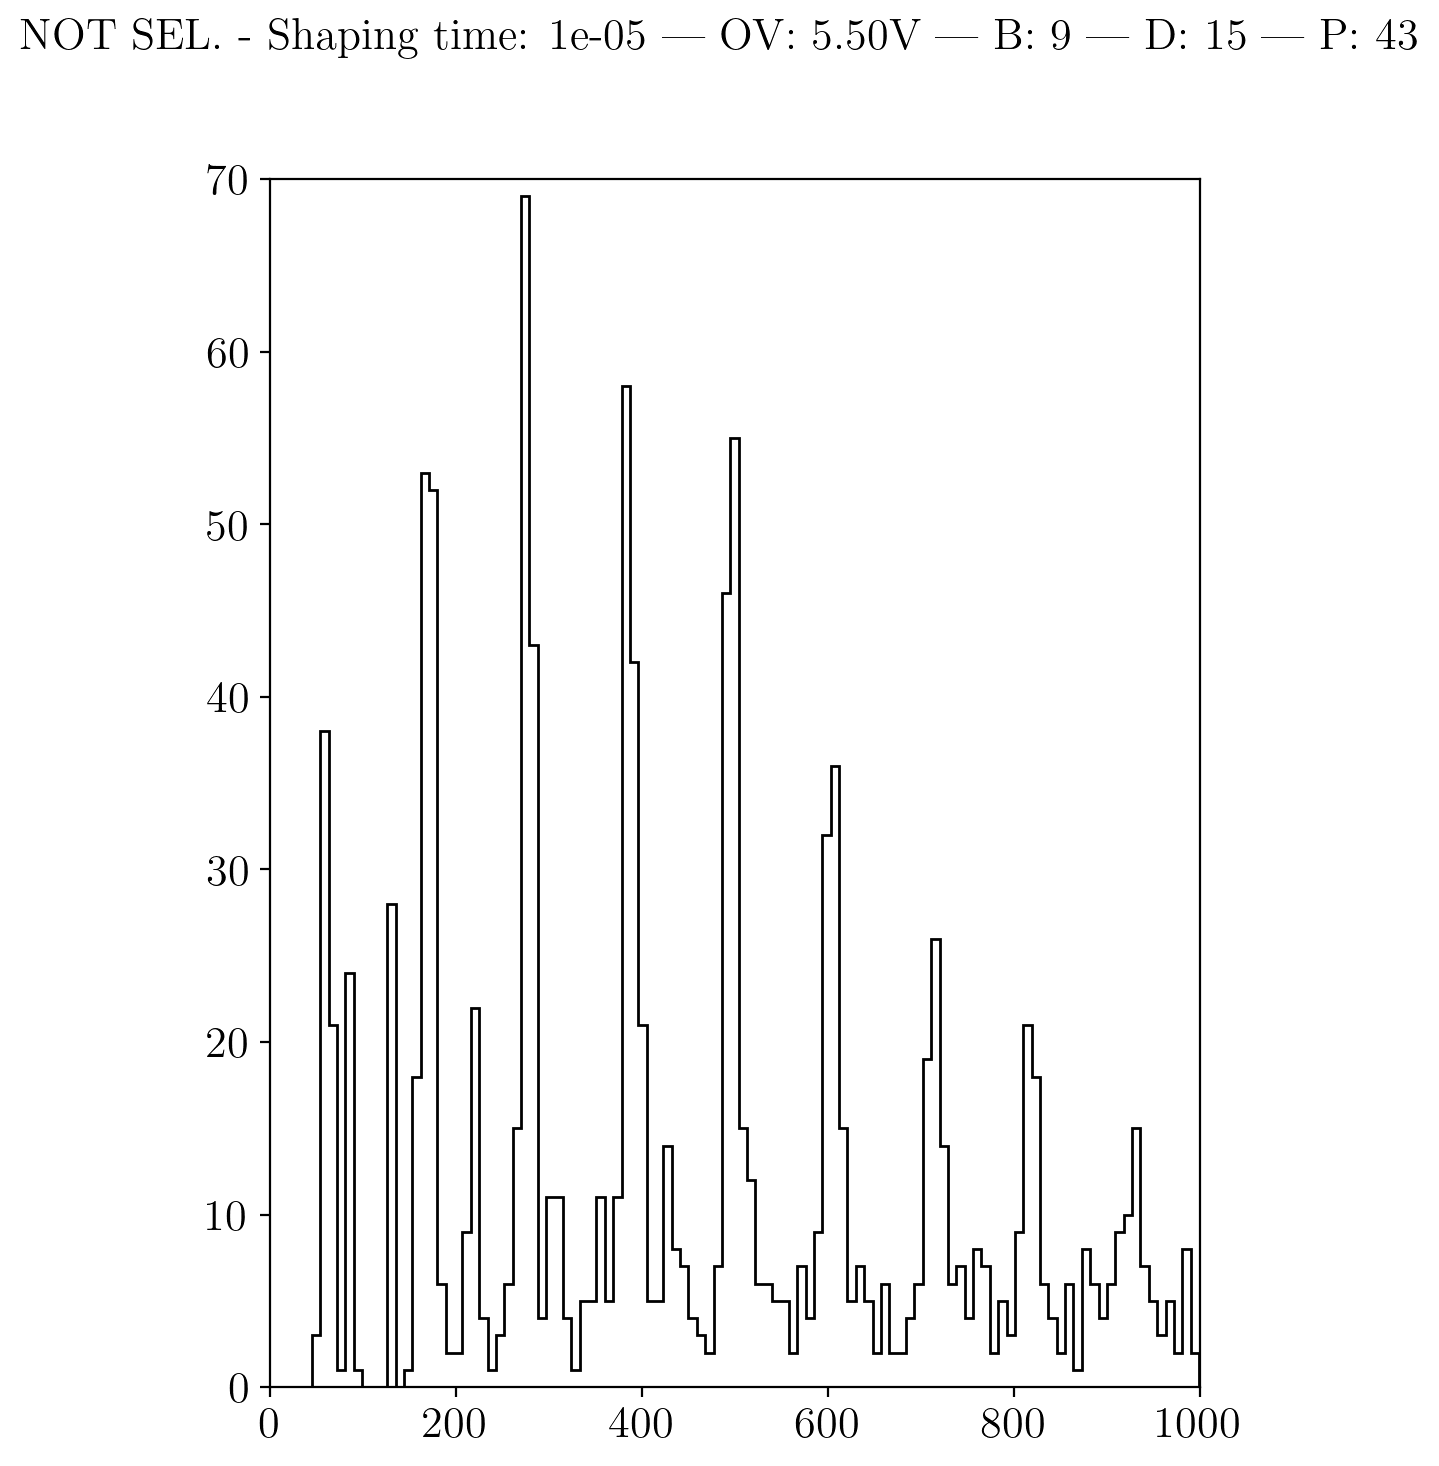

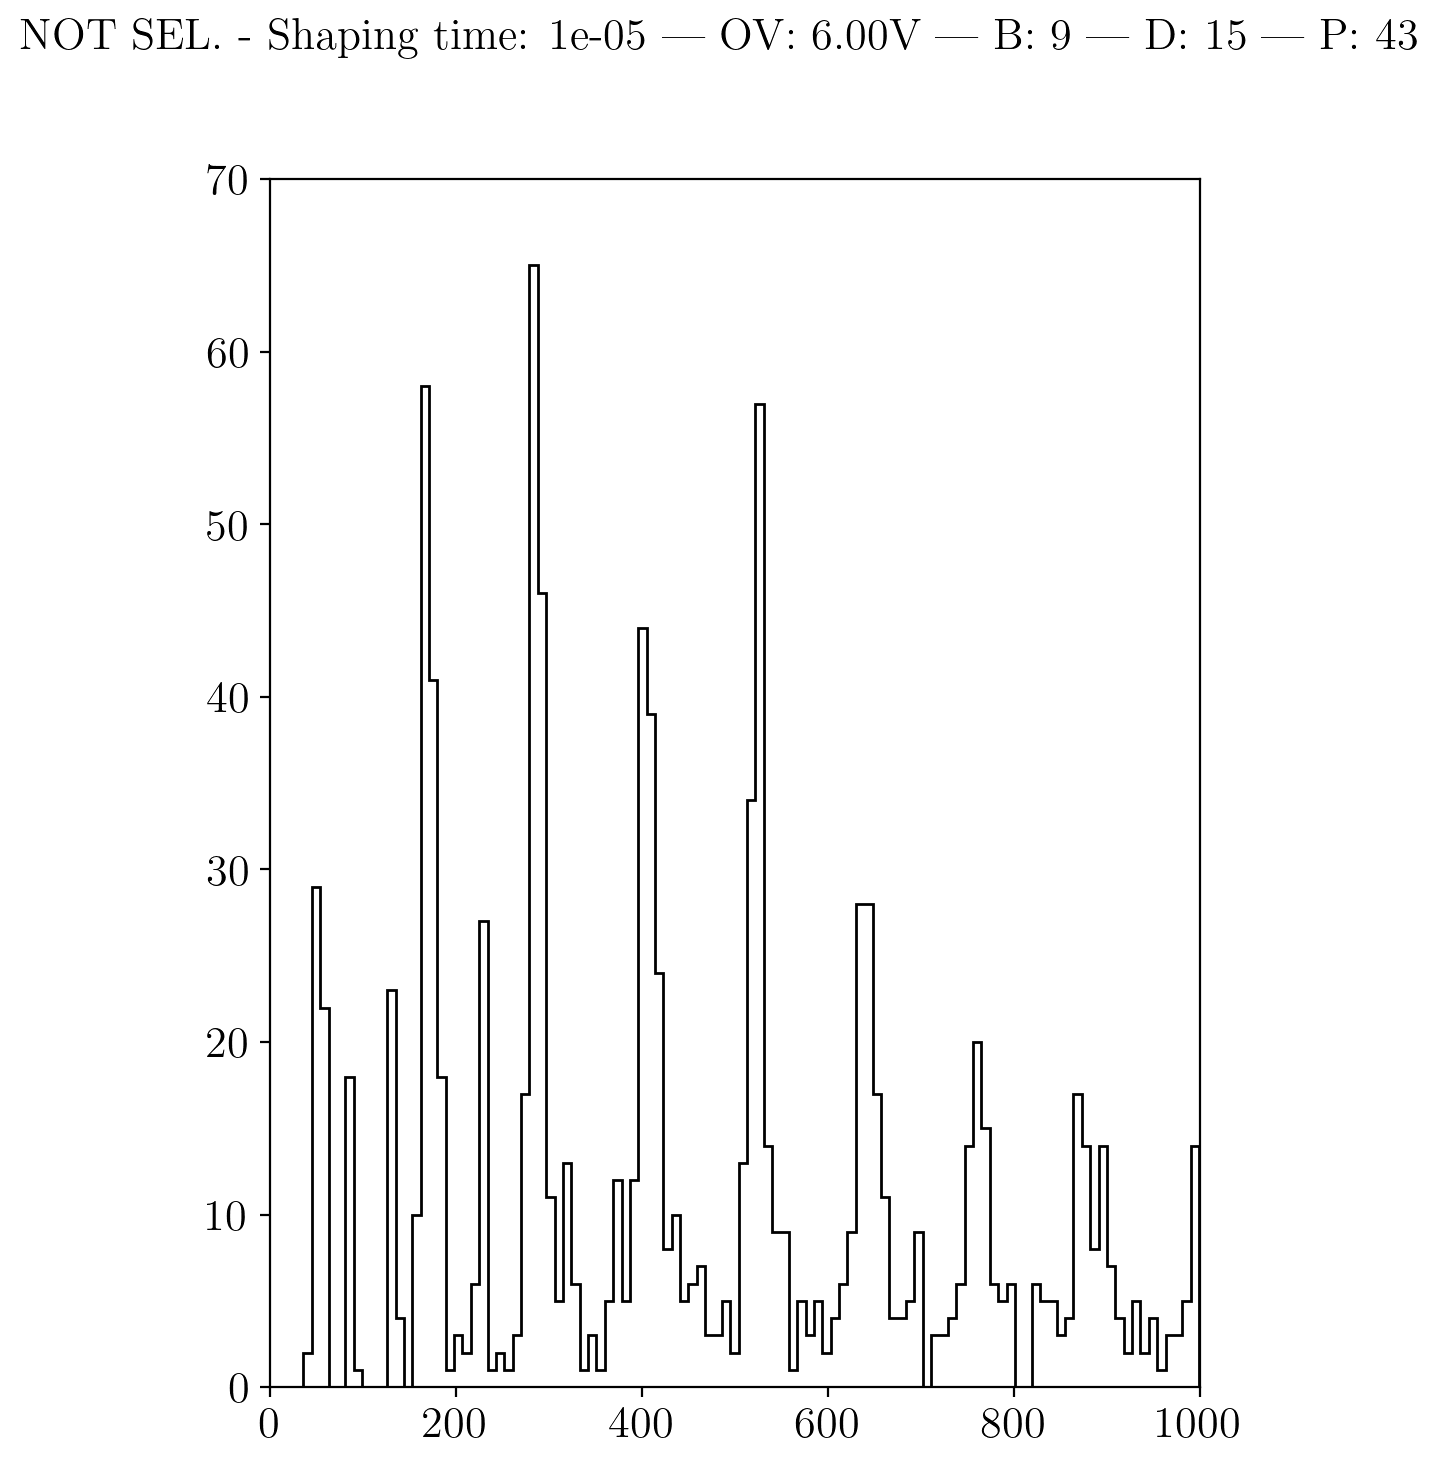

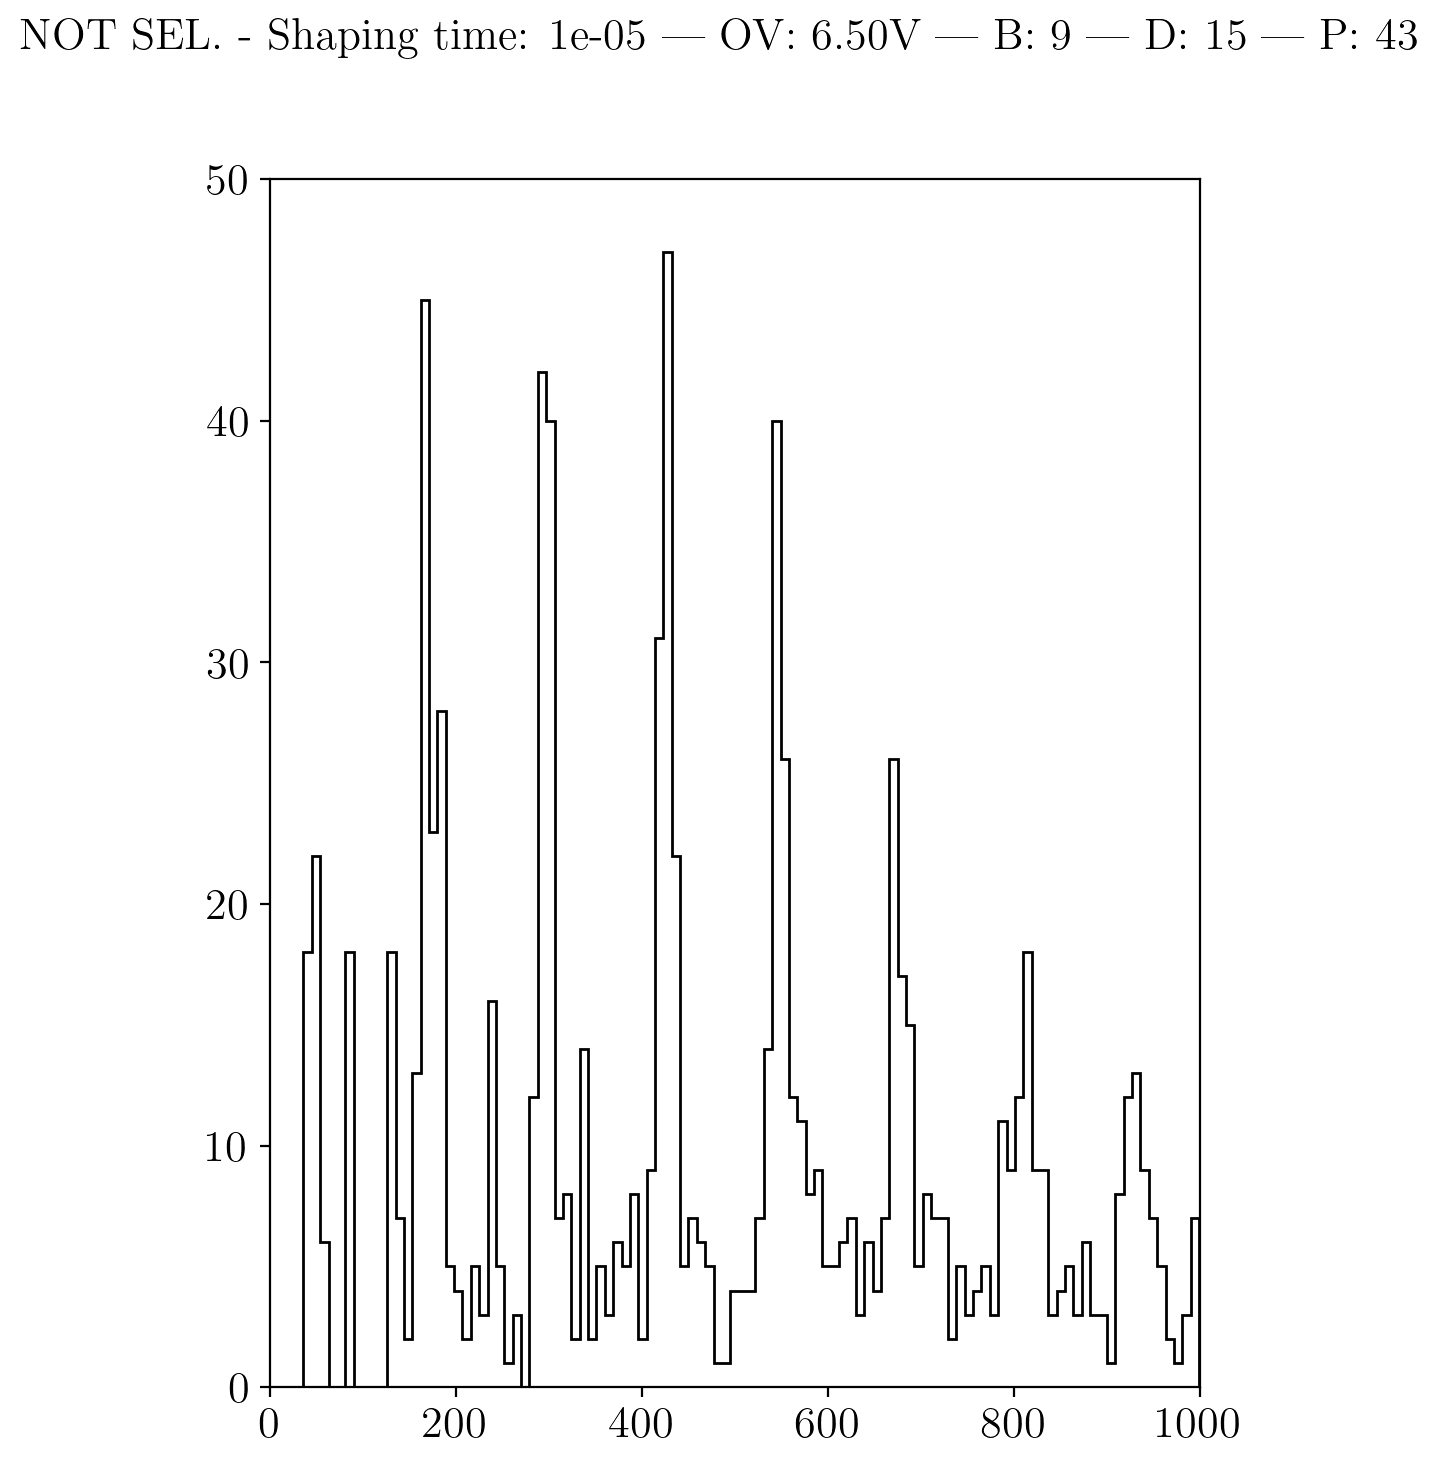

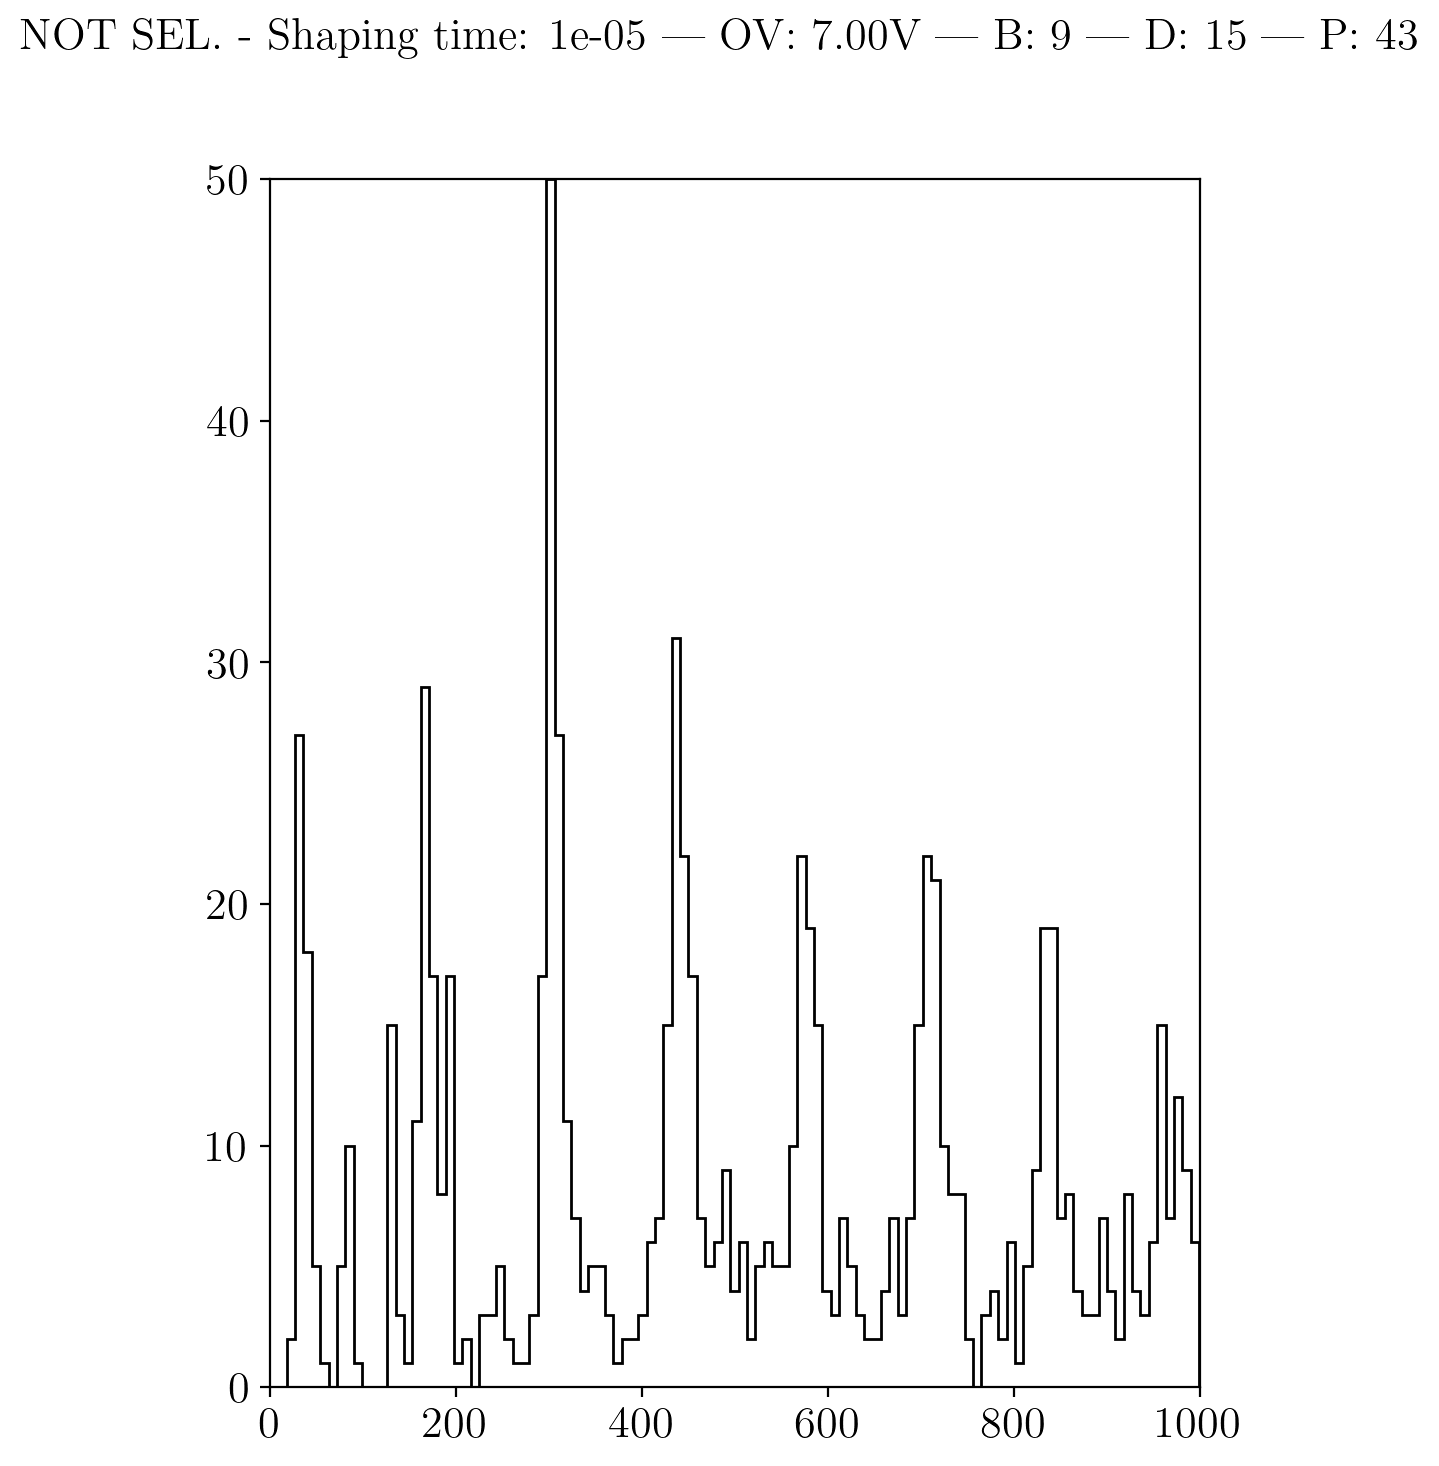

In [13]:
perms = []
#                               DISTANCE         \  PROMINENCE     \   BIN WIDTH
for i in itertools.product(np.arange(10,80,5),np.arange(8,100,5),np.arange(3,10,1)):
    perms.append([*i])
print(f'Testing {len(perms)} permutations\n')

from ipywidgets import IntProgress
from IPython.display import display

trials = {}

for sh_time in Ds[voltages[-1]].shaping_time: #ASSUMING SH_TIMES ARE THE SAME ACROSS DIFFERENT OV's

    f = IntProgress(value=0,min=0,max=len(perms),step=1,description=str(sh_time),bar_style='info',layout={"width": "100%"})
    display(f)

    done = 0
    var = []
    errs = []
    pks = []
    prom = []
    dist = []
    bins = []
    trials[sh_time] = {}


    for triplet in perms:
        f.value += 1
        start = datetime.now()

        tmp_err = 0
        tmp_pks = 0
        tmp_gain = []
        high = 0
        min_pks = 0
        for volt in voltages[3:]:
            x_vals = []
            y_vals = []
            peak_amps = v_data[volt]

            #print(f'({triplet})Getting ',volt,' for ',sh_time,' -> ',len(errs),end="\r")

            result = gain(peak_amps[sh_time],sh_time=sh_time,plot=False, prominence=triplet[1],distance=triplet[0],bin_w=triplet[2],lim=10)
            if result['err'] is None: continue
            if not result['pks'] is None:
                #if float(result['pks']) < 6: break
                if float(result['pks']) < min_pks: min_pks = float(result['pks'])
            if float(result['err']) > high: high = float(result['err'])
            #if float(result['err']) > 2.00: break
            tmp_err += float(result['err'])
            tmp_pks += float(result['pks'])
            tmp_gain.append(result['gain'][0])

        #trials[sh_time][str(triplet)] = {'err': errs, 'pks' : pks, 'gain' : tmp_gain}
        if min_pks < 5 and False: continue
        if tmp_pks < 45 and False:
            perms.remove(triplet)
            continue
        if high > 2.00 and False:
            perms.remove(triplet)
            continue
        else:
            errs.append(tmp_err)
            pks.append(tmp_pks)
            var.append(tmp_gain)        
            prom.append(triplet[1])
            dist.append(triplet[0])
            bins.append(triplet[2])
        if tmp_err == 0: continue
        trials[sh_time][str(triplet)] = {'err': tmp_err, 'pks' : tmp_pks, 'gain' : tmp_gain}
                    
        """ if len(errs) < 1:
            print('Skipping')
            continue """
        end = datetime.now()
        #print(f'\rTime to completion: {(end-start).total_seconds()*(len(peak_amps.keys())*len(voltages)-done)} seconds',end='')
        done += 1      

    if len(errs) == 0:
        print(f'Skipping {sh_time} due to insufficient data')
        continue
    
    for ii in np.arange(0,len(pks)-1,1):
        pass#print(f'Peaks: {pks[ii]}    Err: {errs[ii]}  Gain: {var[ii]}    for ({perms[ii]})')
    smallest = np.argmin(errs)

    print(f'Smallest error ({errs[smallest]}) for g {var[smallest]} at {smallest} (P: {prom[smallest]}, D: {dist[smallest]}, B: {bins[smallest]}) for {pks[smallest]} pks')

    for volt in voltages[3:]:
        peak_amps = v_data[volt]
        gain(peak_amps[sh_time],sh_time=sh_time,plot=True, prominence=prom[smallest],distance=dist[smallest],bin_w=bins[smallest],lim=10)
    print()
    #print(f'{total} waveforms in total (unfiltered) from {files} files')

    #print('----------------------------------------------')
#print(trials)

In [16]:
def line(x,a,b):
    return a*(x-b)

    summarized_data = {}
    #plt.figure(figsize=(10,10))
for ii, sh_time in enumerate(peaks.keys()):
        pass#print(peaks[sh_time])
    
def final(sh_time):
    gain_temp = []
    err_temp = []
    x_data = []
    for volt in peaks[sh_time].keys():
        opt = float(peaks[sh_time][volt]['popt'])
        err = peaks[sh_time][volt]['perr']
        if err < 1e-08:
            err = 1e-08
            print(f'{ANSI_CYAN}[{float(volt)+27.5}V|{sh_time}]:{ANSI_YELLOW} Gain {opt} --> !NOTE:  Error is too small --> replacing {peaks[sh_time][volt]["perr"]} with {err}{ANSI_RESET}') 
        else: print(f'{ANSI_CYAN}[{float(volt)+27.5}V|{sh_time}]:{ANSI_RESET} Gain {opt}, Err {err} added to the array{ANSI_RESET}')        

        gain_temp.append(opt)
        err_temp.append(err)
        x_data.append(27.5+float(volt))

    volts = [float(x) + 27.5 for x in np.array([*peaks[sh_time].keys()])]
    # x_data=np.arange(np.min(volts),np.max(volts)+0.1,0.5)
    plt.xlim(np.min(volts)-0.2,np.max(volts)+0.2)

    plt.errorbar(volts,gain_temp,yerr=err_temp,label=str(sh_time)+' Data',fmt='o',ms=5,color='red')
    popt_0,pcov_0=curve_fit(line,x_data,gain_temp,p0=[31,27],sigma=err_temp)
    if pcov_0[0][0] == np.inf: print(f'{ANSI_RED} ---- COVARIANCE ERROR ---- {ANSI_RESET}')
    label = str(sh_time)+' - BV= '+str(np.round(popt_0[1],2))+ '$\pm$'+ str(np.round(np.sqrt(np.diag(pcov_0)[1]),2))+' V'
    plt.plot(x_data, line(volts,*popt_0), color=colors[-ii], ls='--', label=label)

    popt_4,pcov_4=curve_fit(line,x_data[:3],gain_temp[:3],p0=[31,27],sigma=err_temp[:3])
    if pcov_4[0][0] == np.inf: print(f'{ANSI_RED} ---- COVARIANCE ERROR ---- {ANSI_RESET}')
    label = str(sh_time)+' - BV(:4)= '+str(np.round(popt_4[1],2))+ '$\pm$'+ str(np.round(np.sqrt(np.diag(pcov_4)[1]),2))+' V'
    plt.plot(x_data, line(volts,*popt_4), color=colors[-ii-1], ls='dotted', label=label)

    # plt.plot(x_data,line(x_data,*popt_260),color=colors[1],label='BV= '+str(np.round(popt_260[1],2))+ '$\pm$'+ str(np.round(np.sqrt(np.diag(pcov_260)[1]),2))+' V',ls='--')
    #plt.ylabel('Gain (ADC/PE)')
    plt.xlabel('Bias Voltage (V)')
    plt.legend(loc=2)
    plt.title(f'Shaping time: {sh_time}')
    plt.show()
#plt.legend(loc=2)
#plt.show()
    return np.sqrt(np.diag(pcov_0)[1])

{}


In [33]:
for sh_time in trials.keys():
    prominence_arr = []
    err_arr = []
    pks_arr = [] 
    for triplet_string in trials[sh_time].keys():
        #print(triplet_string)
        #print(float(triplet_string.split(',')[-1][:-1]))
        prominence_arr.append(float(triplet_string.split(',')[-1][:-1]))
        err_arr.append(trials[sh_time][triplet_string]['err'])
        pks_arr.append(trials[sh_time][triplet_string]['pks'])

    plt.figure(figsize=(10,10))

    plt.scatter(prominence_arr,err_arr)
    plt.ylim(0,2)

    plt.title(sh_time)
    plt.close()
    

[31.0V|2e-06]: Gain 68.53737636876755, Err 0.09601941422915797 added to the array
[31.5V|2e-06]: Gain 78.47263689759036, Err 0.09836177286716882 added to the array
[32.0V|2e-06]: Gain 86.81754954200797, Err 0.087164264445806 added to the array
[32.5V|2e-06]: Gain 96.7685467757641, Err 0.17445988617440536 added to the array
[33.0V|2e-06]: Gain 105.31299170814239, Err 0.24657335215235732 added to the array
[33.5V|2e-06]: Gain 114.50304439702383, Err 0.2633092434943622 added to the array
[34.0V|2e-06]: Gain 123.04137841977524, Err 0.7451739900998227 added to the array
[34.5V|2e-06]: Gain 130.65432937469586, Err 0.48459975494248253 added to the array


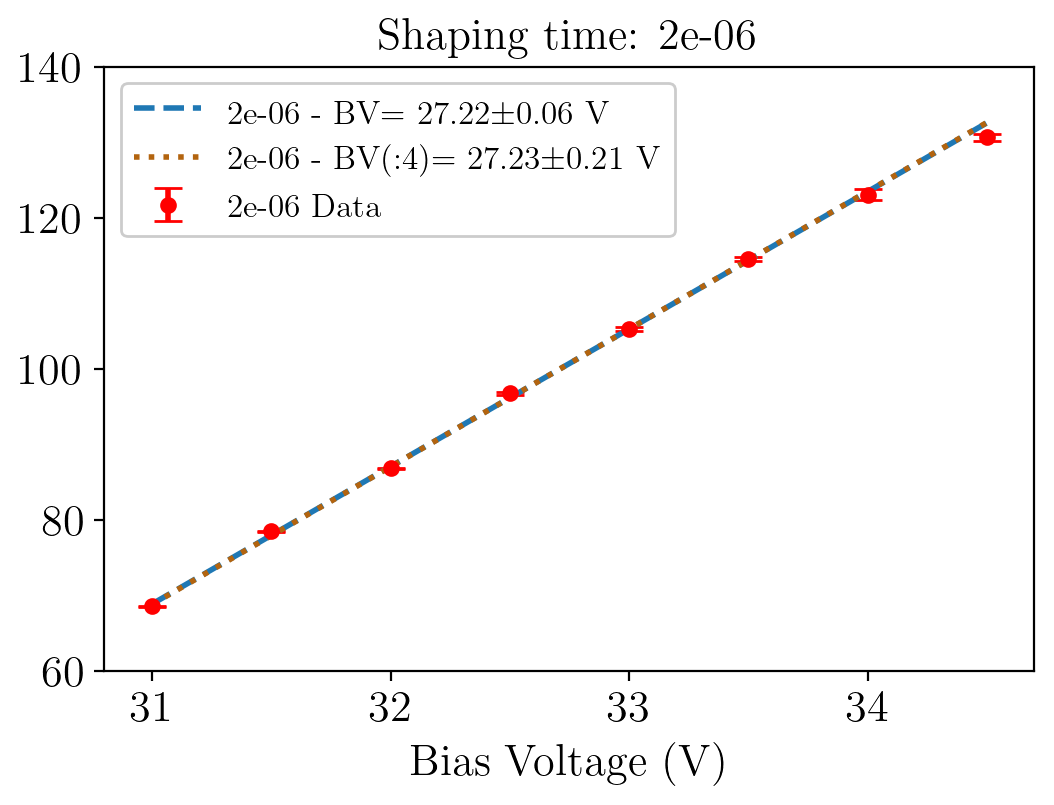

[31.0V|5e-06]: Gain 71.41843783085753, Err 0.14386973152093138 added to the array
[31.5V|5e-06]: Gain 81.4096980856011, Err 0.1133857353277708 added to the array
[32.0V|5e-06]: Gain 90.03355212834205, Err 0.11461943003646007 added to the array
[32.5V|5e-06]: Gain 100.91221503360875, Err 0.2792453812551976 added to the array
[33.0V|5e-06]: Gain 109.68799084470831, Err 0.40523509447295974 added to the array
[33.5V|5e-06]: Gain 119.59279621177612, Err 0.2737551590691732 added to the array
[34.0V|5e-06]: Gain 129.44617583873898, Err 0.9698701194966429 added to the array
[34.5V|5e-06]: Gain 136.9714379831963, Err 0.9869966101295898 added to the array


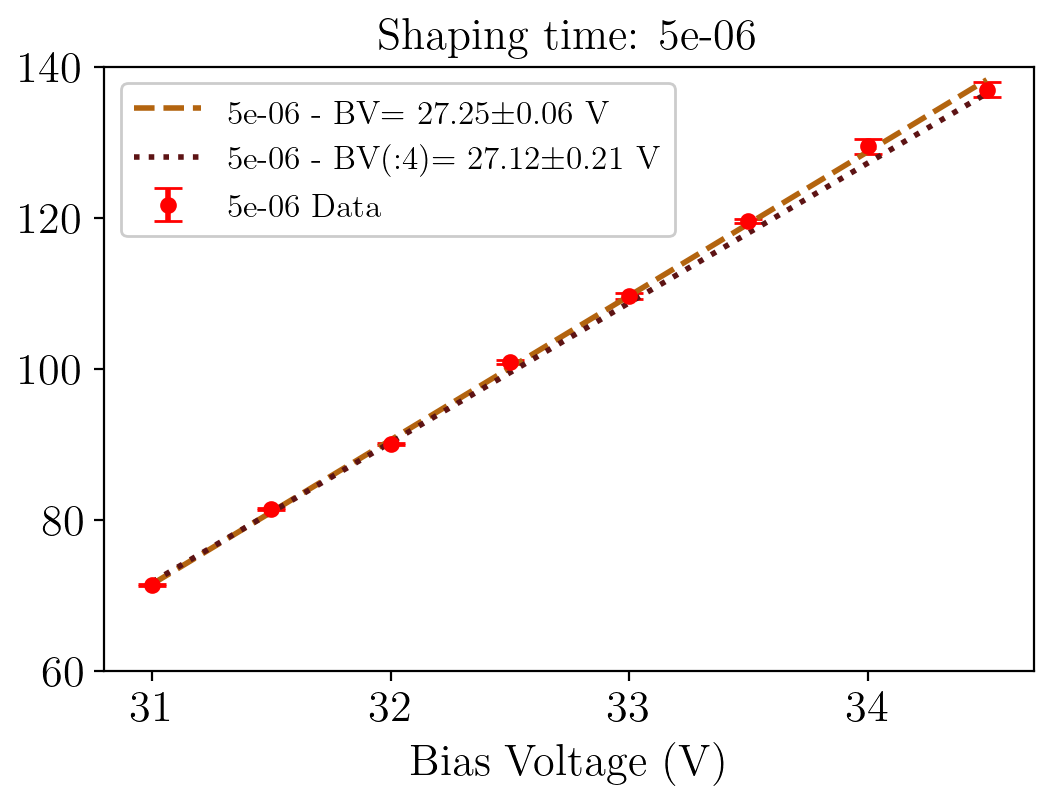

[31.0V|1e-05]: Gain 71.14590845087604, Err 0.08742466185349711 added to the array
[31.5V|1e-05]: Gain 80.8956648279527, Err 0.09885022136587124 added to the array
[32.0V|1e-05]: Gain 90.35845531394813, Err 0.1207560414678543 added to the array
[32.5V|1e-05]: Gain 100.00808382934217, Err 0.14533477524200128 added to the array
[33.0V|1e-05]: Gain 108.77489321402379, Err 0.260376668643163 added to the array
[33.5V|1e-05]: Gain 118.26588473010185, Err 0.2553048553958643 added to the array
[34.0V|1e-05]: Gain 126.82397346071016, Err 0.5729450683619134 added to the array
[34.5V|1e-05]: Gain 135.47944950098034, Err 0.3777559742538226 added to the array


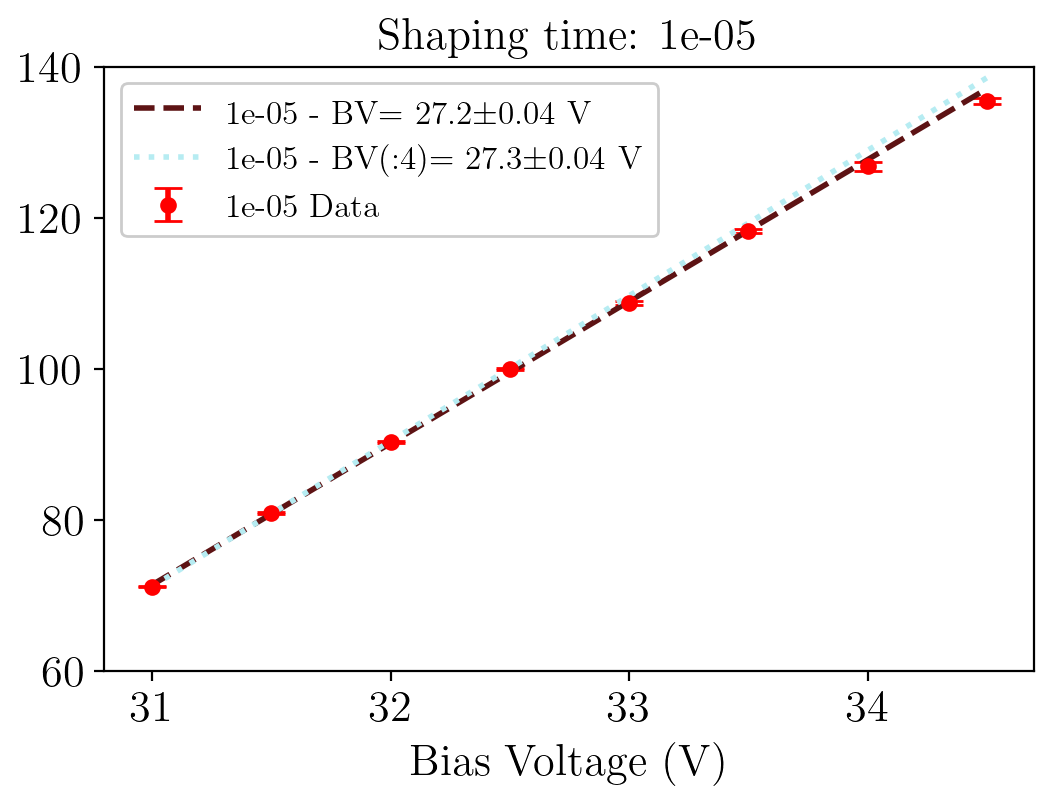

In [ ]:
def line(x,a,b):
    return a*(x-b)

    summarized_data = {}
    #plt.figure(figsize=(10,10))
for ii, sh_time in enumerate(peaks.keys()):
        pass#print(peaks[sh_time])
    
def final():
    gain_temp = []
    err_temp = []
    x_data = []
    for volt in peaks[sh_time].keys():
        opt = float(peaks[sh_time][volt]['popt'])
        err = peaks[sh_time][volt]['perr']
        if err < 1e-08:
            err = 1e-08
            print(f'{ANSI_CYAN}[{float(volt)+27.5}V|{sh_time}]:{ANSI_YELLOW} Gain {opt} --> !NOTE:  Error is too small --> replacing {peaks[sh_time][volt]["perr"]} with {err}{ANSI_RESET}') 
        else: print(f'{ANSI_CYAN}[{float(volt)+27.5}V|{sh_time}]:{ANSI_RESET} Gain {opt}, Err {err} added to the array{ANSI_RESET}')        

        gain_temp.append(opt)
        err_temp.append(err)
        x_data.append(27.5+float(volt))

    volts = [float(x) + 27.5 for x in np.array([*peaks[sh_time].keys()])]
    # x_data=np.arange(np.min(volts),np.max(volts)+0.1,0.5)
    plt.xlim(np.min(volts)-0.2,np.max(volts)+0.2)

    plt.errorbar(volts,gain_temp,yerr=err_temp,label=str(sh_time)+' Data',fmt='o',ms=5,color='red')
    popt_0,pcov_0=curve_fit(line,x_data,gain_temp,p0=[31,27],sigma=err_temp)
    if pcov_0[0][0] == np.inf: print(f'{ANSI_RED} ---- COVARIANCE ERROR ---- {ANSI_RESET}')
    label = str(sh_time)+' - BV= '+str(np.round(popt_0[1],2))+ '$\pm$'+ str(np.round(np.sqrt(np.diag(pcov_0)[1]),2))+' V'
    plt.plot(x_data, line(volts,*popt_0), color=colors[-ii], ls='--', label=label)

    popt_4,pcov_4=curve_fit(line,x_data[:3],gain_temp[:3],p0=[31,27],sigma=err_temp[:3])
    if pcov_4[0][0] == np.inf: print(f'{ANSI_RED} ---- COVARIANCE ERROR ---- {ANSI_RESET}')
    label = str(sh_time)+' - BV(:4)= '+str(np.round(popt_4[1],2))+ '$\pm$'+ str(np.round(np.sqrt(np.diag(pcov_4)[1]),2))+' V'
    plt.plot(x_data, line(volts,*popt_4), color=colors[-ii-1], ls='dotted', label=label)

    # plt.plot(x_data,line(x_data,*popt_260),color=colors[1],label='BV= '+str(np.round(popt_260[1],2))+ '$\pm$'+ str(np.round(np.sqrt(np.diag(pcov_260)[1]),2))+' V',ls='--')
    #plt.ylabel('Gain (ADC/PE)')
    plt.xlabel('Bias Voltage (V)')
    plt.legend(loc=2)
    plt.title(f'Shaping time: {sh_time}')
    plt.show()
#plt.legend(loc=2)
#plt.show()
    return np.sqrt(np.diag(pcov_0)[1])

In [ ]:
sys.exit()
""" def line(x,a,b):
    return a*x+b """

' def line(x,a,b):\n    return a*x+b '

In [ ]:
""" plt.figure()
plt.xlim(np.min(voltages.astype(float)), np.max(voltages.astype(float)))
plt.xlabel('Overvoltage [V]')
plt.ylabel('Max Amplitude [mV]')

ys = {}
ys[0] = []
ys[1] = []

for volt in voltages.astype(str): 
    markers = ['o', 'X']
    for i,ch in enumerate(Ds[volt].Ch):
        x = [float(volt)]*len(ch.Max)
        y = ch.Max
        ys[i].append(y[0])
        plt.scatter(x,y, marker=markers[i], color=colors[i], s=5)

xval = np.array([float(x) for x in voltages])
popt1,pcov1 = curve_fit(line, xval, np.array(ys[0]))      
popt2,pcov2 = curve_fit(line, xval, np.array(ys[1]))      

plt.plot(xval, line(xval,*popt1), label='Unfiltered')
plt.plot(xval, line(xval,*popt2), label='Filtered')
plt.legend(loc='upper left')
plt.show()  """

" plt.figure()\nplt.xlim(np.min(voltages.astype(float)), np.max(voltages.astype(float)))\nplt.xlabel('Overvoltage [V]')\nplt.ylabel('Max Amplitude [mV]')\n\nys = {}\nys[0] = []\nys[1] = []\n\nfor volt in voltages.astype(str): \n    markers = ['o', 'X']\n    for i,ch in enumerate(Ds[volt].Ch):\n        x = [float(volt)]*len(ch.Max)\n        y = ch.Max\n        ys[i].append(y[0])\n        plt.scatter(x,y, marker=markers[i], color=colors[i], s=5)\n\nxval = np.array([float(x) for x in voltages])\npopt1,pcov1 = curve_fit(line, xval, np.array(ys[0]))      \npopt2,pcov2 = curve_fit(line, xval, np.array(ys[1]))      \n\nplt.plot(xval, line(xval,*popt1), label='Unfiltered')\nplt.plot(xval, line(xval,*popt2), label='Filtered')\nplt.legend(loc='upper left')\nplt.show()  "

In [ ]:
""" plt.figure() 
plt.xlim(0,400)
plt.xlabel('Time [$\mu$s]')
plt.ylabel('Amplitude [mV]')
for volt in voltages: 
    markers = ['o', 'x']
    for i,ch in enumerate(Ds[volt].Ch[1:]):
        plt.plot(ch.Time, np.mean(ch.Amp, axis=0), label='{}V'.format(volt))
plt.legend(loc='upper left', ncol=1)
plt.show()  """

" plt.figure() \nplt.xlim(0,400)\nplt.xlabel('Time [$\\mu$s]')\nplt.ylabel('Amplitude [mV]')\nfor volt in voltages: \n    markers = ['o', 'x']\n    for i,ch in enumerate(Ds[volt].Ch[1:]):\n        plt.plot(ch.Time, np.mean(ch.Amp, axis=0), label='{}V'.format(volt))\nplt.legend(loc='upper left', ncol=1)\nplt.show()  "

In [ ]:
def gauss(x,a,mu,sigma):
    return (a*np.exp(-0.5*((x-mu)/sigma)**2))

In [ ]:
def gain_calculator(PATH):
    BINS=20 #Number of bins to rebin the MCA data with
    N_peaks= 4# Number o peaks to use for calculating the gain
    gain_list=[] #empty list to fill in the values of gain, returned at the end of this function
    gain_err=[] #empty list to fill in the values of gain fit error, returned at the end of this function
    Files = glob.glob(PATH+'mca_*.h5')
    #for loop to loop over all the files
    for i,file in enumerate(natsorted(Files)): 
        print(i,file)
        f = h5py.File(file, 'r')  
        ch2 = f.get('ch2')
        for key in ch2.keys():
            df = np.array(ch2.get(key))
        h = df
        hx = np.arange(0,len(h),1)
        hx,h = rebin(hx,h, BINS)

        gain_temp=[]#reset the gain temp list here to store gain values for one file
        gain_temp_err=[]#reset the gain temp list here to store gain values for one file
        #Use scipy find_peaks to find peaks starting with a very high prominence 
        PROMINENCE=1000 #This prominence is re-set here to ensure that every file starts out with a high prominence
        peaks,pdict=find_peaks(h,prominence=PROMINENCE,width=50)
        peak_length=len(peaks)
        #We want to ensure that using a high prominence gives us at least 3 peaks to fit a straight line to. If it doesn't we reduce prominence till we get at least 3 peaks. N_peaks is set above
        while (peak_length<N_peaks+1):
            PROMINENCE=PROMINENCE-1
            peaks,pdict=find_peaks(h,prominence=PROMINENCE,width=10)
            peak_length=len(peaks)
        
        #To avoid fitting the pedestal, we ignore the first peak. In case the pedestal isn't there, then first peak gets ignored. This shouldn't change gain or BV calculation
        first_pe_max=hx[peaks[1]] # The x-value of the 2nd peak.Index=1 means the second peak will be used for getting fit parameters
        max_value=h[peaks[1]] # The height of the 2nd peak
        x_idx_array=(h<0.5*max_value) & (hx>first_pe_max)# returns a boolean array where both conditions are true
        right_side_x= hx[np.where(x_idx_array)[0][0]] #finding the first time where x_idx_array is True
        sigma_guess=np.abs(first_pe_max-right_side_x) #We need this to fit the width of the Gaussian peaks

        plt.figure(figsize=(12,5)) # Call the figure here
        plt.subplot(1,2,1) #This subplot will plot the position of the peaks and also the data
        plt.yscale('log')
        plt.plot(hx[peaks],h[peaks],'*') # plot the peak markers
        plt.step(hx,h,lw=1) #plot the signal
        cut= (hx < first_pe_max+sigma_guess) & (hx > first_pe_max-sigma_guess) # This cut helps to fix the width of the peak-fit
        popt,pcov=curve_fit(gauss,hx[cut],h[cut],p0=[max_value,first_pe_max,sigma_guess]) # We use curve_fit to return the optimal parameters and the covariance matrix
        plt.plot(hx[cut],gauss(hx[cut],*popt),color='green',label='Fit',lw=2,alpha=0.5) # Here we plot the fit on the 2nd peak to see if everything looks ok.
        for i,peak in enumerate(peaks[:]): #here we ignore the first peak because it could be the pedestal
            new_first_pe_max=hx[peak] #x-value of the peak
            new_max_value=h[peak] #height of the peak
            new_x_idx_array=(h<0.5*new_max_value) & (hx>new_first_pe_max) # returns a boolean array where both conditions are true
            new_right_side_x= hx[np.where(new_x_idx_array)[0][0]] #finding the first time where x_idx_array is True
            new_sigma_guess=np.abs(new_first_pe_max-new_right_side_x) #We need this to fit the width of the Gaussian peaks


            new_cut= (hx < new_first_pe_max+new_sigma_guess) & (hx > new_first_pe_max-new_sigma_guess) # This cut helps to fix the width of the peak-fit
            popt_new,pcov_new=curve_fit(gauss,hx[new_cut],h[new_cut],p0=[new_max_value,new_first_pe_max,new_sigma_guess],maxfev=100000) # We use curve_fit to return the optimal parameters and the covariance matrix
            plt.plot(hx[new_cut],gauss(hx[new_cut],*popt_new),color='r',label='Fit',lw=3) # Here we plot the fit on all the peaks
            gain_temp.append(popt_new[1]) #Here we append the value of the peak fit mean 
            perr = np.sqrt(np.diag(pcov_new))
            gain_temp_err.append(perr[1])
        print(gain_temp)
        print(np.diff(gain_temp))
        print(np.mean(np.diff(gain_temp)))

        plt.subplot(1,2,2) #This subplot shows the straight line fit to the peak means to obtain the slope/gain
        popt_temp,pcov_temp=curve_fit(line_gain,np.arange(0,len(peaks)),gain_temp,p0=[90,5],maxfev=10000) #Use the straight line fit here
        plt.plot(np.arange(0,len(peaks)),line_gain(np.arange(0,len(peaks)),*popt_temp),color='k',label=(str(np.round(popt_temp[0],2)))+'$\pm$'+str(np.round(np.sqrt(np.diag(pcov_temp))[0],2))+' ADC/PE') # plot the straight line fit
        

        plt.errorbar(np.arange(0,len(peaks)),gain_temp, yerr=gain_temp_err, capsize=5, color='r', marker='o', ms=5, ls='None', label='Data') #plot the values of the peak means
        plt.legend(loc=2)
        plt.show() #show the plot
        gain_list.append(popt_temp[0]) #append the gain values to obtain BV later
        gain_err.append(np.sqrt(np.diag(pcov_temp))[0]) #append the straight line error fit 
    return(np.array(gain_list),np.array(gain_err))

0 /Users/tizi/Documents/YALE_WL.nosync/data/20220609/mca_keith_2.00OV.h5
[18.210866381415116, 65.18146133164583, 114.87401065882027, 164.7562800448003, 214.24623957330962]
[46.97059495 49.69254933 49.88226939 49.48995953]
49.00884329797363


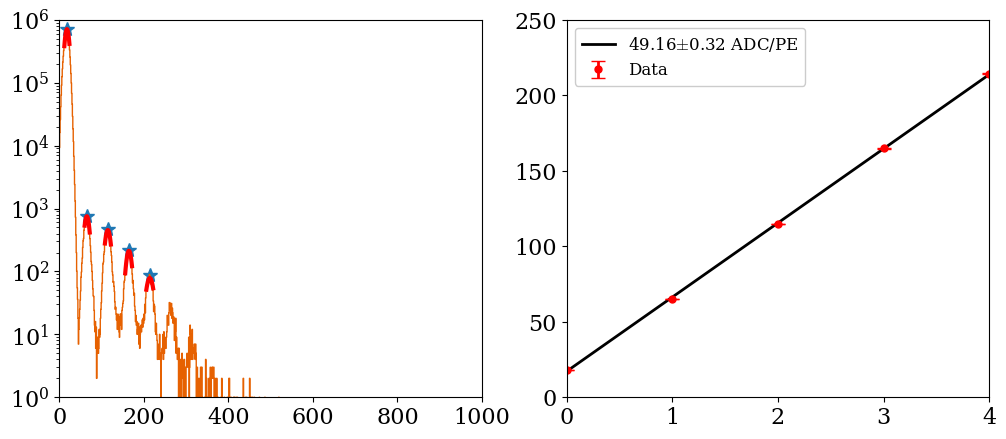

1 /Users/tizi/Documents/YALE_WL.nosync/data/20220609/mca_keith_2.50OV.h5
[18.091901865347094, 79.44612798734416, 143.1638485856934, 207.30558538166898, 271.8183397752412]
[61.35422612 63.7177206  64.1417368  64.51275439]
63.43160947747353


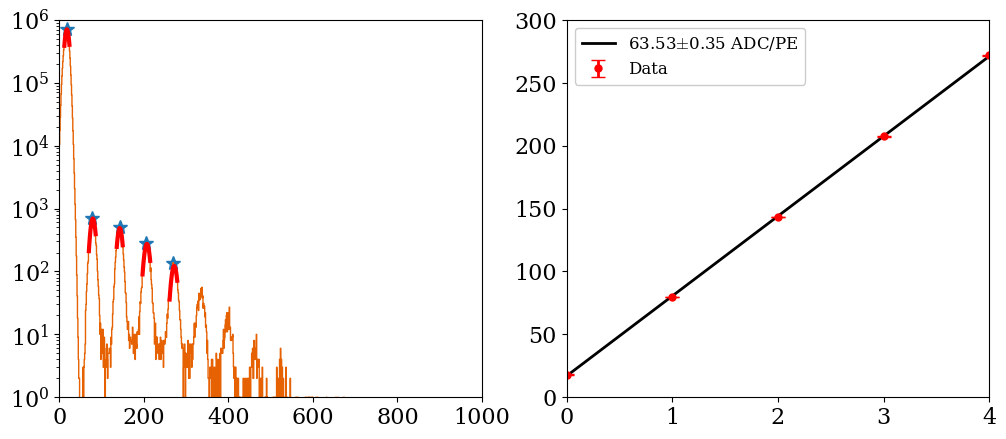

2 /Users/tizi/Documents/YALE_WL.nosync/data/20220609/mca_keith_3.00OV.h5
[17.95716566026973, 93.12677906589465, 171.7625359430762, 250.23401820632353, 328.64474168895134]
[75.16961341 78.63575688 78.47148226 78.41072348]
77.67189400717041


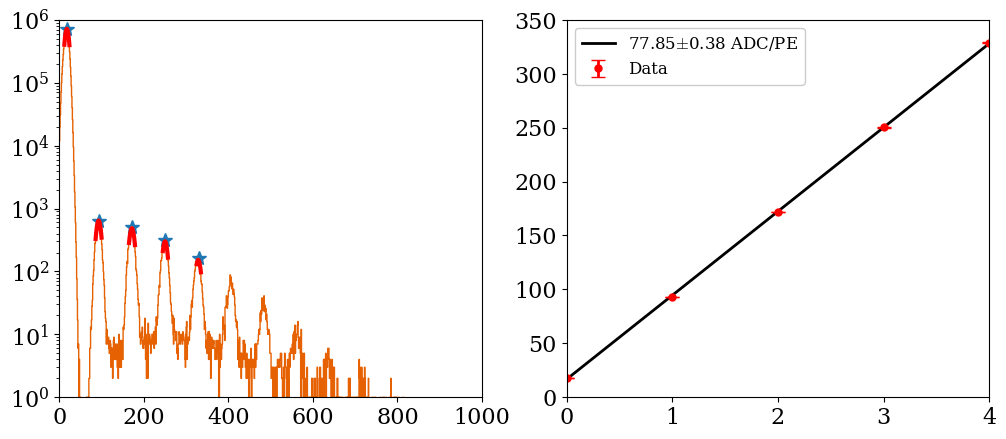

3 /Users/tizi/Documents/YALE_WL.nosync/data/20220609/mca_keith_3.50OV.h5
[17.786009122892093, 107.17730233094353, 199.4464609285234, 291.4212784221778, 383.4404637745696]
[89.39129321 92.2691586  91.97481749 92.01918535]
91.41361366291937


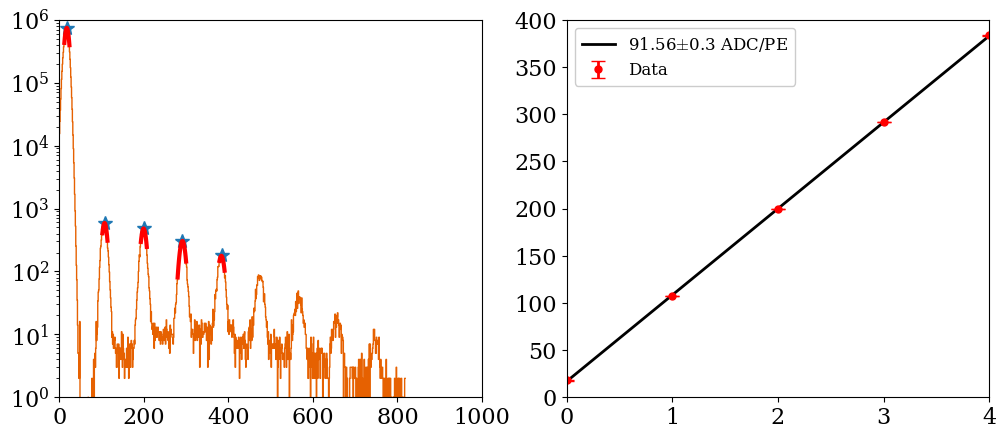

4 /Users/tizi/Documents/YALE_WL.nosync/data/20220609/mca_keith_4.00OV.h5
[17.62951207995535, 120.70738594225804, 226.71735888784892, 332.41297908769076, 438.2929322399371]
[103.07787386 106.00997295 105.6956202  105.87995315]
105.16585503999545


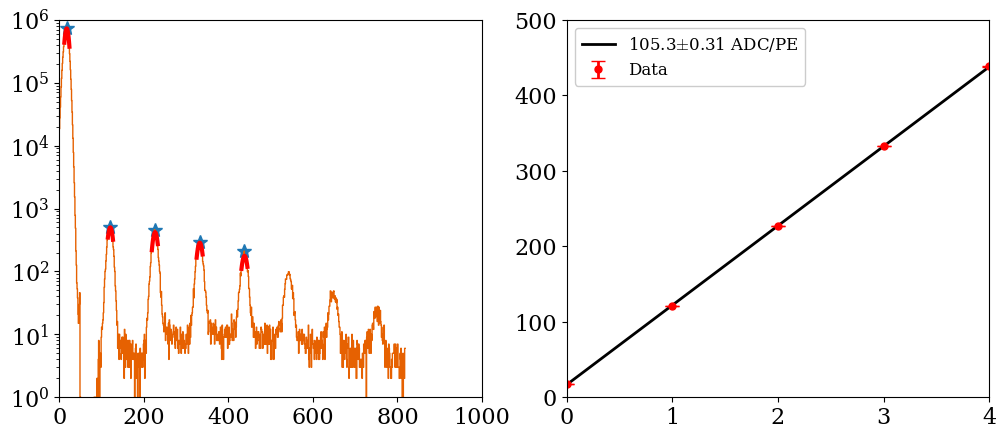

5 /Users/tizi/Documents/YALE_WL.nosync/data/20220609/mca_keith_4.50OV.h5
[17.527810375749127, 134.0514204792527, 253.8594548729966, 372.9787559651682, 491.8090987059302]
[116.5236101  119.80803439 119.11930109 118.83034274]
118.57032208254526


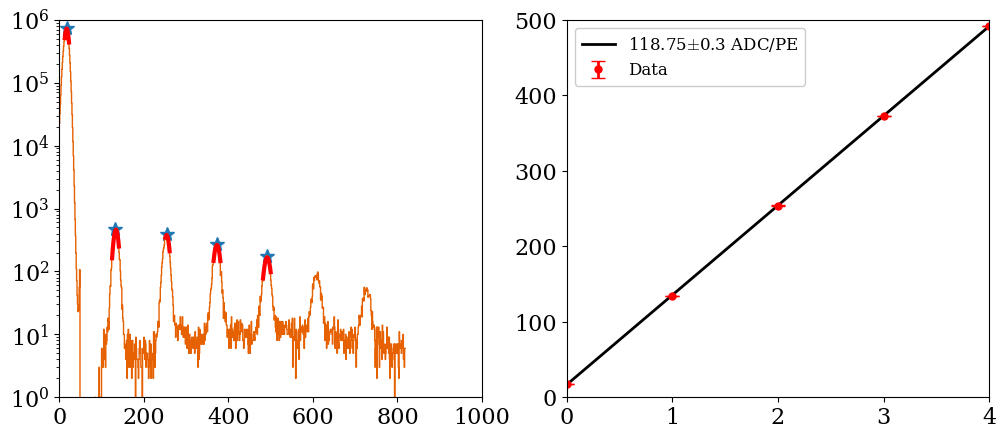

6 /Users/tizi/Documents/YALE_WL.nosync/data/20220609/mca_keith_5.00OV.h5
[17.337380246926813, 147.13949404013437, 279.66450920232995, 411.56015449133, 543.3892930197694]
[129.80211379 132.52501516 131.89564529 131.82913853]
131.51297819321064


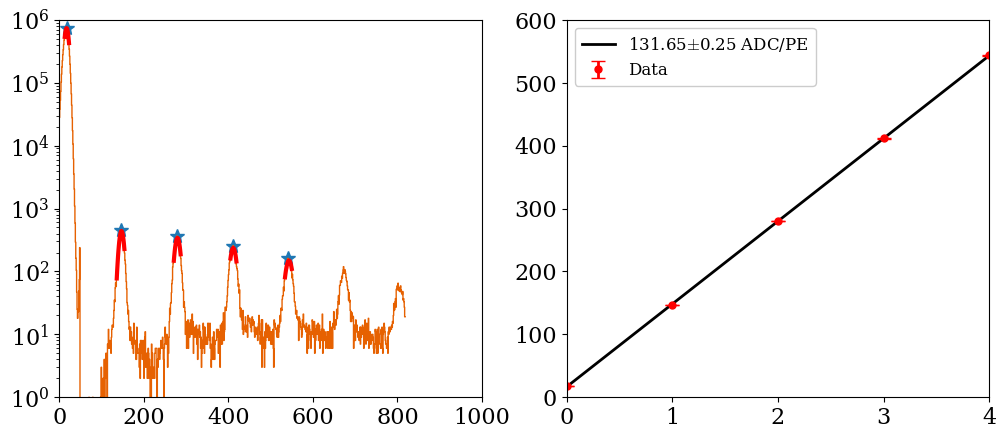

7 /Users/tizi/Documents/YALE_WL.nosync/data/20220609/mca_keith_5.50OV.h5
[17.073762992464708, 159.9878087537576, 304.8881367891229, 450.121126996276, 594.1774029367501]
[142.91404576 144.90032804 145.23299021 144.05627594]
144.27590998607135


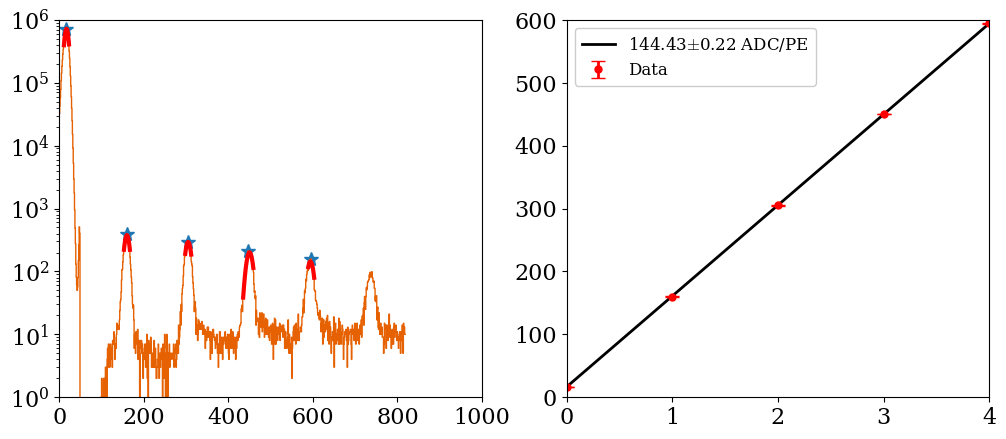

8 /Users/tizi/Documents/YALE_WL.nosync/data/20220609/mca_keith_6.00OV.h5
[16.848782200202866, 171.54109520232595, 329.50343715268974, 486.28006444740305, 642.1906778450114]
[154.692313   157.96234195 156.77662729 155.9106134 ]
156.33547391120214


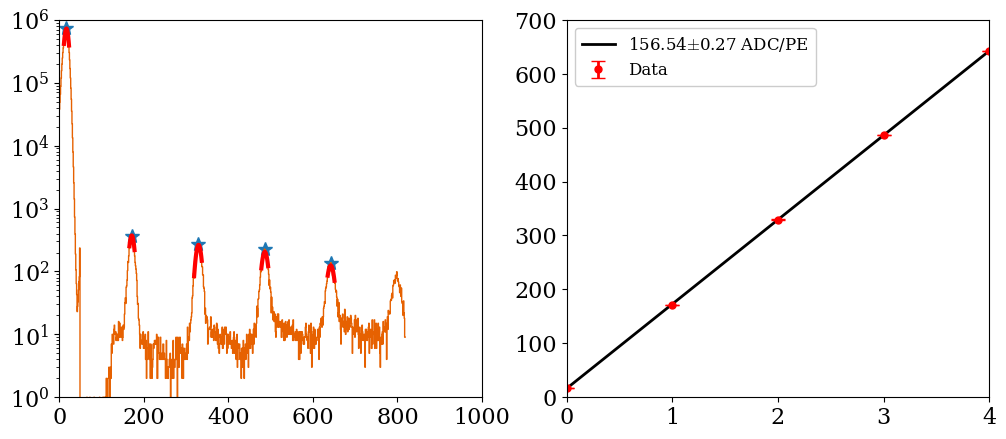

9 /Users/tizi/Documents/YALE_WL.nosync/data/20220609/mca_keith_6.50OV.h5
[16.652570785385752, 183.5969893081587, 352.89376285163996, 521.923516202823, 689.3914166274942]
[166.94441852 169.29677354 169.02975335 167.46790042]
168.18471146052713


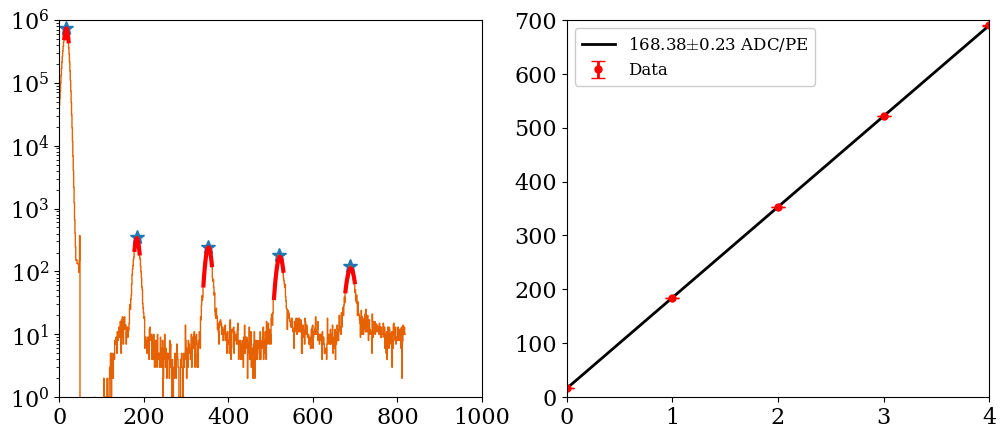

10 /Users/tizi/Documents/YALE_WL.nosync/data/20220609/mca_keith_7.00OV.h5
[16.35577096655004, 195.01968533316872, 375.597686020387, 555.7169082173967, 734.1686572121764]
[178.66391437 180.57800069 180.1192222  178.45174899]
179.4532215614066


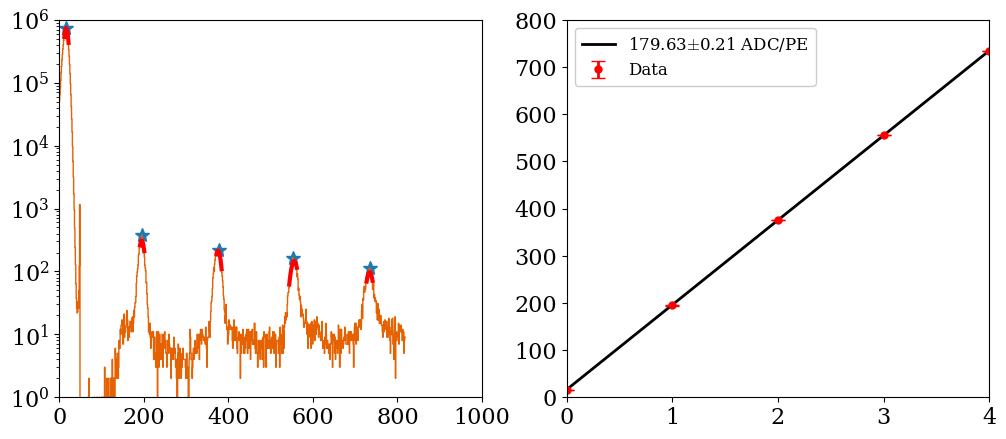

In [ ]:
gain_list_0V,gain_err_0V=gain_calculator(Path)

[31.0V|2e-06]: Gain 70.0 --> !NOTE:  Error is too small --> replacing 0.0 with 1e-08
[31.5V|2e-06]: Gain 80.00000000000001 --> !NOTE:  Error is too small --> replacing 1.797546735914701e-14 with 1e-08
[32.0V|2e-06]: Gain 90.00000000000001 --> !NOTE:  Error is too small --> replacing 1.797546735915192e-14 with 1e-08
[32.5V|2e-06]: Gain 98.0, Err 0.7071067811882156 added to the array
[33.0V|2e-06]: Gain 104.50000000000001, Err 1.3228756555355718 added to the array
[33.5V|2e-06]: Gain 115.00000000000003, Err 1.5811388300883744 added to the array
[34.0V|2e-06]: Gain 123.50000000007306, Err 0.8660254037868367 added to the array
[34.5V|2e-06]: Gain 131.50000000009052, Err 0.866025403786919 added to the array
[31.0V|5e-06]: Gain 73.49999999996399, Err 0.8660254037858988 added to the array
[31.5V|5e-06]: Gain 83.49999999998579, Err 0.8660254037861804 added to the array
[32.0V|5e-06]: Gain 93.50000000000762, Err 0.8660254037863997 added to the array
[32.5V|5e-06]: Gain 102.0, Err 0.707106781188

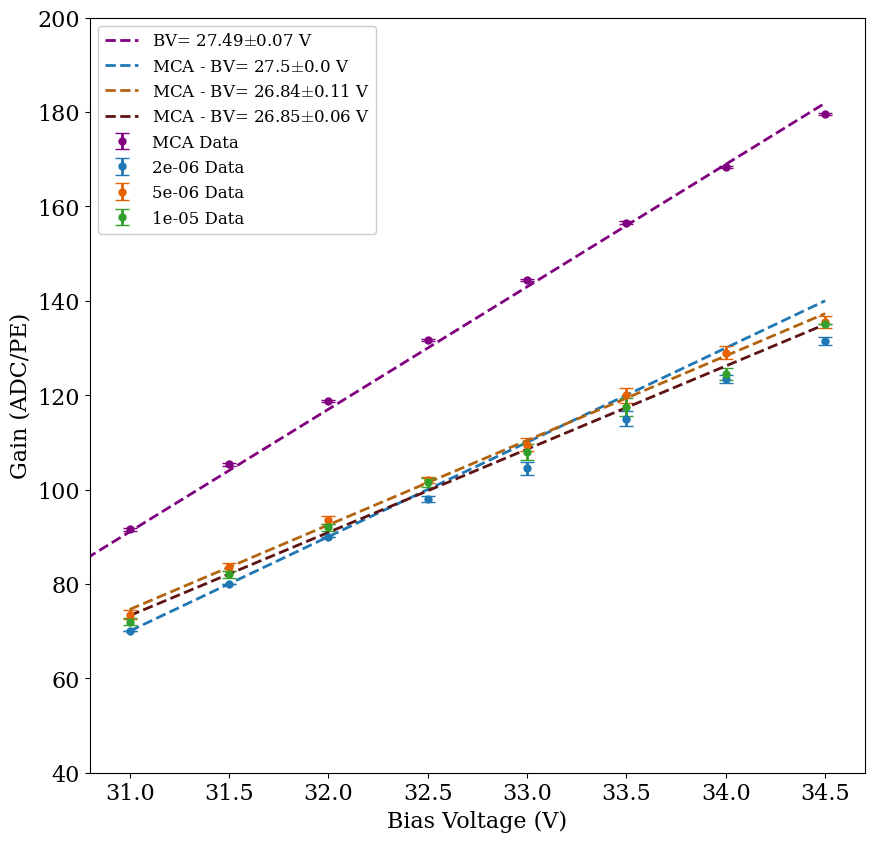

In [ ]:
def line(x,a,b):
    return a*(x-b)
plt.figure(figsize=(10,10))
volts = voltages.astype(float) + 27.5
x_data=np.arange(np.min(volts),np.max(volts)+0.1,1)
plt.errorbar(volts,gain_list_0V,yerr=gain_err_0V,label='MCA Data',fmt='o',ms=5,color='purple')

popt_0,pcov_0=curve_fit(line,volts,gain_list_0V,p0=[31,27],sigma=gain_err_0V)
label = 'BV= '+str(np.round(popt_0[1],2))+ '$\pm$'+ str(np.round(np.sqrt(np.diag(pcov_0)[1]),2))+' V'
plt.plot(x_data, line(x_data,*popt_0), color='purple', ls='--', label=label)
# plt.plot(x_data,line(x_data,*popt_260),color=colors[1],label='BV= '+str(np.round(popt_260[1],2))+ '$\pm$'+ str(np.round(np.sqrt(np.diag(pcov_260)[1]),2))+' V',ls='--')

summarized_data = {}
#plt.figure(figsize=(10,10))
for ii, sh_time in enumerate(peaks.keys()):

    #print(peaks[sh_time])

    gain_temp = []
    err_temp = []
    for volt in peaks[sh_time].keys():
        opt = float(peaks[sh_time][volt]['popt'])
        err = peaks[sh_time][volt]['perr']
        if err < 1e-08:
            err = 1e-08
            print(f'{ANSI_CYAN}[{float(volt)+27.5}V|{sh_time}]:{ANSI_YELLOW} Gain {opt} --> !NOTE:  Error is too small --> replacing {peaks[sh_time][volt]["perr"]} with {err}{ANSI_RESET}') 
        else: print(f'{ANSI_CYAN}[{float(volt)+27.5}V|{sh_time}]:{ANSI_RESET} Gain {opt}, Err {err} added to the array{ANSI_RESET}')        

        gain_temp.append(opt)
        err_temp.append(err)

    volts = [float(x) + 27.5 for x in np.array([*peaks[sh_time].keys()])]
    x_data=np.arange(np.min(volts),np.max(volts)+0.1,0.5)
    plt.xlim(np.min(volts)-0.2,np.max(volts)+0.2)

    plt.errorbar(volts,gain_temp,yerr=err_temp,label=str(sh_time)+' Data',fmt='o',ms=5,color=colors[ii])
    popt_0,pcov_0=curve_fit(line,x_data,gain_temp,p0=[31,27],sigma=err_temp)
    if pcov_0[0][0] == np.inf: print(f'{ANSI_RED} ---- COVARIANCE ERROR ---- {ANSI_RESET}')
    label = 'MCA - BV= '+str(np.round(popt_0[1],2))+ '$\pm$'+ str(np.round(np.sqrt(np.diag(pcov_0)[1]),2))+' V'
    plt.plot(x_data, line(volts,*popt_0), color=colors[-ii], ls='--', label=label)
    # plt.plot(x_data,line(x_data,*popt_260),color=colors[1],label='BV= '+str(np.round(popt_260[1],2))+ '$\pm$'+ str(np.round(np.sqrt(np.diag(pcov_260)[1]),2))+' V',ls='--')
    plt.legend(loc=2)
    plt.ylabel('Gain (ADC/PE)')
    plt.xlabel('Bias Voltage (V)')
    #plt.title(f'Shaping time: {sh_time}')
    #plt.show()

plt.show()

In [ ]:
print (voltages)

['2.00' '2.50' '3.00' '3.50' '4.00' '4.50' '5.00' '5.50' '6.00' '6.50'
 '7.00']


[31.0V|2e-06]: Gain 70.0 --> !NOTE:  Error is too small --> replacing 0.0 with 1e-08
[31.5V|2e-06]: Gain 80.00000000000001 --> !NOTE:  Error is too small --> replacing 1.797546735914701e-14 with 1e-08
[32.0V|2e-06]: Gain 90.00000000000001 --> !NOTE:  Error is too small --> replacing 1.797546735915192e-14 with 1e-08
[32.5V|2e-06]: Gain 98.0, Err 0.7071067811882156 added to the array
[33.0V|2e-06]: Gain 104.50000000000001, Err 1.3228756555355718 added to the array
[33.5V|2e-06]: Gain 115.00000000000003, Err 1.5811388300883744 added to the array
[34.0V|2e-06]: Gain 123.50000000007306, Err 0.8660254037868367 added to the array
[34.5V|2e-06]: Gain 131.50000000009052, Err 0.866025403786919 added to the array
[31.0V|5e-06]: Gain 73.49999999996399, Err 0.8660254037858988 added to the array
[31.5V|5e-06]: Gain 83.49999999998579, Err 0.8660254037861804 added to the array
[32.0V|5e-06]: Gain 93.50000000000762, Err 0.8660254037863997 added to the array
[32.5V|5e-06]: Gain 102.0, Err 0.707106781188

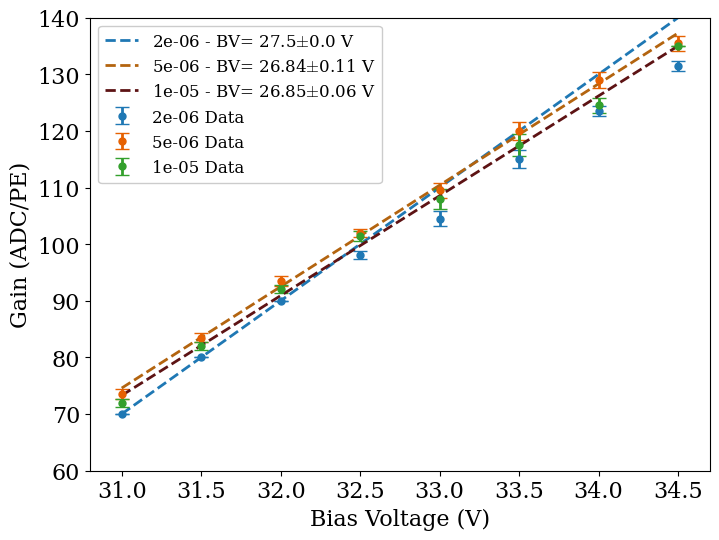